In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn
%matplotlib inline
%config InlineBackend.figure_format ='retina'

######PER IGNORARE I WARNINGS#########
######da attivare a notebook finito per motivi estetici#######
#import warnings
#warnings.filterwarnings('ignore')
##############################################################


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/pcm-dpc/COVID-19"
COVID_PATH = os.path.join("datasets", "covid")
COVID_REGIONI_URL = DOWNLOAD_ROOT + "/master/dati-regioni/dpc-covid19-ita-regioni.csv"
COVID_PROVINCE_URL = DOWNLOAD_ROOT + "/master/dati-province/dpc-covid19-ita-province.csv"
COVID_NAZIONE_URL = DOWNLOAD_ROOT + "/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
url_dict={'regioni.csv':COVID_REGIONI_URL,'province.csv':COVID_PROVINCE_URL,'nazione.csv':COVID_NAZIONE_URL}
def fetch_dati(url,file,path=COVID_PATH):
    os.makedirs(path, exist_ok=True)
    newpath=os.path.join(path, file)
    urllib.request.urlretrieve(url, newpath)
def load_dati(file,path=COVID_PATH):
    csv_path=os.path.join(path, file)
    return pd.read_csv(csv_path)

fetch_dati(COVID_REGIONI_URL,file='regioni.csv')
regions=load_dati('regioni.csv')
fetch_dati(COVID_PROVINCE_URL,file='province.csv')
provinces=load_dati('province.csv')
fetch_dati(COVID_NAZIONE_URL,file='nazione.csv')
country=load_dati('nazione.csv')

Some data is useless, and is now removed

In [4]:
#regions
day=regions.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
    #Per estrarre mese e giorno prendiamo i caratteri dal 5 al 9 inclusi della feature "data"
regions.insert(0,column='day', value=day)

#provinces
day=provinces.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
provinces.insert(0,column='day', value=day)

#country
day=country.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
country.insert(0,column='day', value=day)

In [5]:
regions=regions.drop(['data','stato', 'codice_regione', 'note_it', 'note_en'],axis=1, errors="ignore")
provinces=provinces.drop(['data','stato','codice_regione', 'codice_provincia', 'note_it', 'note_en'],axis=1, errors="ignore")
country=country.drop(['data','stato', 'note_it', 'note_en'],axis=1, errors="ignore")

spiegare che cambiano i dati per scriverli in inglese e riportare tabella delle traduzioni con spiegazione

In [6]:
eng_nation=['day','hospitalized_symptoms','ICU','total_hospitalized','home_isolation','total_positive',
                 'variation_total_positive','new_positive','recovered','deceased','total_cases','tests']
eng_prov=['day','region','province','initials','lat','long','total_cases']
eng_reg=['day','region','lat','long','hospitalized_symptoms','ICU','total_hospitalized','home_isolation',
         'total_positive','variation_total_positive','new_positive','recovered','deceased','total_cases','tests']

#trans_dic={'Italian':}
it=list(regions.columns)
it.append('provincia')
eng=eng_reg+['province']
itex=['giorno di registrazione del dato','regione della rilevazione','latitudine','longitudine',
      'pazienti ricoverati in ospedale con sintomi','pazienti in terapia intensiva','totale dei pazienti ricoverati',
      'pazienti in isolamento domiciliare','totale dei positivi',
      'variazione del totale dei positivi rispetto alla rilevazione precedente','nuovi positivi effettivi',
      'negativi almeno due volte al virus, e quindi legalmente guariti','deceduti e positivi al virus','totale dei casi',
     'totale dei tamponi effettuati','provincia della rilevazione']
engex=['day in which data was gathered','region of interest','latitude','longitude','patients hospitalised with symptoms',
      'patients in the Intensive Care Unit','total number of patients hospitalised','patients isolated at home',
       'total number of positive cases','variation of the total number of positive cases with respect to the last time it was recorded',
      'actual number of new positive cases','patients which due to having tested negative twice have "legally" recovered',
      'patients which at the time of their death were virus positive','total number of cases','total number of tests',
        'province of interest']
data={'Variabile':it,'Note':itex,'Variable':eng,'Notes':engex}
legend=pd.DataFrame(data)

#####problemi#######
#trovare un modo decente di mostrare la legenda#


######ATTENZIONE##########
#DA QUESTA CELLA IN POI è TUTTO IN INGLESE#
regions.columns=eng_reg
country.columns=eng_nation
provinces.columns=eng_prov

In [225]:
legend

,Variabile,Note,Variable,Notes
0,day,giorno di registrazione del dato,day,day in which data was gathered
1,denominazione_regione,regione della rilevazione,region,region of interest
2,lat,latitudine,lat,latitude
3,long,longitudine,long,longitude
4,ricoverati_con_sintomi,pazienti ricoverati in ospedale con sintomi,hospitalized_symptoms,patients hospitalised with symptoms
5,terapia_intensiva,pazienti in terapia intensiva,ICU,patients in the Intensive Care Unit
6,totale_ospedalizzati,totale dei pazienti ricoverati,total_hospitalized,total number of patients hospitalised
7,isolamento_domiciliare,pazienti in isolamento domiciliare,home_isolation,patients isolated at home
8,totale_positivi,totale dei positivi,total_positive,total number of positive cases
9,variazione_totale_positivi,variazione del totale dei positivi rispetto al...,variation_total_positive,variation of the total number of positive case...


then we drop the 'data' & 'stato' column which are now useless

In [8]:
def combine_to_dict(df,upto,f1,f2):
    d12={}
    d21={}
    for i in range(upto):
        one=df.at[i,f1]
        two=df.at[i,f2]
        d12[one]=two
        d21[two]=one
    return d12,d21
reg_num_as_key,reg_name_as_key=combine_to_dict(regions,20,f1='region',f2='region')
prov_num_as_key,prov_name_as_key=combine_to_dict(provinces,128,f1='provinces_code',f2='provinces')
#Per inciso, quello delle prov ha qualcosa che non va


#Queeste righe bastano per le regions
reg_codes=pd.DataFrame(data=regions, columns=["region", "region"])
num=len(reg_codes)-21
reg_codes.drop(reg_codes.tail(num).index, inplace=True)
#Province è un po'infame, ha bassa priorità ma magari lo farò

KeyError: 'provinces_code'

now we try to create a dataframe/dictionary which combines values of codice_regione with values of region

we know there are 20 regions so it is enough to access the data frame up to the 20th row. 

now we will shorten the dataframe so that we store in another dataframe the longitude and latitude coordinates which do not change at all

In [9]:
def combine_to_datfr(df,row,col,upto):
    ind=[row[i] for i in range(upto)]
    dt=[]
    for i in range(upto):
        d=[]
        for feat in col:
            el=df.at[i,feat]
            d.append(el)
        dt.append(d)
    ret=pd.DataFrame(data=dt,index=ind,columns=col)
    return ret
def create_geo_loc(df):
    geo_loc=regions.region.copy()
    geo_loc=pd.DataFrame(data=geo_loc)
    geo_loc["lat"]=regions.lat.copy()
    geo_loc["long"]=regions.long.copy()
    num=len(geo_loc)-21
    geo_loc.drop(geo_loc.tail(num).index,inplace=True)
    return geo_loc


def create_geo_loc_2(df):
    if "provinces" in df.columns:
        denom="provinces"
        cont=80
    else:
        denom="region"
        cont=21
    geo_loc=pd.DataFrame(data=df,columns=[denom, "lat", "long"])
    #geo_loc.drop(geo_loc.loc[geo_loc['lat'] == 0])
    num=len(geo_loc)-cont
    geo_loc.drop(geo_loc.tail(num).index,inplace=True)
    return geo_loc

#TODO: Sceglierne una (io voto per create_geo_loc_2  :) )


new=combine_to_datfr(regions,regions.region,['lat','long'],21)
#new=combine_to_datfr(provinces,provinces.province,['lat','long'],80)
#Anche qua provinces ha qualche problema, suppongo per problema intrinseco al dataset

#nemmeno il mio funziona con le provinces al momento

new=create_geo_loc_2(provinces)

#new


In [10]:
regions

,day,region,lat,long,hospitalized_symptoms,ICU,total_hospitalized,home_isolation,total_positive,variation_total_positive,new_positive,recovered,deceased,total_cases,tests
0,02-24,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5
1,02-24,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0
2,02-24,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1
3,02-24,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1
4,02-24,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,04-03,Toscana,43.769231,11.255889,1149,288,1437,3472,4909,120,226,300,290,5499,44460
836,04-03,P.A. Trento,46.068935,11.121231,343,80,423,1236,1659,72,106,246,204,2109,8993
837,04-03,Umbria,43.106758,12.388247,165,48,213,707,920,35,51,220,39,1179,10614
838,04-03,Valle d'Aosta,45.737503,7.320149,85,25,110,450,560,4,51,89,70,719,2106


# A first analysis

as we can see, we have each day a number of measurements for 21 regions (numbered from 1 to 20)

we can simply extract the number of observations of the civil protection by dividing the shape of the dataframe by 21

In [11]:
n_obs=int(regions.shape[0]/21)
n_reg=21

#the following is a function to extract data from a single instance, as day, region, provinces or anything else
def get_instance(dataset,instance,some,avoid=None):
    #unclear the "Avoid" part
    dt=dataset.copy()
    new=dt.loc[dt[instance]==some]
    if avoid!=None:
        if not isinstance(avoid,list):
            avoid=list(avoid)
        new.drop(avoid,axis=1,inplace=True)
    new=new.reset_index(drop=True)
    return new

#the following is a function to extract a single regione
def get_region(name, df=regions):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['region'] == name]
    dati_regione.drop(["region", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione

#the following is a function to extract data about a single day
def get_day(df, day):
    return df.loc[df['day'] == day]

#the following is a function to extract a single provinces
def get_province(name, df=provinces): 
    df_copy=df.copy()
    dati_provincia = df_copy.loc[df_copy['province'] == name]
    dati_provincia.drop(["region", "lat", "long", "province", "initials"], axis=1, inplace=True)
    dati_provincia=dati_provincia.reset_index(drop=True)
    return dati_provincia

#the following is a function to get the whole region data for each provinces
def get_region_by_provinces(name,df=provinces):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['region'] == name]
    dati_regione.drop(["region", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione

#the following is a function to get the list of provinces of a region
def get_provinces_list(reg,df=provinces):
    a=get_region_by_provinces(reg,df=provinces)
    return a.provinces.unique()


get_instance(regions,"region","Toscana").tail()




,day,region,lat,long,hospitalized_symptoms,ICU,total_hospitalized,home_isolation,total_positive,variation_total_positive,new_positive,recovered,deceased,total_cases,tests
35,03-30,Toscana,43.769231,11.255889,1116,279,1395,2655,4050,264,290,131,231,4412,30099
36,03-31,Toscana,43.769231,11.255889,1120,293,1413,2813,4226,176,196,138,244,4608,33165
37,04-01,Toscana,43.769231,11.255889,1120,297,1417,3015,4432,206,259,182,253,4867,36575
38,04-02,Toscana,43.769231,11.255889,1135,295,1430,3359,4789,357,406,216,268,5273,40724
39,04-03,Toscana,43.769231,11.255889,1149,288,1437,3472,4909,120,226,300,290,5499,44460


In the next cell we find some function which may later become useful

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


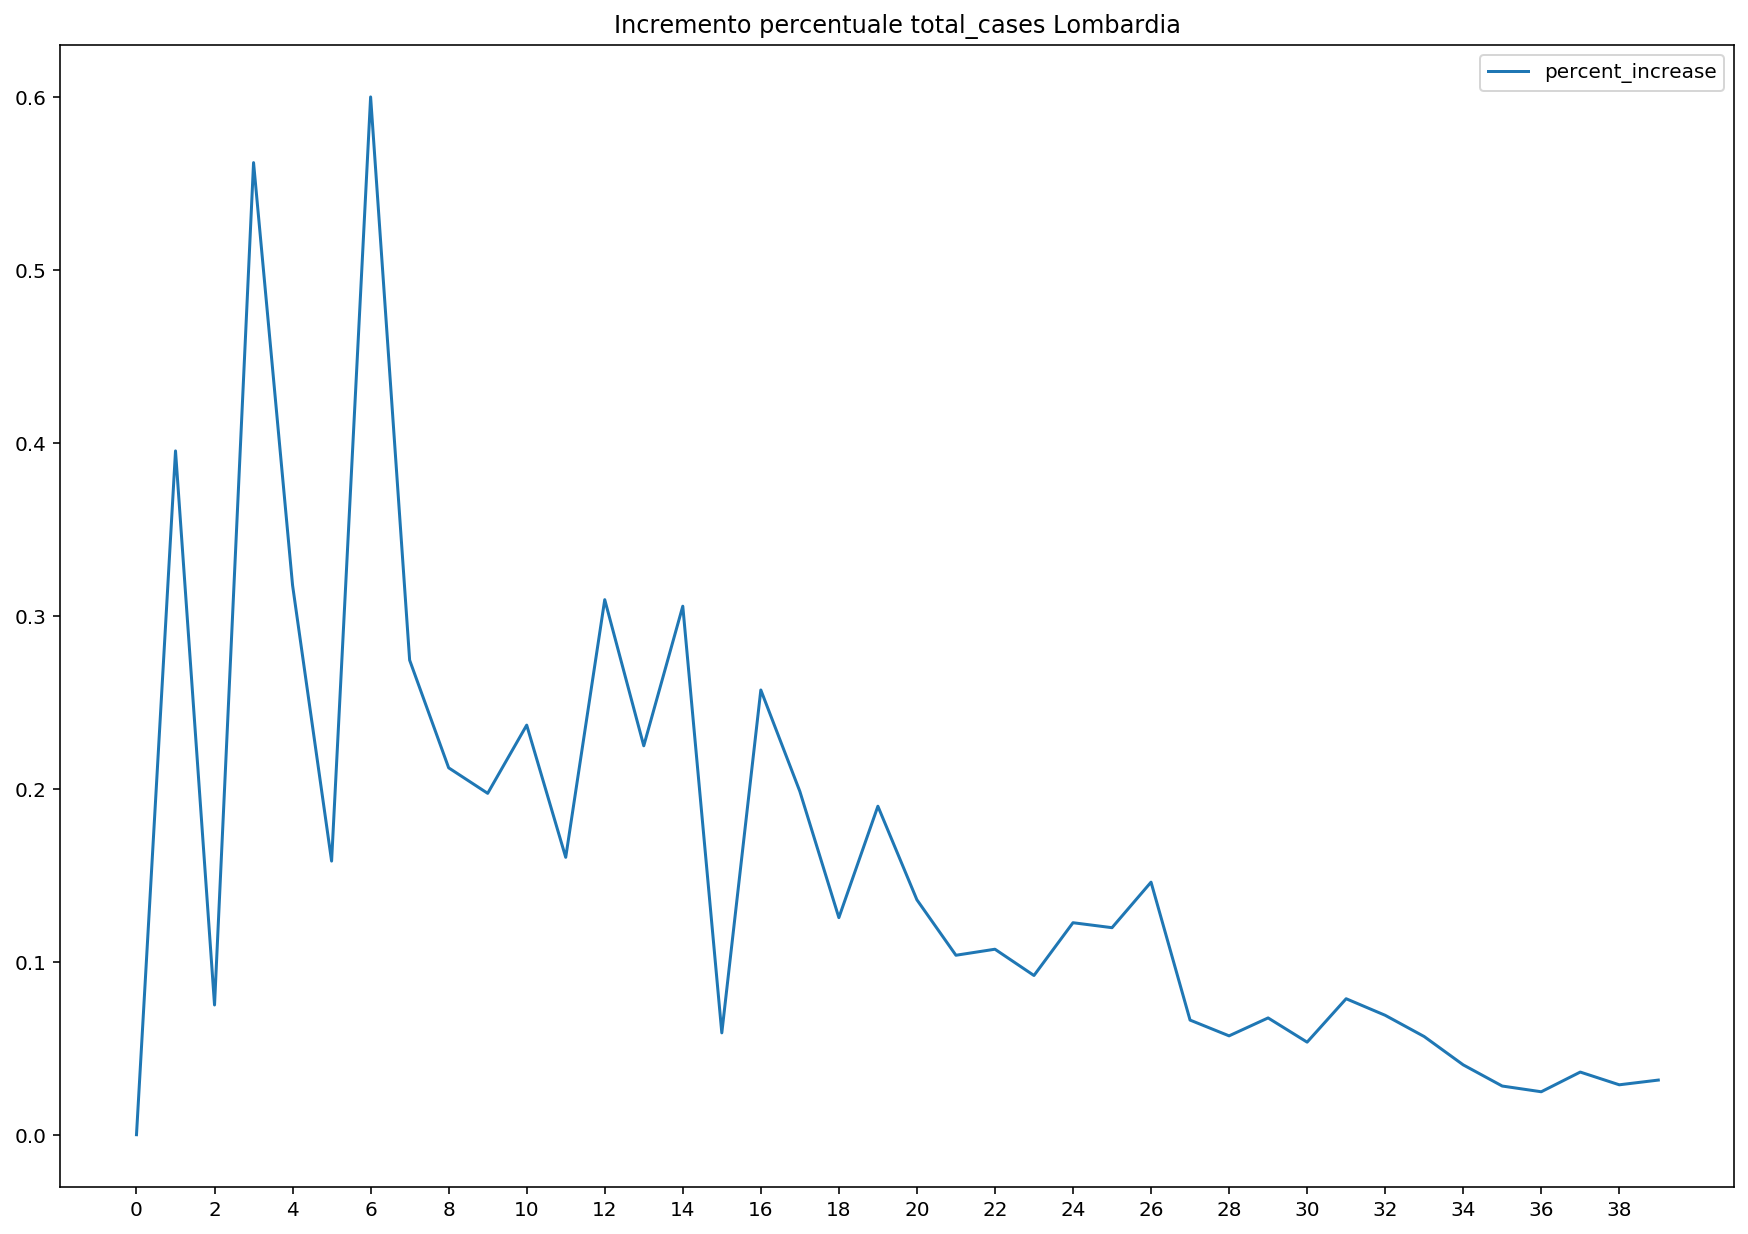

In [12]:
#def compute_perc_increase(df,feature):
#    feat = df[feature].copy()
#    feat=feat.pct_change()
#    increase=pd.DataFrame(data=feat, index=df.index)
#    increase.set_axis(['percent_increase'], axis=1, inplace=True)
#    if not increase.columns.any=='day':
#        increase.insert(0,column='day',value=df['day']) #->non è generale, in alcuni casi day c'è già, quindi dà errore
#    increase.fillna(0,inplace=True)
#    return increase


def compute_increase(df,feature):
    feat = df[feature].copy()
    feat=np.array(feat)
    incr=feat.copy()
    incr[1:]=feat[1:]-feat[:-1]
    increase=pd.DataFrame(data=incr, index=df.index)
    increase.set_axis(['increase'], axis=1, inplace=True)
    if not increase.columns.any=='day':
        increase.insert(0,column='day',value=df['day'])
    return increase



def compute_perc_increase(df_name,feature, where=None):
    if df_name=="provinces":
        df=get_provinces(where)
    elif df_name=="regions":
        df=get_region(where)
    else:
        df=country
    increase=pd.DataFrame(data=df[feature].pct_change(), index=df.index)
    increase.set_axis(['percent_increase'], axis=1, inplace=True)
    if not increase.columns.any=='day':
        increase.insert(0,column='day',value=df['day'])
    increase.fillna(0,inplace=True)
    if not np.isfinite(increase['percent_increase']).all():
        aux=increase.loc[increase['percent_increase'] == np.inf]
        to_del=np.arange(aux.iloc[0].name+1)
        increase.drop(to_del, inplace=True)
    #increase.set_index("day", inplace=True)
    
    return increase

#Ho cambiato leggermente per farla funzionare, e poi automaticamente "pulisce" degli 0 e infinito
feature="total_cases"
where="Lombardia"
inds_X=np.arange(len(country))[::2]
compute_perc_increase("regions",feature, where).plot(figsize=(15,10.5),xticks=inds_X, title="Incremento percentuale " + feature + " " + where)





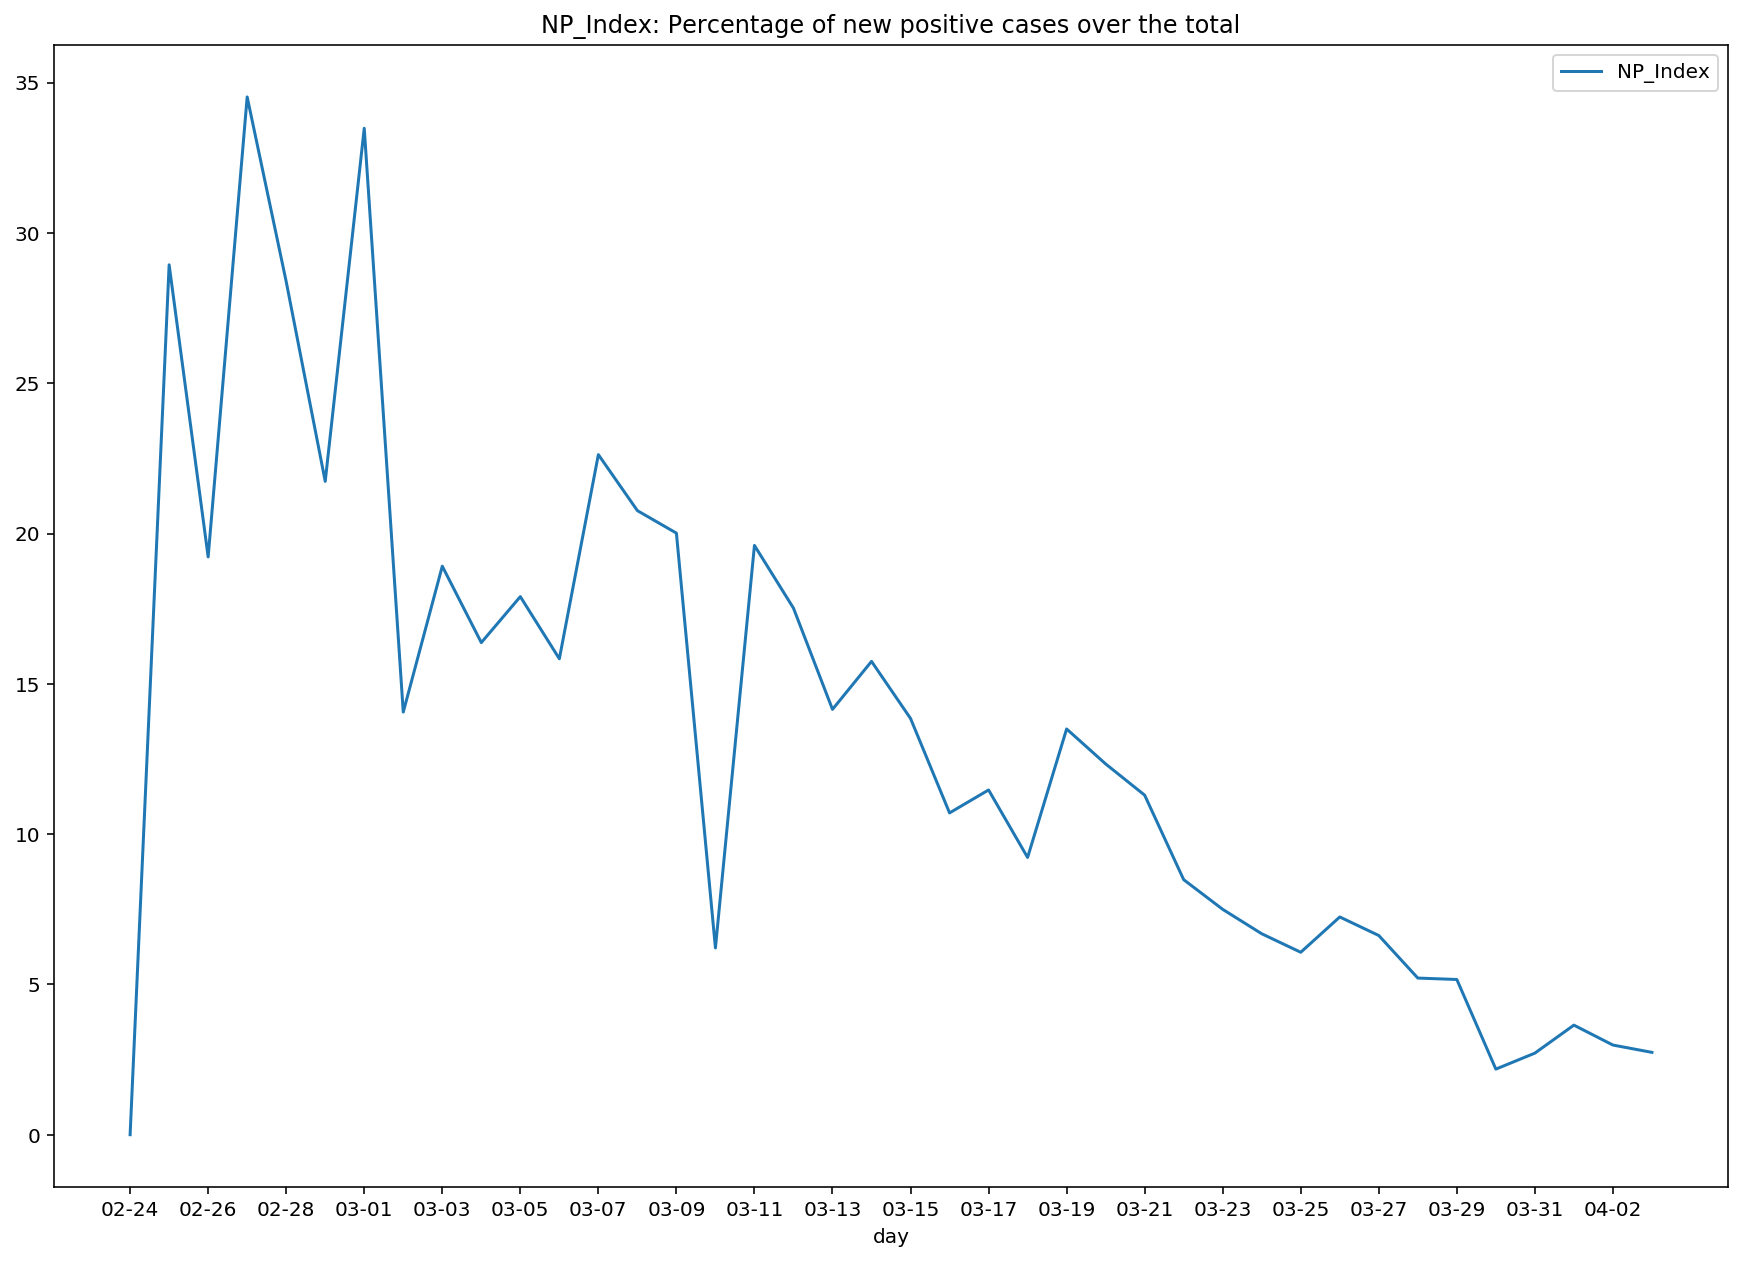

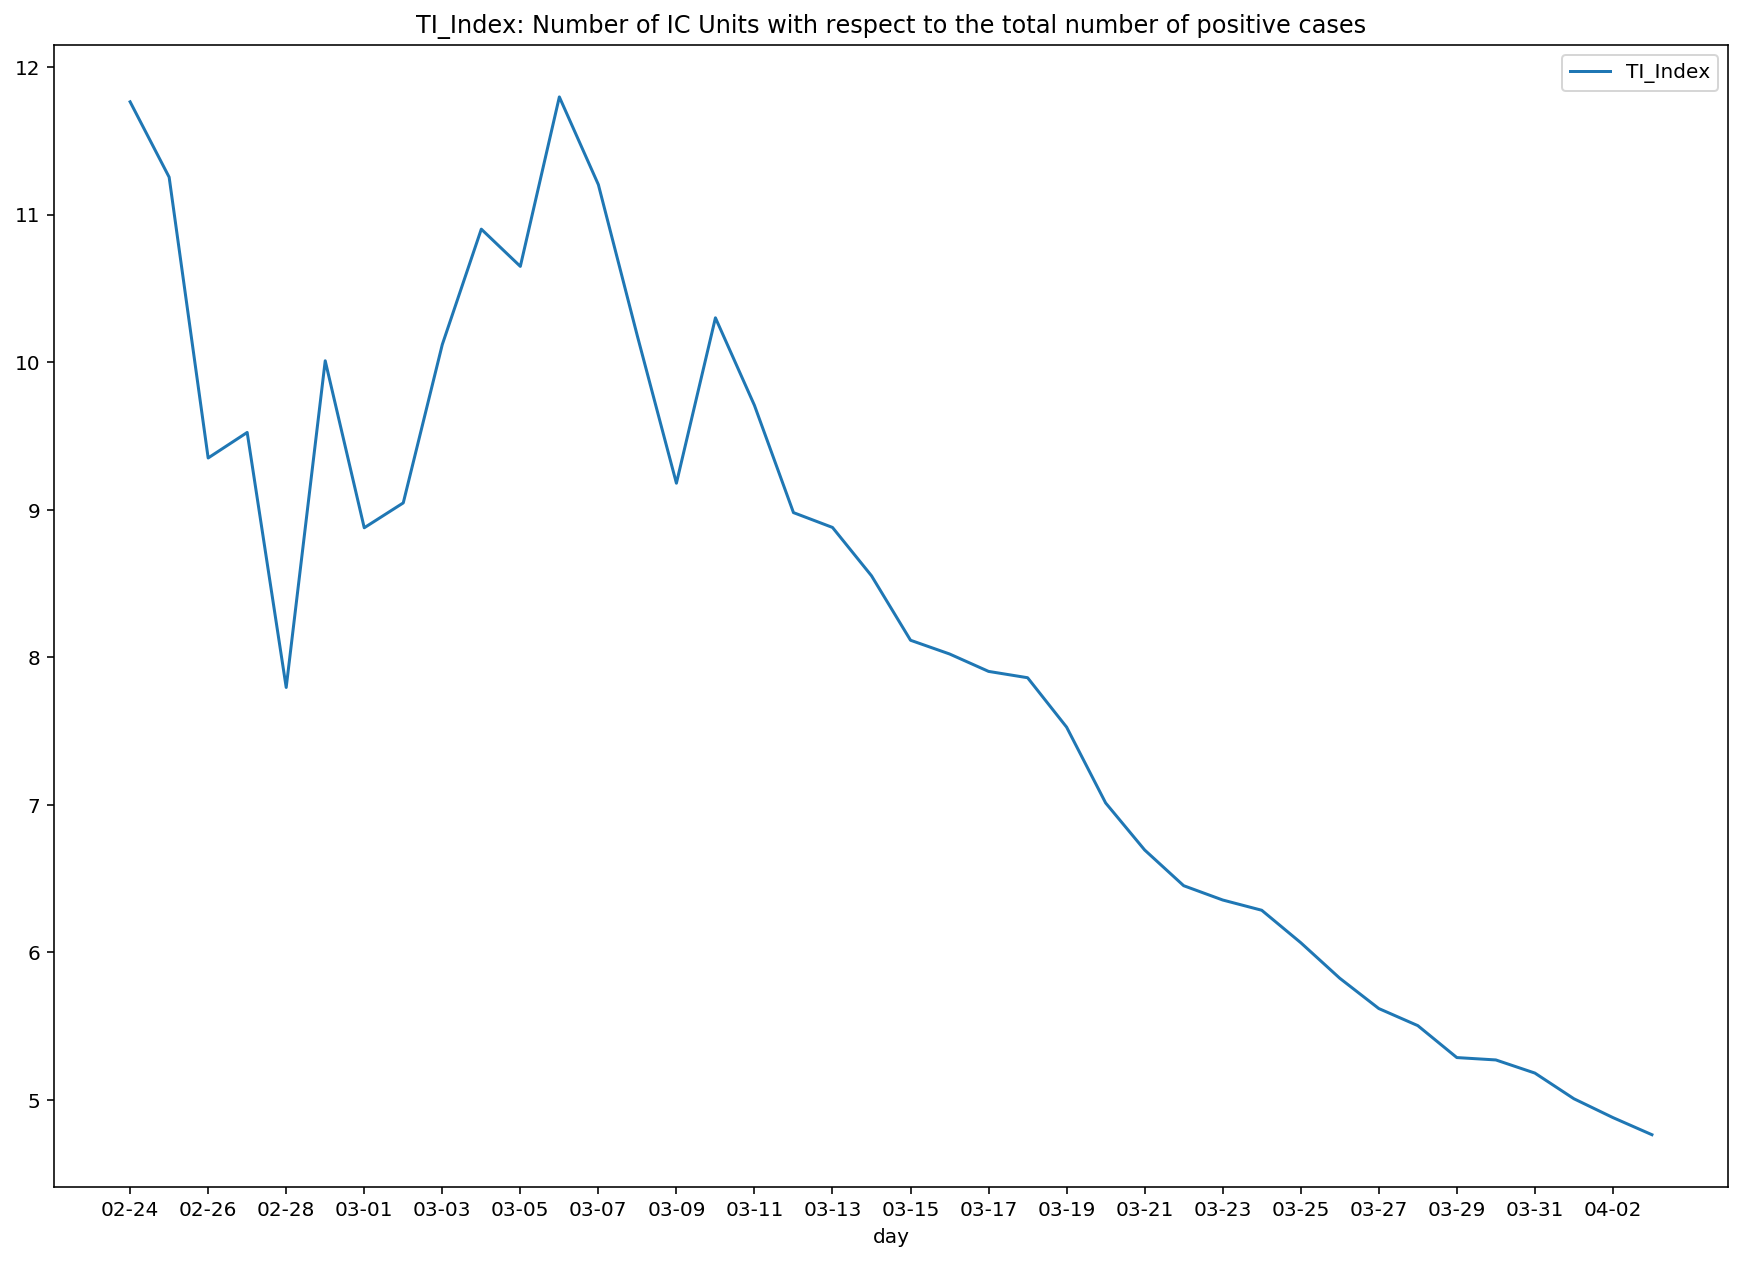

In [13]:
#Indice: rapporto fra il numero di nuovi positivi (NP) e il numero totale di attualmente positivi

ind_NP=pd.DataFrame(data=country, columns=["day"])
ind_NP["NP_Index"]=country["variation_total_positive"]/country["total_positive"]*100
ind_NP.set_index("day", inplace=True)
inds_X=np.arange(len(ind_NP))[::2]
ind_NP.plot(figsize=(15,10.5), xticks=inds_X, title="NP_Index: Percentage of new positive cases over the total")


#Indice di terapia intensiva: quanti dei malati vanno in TI?
ind_TI=country["ICU"]/country["total_positive"]*100
ti=pd.DataFrame(data=ind_TI, columns=["TI_Index"])
ti["day"]=country["day"].copy()
ti.set_index("day", inplace=True)
inds_X=np.arange(len(ti))[::2]
ti.plot(figsize=(15,10.5), xticks=inds_X, title="TI_Index: Number of IC Units with respect to the total number of positive cases")

# Geographical Plotting attempt

In [14]:
#Hack to fix missing PROJ4 env var
import os
import conda
import numpy as np
import matplotlib.pyplot as plt

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

    
def plotMap(coloredGraph=False):
    plt.figure(figsize=(20,20))
    if coloredGraph:
        m = Basemap(resolution='l', llcrnrlon=6., llcrnrlat=36.555361, urcrnrlon=18.524427, urcrnrlat=47.225514, epsg=4265)
        #m.bluemarble() -> Più veloce ma low res
        m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= False)
        #m.shadedrelief()
        frameon=True
    else:
        m = Basemap(resolution='i', llcrnrlon=6., llcrnrlat=36.555361, urcrnrlon=18.524427, urcrnrlat=47.225514)
        m.drawmapboundary(fill_color='#85A6D9')
        m.fillcontinents(color='white',lake_color='#85A6D9')
        m.drawcoastlines(color='#6D5F47', linewidth=.4)
        m.drawcountries(color='#6D5F47', linewidth=.4)
        frameon=False
        #m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb')
        #m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')


    #Pulizia database
    prov_today=get_giorno(provinces, "03-28")
    prov_today=prov_today.reset_index(drop=True)
    inds=np.flatnonzero(prov_today["lat"]==0)
    prov_today = prov_today.drop(inds, axis=0)

    #Numpyzzazione
    lats = prov_today.lat.to_numpy()
    lngs = prov_today.long.to_numpy()
    
    #Scaling
    populations = prov_today["total_cases"].to_numpy()/5
    x,y = m(lngs,lats)
    
    #Scattering
    m.scatter(
        x,
        y,
        s=populations, #size
        c='red', #color
        marker='o', #symbol
        alpha=0.7, #transparency
        zorder = 2, #plotting order
        )

    #Prendo i quantili per la legenda
    quant_25=int(prov_today.quantile(0.25)["total_cases"])
    quant_50=int(prov_today.quantile(0.5)["total_cases"])
    quant_75=int(prov_today.quantile(0.75)["total_cases"])

    for a in [quant_25, quant_50, quant_75]:
        a=a-a%10
        plt.scatter([], [], c='red', alpha=0.5, s=a,
                    label=str(a) + ' casi')
    plt.legend(scatterpoints=1, frameon=frameon,
               labelspacing=2, loc='lower left', fontsize="large");

    plt.title('Geographical representation')
    plt.show()
    
plotMap(True)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [15]:
plotMap()

NameError: name 'plotMap' is not defined

In [16]:
#OLD GEO PLOTTING
#today = date.today()
#day=today.strftime("%m-%d")
#prov_today=get_giorno(provinces, day)

#prov_today=prov_today.reset_index(drop=True)

#inds=np.flatnonzero(prov_today["lat"]==0)
#prov_today = prov_today.drop(inds, axis=0)

#import matplotlib.image as mpimg
#italy_img=mpimg.imread('/Users/admin/Desktop/regions-of-italy-italian-empire-vector-map-png-favpng-HN9ySTV4wneV0n2Wsp0beqddp.jpg')


#ax=prov_today.plot(kind='scatter', x="long", y="lat", alpha=0.4,
#     s=prov_today["total_cases"], label="casi", figsize=(15,10.5))
#plt.imshow(italy_img,extent=[min(prov_today['long']),max(prov_today['long']),min(prov_today['lat']),max(prov_today['lat'])],alpha=0.7, cmap=plt.get_cmap("jet"))
#plt.xlabel('Longitude',fontsize=14)
#plt.ylabel('Latitude',fontsize=14)
#plt.legend(fontsize=14,loc='best')
#plt.show()

With the above functions we can analyze the provinces of Pisa for example

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


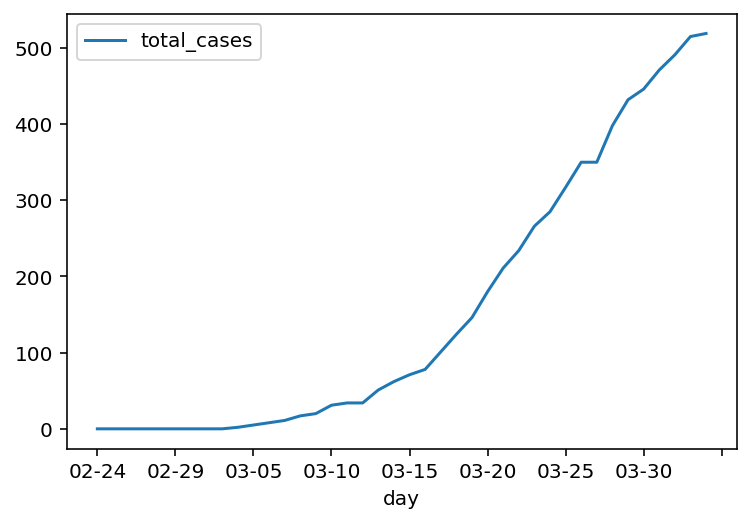

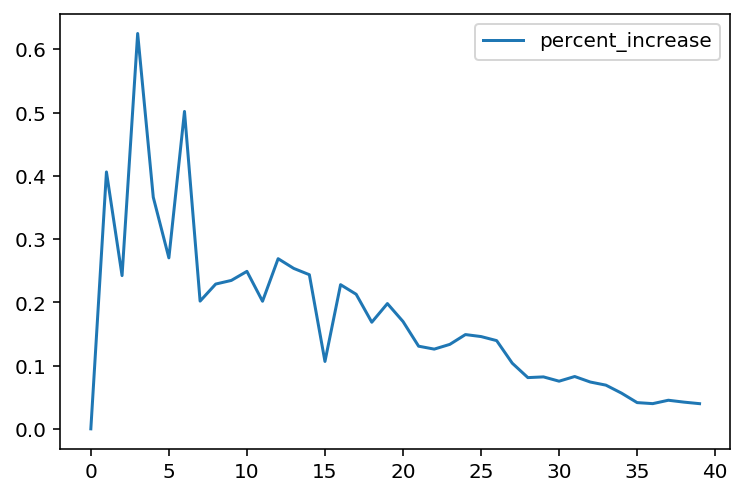

In [17]:
pisa=get_province("Pisa",provinces)
pisa.set_index("day", inplace=True)
pisa.plot()
increase=compute_perc_increase("province","total_cases", "Cagliari")
increase.plot()

Since we will need a lot of plotting, we now define a function to plot any two variables from the dataframe

In [18]:
def plot_df(df,asc,ords,kind='line'):
    plt.clf()
    if asc=='day':
        inds_x=np.arange(len(df))[::2]
        inds_y=np.linspace(min(df[ords]),max(df[ords]),num=20)
    else:
        inds_x=np.linspace(min(df[asc]),max(df[asc]),num=20)
        inds_y=np.linspace(min(df[ords]),max(df[ords]),num=20)
        
    ax=df.plot(x=asc,y=ords,label=ords+' over '+asc,figsize=(15,10.5),xticks=inds_x,yticks=inds_y,kind=kind)
    
    plt.xlabel(asc,fontsize=14)
    plt.ylabel(ords,fontsize=14)
    plt.legend(fontsize=14,loc='best')
    plt.show()

def multi_plot_df(dlist,asc,ords,names=None,kind='line'):
    plt.clf()
    if names==None:
        names=[str(i+1) for i in range(len(dlist))] 
    if asc=='day':
        inds_x=np.arange(len(dlist[0][asc]))[::2]
    ax=dlist[0].plot(x=asc,y=ords,label=names[0],figsize=(15,10.5),kind=kind)
    dlist.remove(dlist[0])
    names.remove(names[0])
    for df in dlist:
        df.plot(ax=ax,x=asc,y=ords,label=names[dlist.index(df)],figsize=(15,10.5),kind=kind)
    
    plt.title(ords+' over '+asc,fontsize=20)
    plt.xlabel(asc,fontsize=14)
    plt.ylabel(ords,fontsize=14)
    plt.legend(fontsize=14,loc='best')
    plt.show()

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

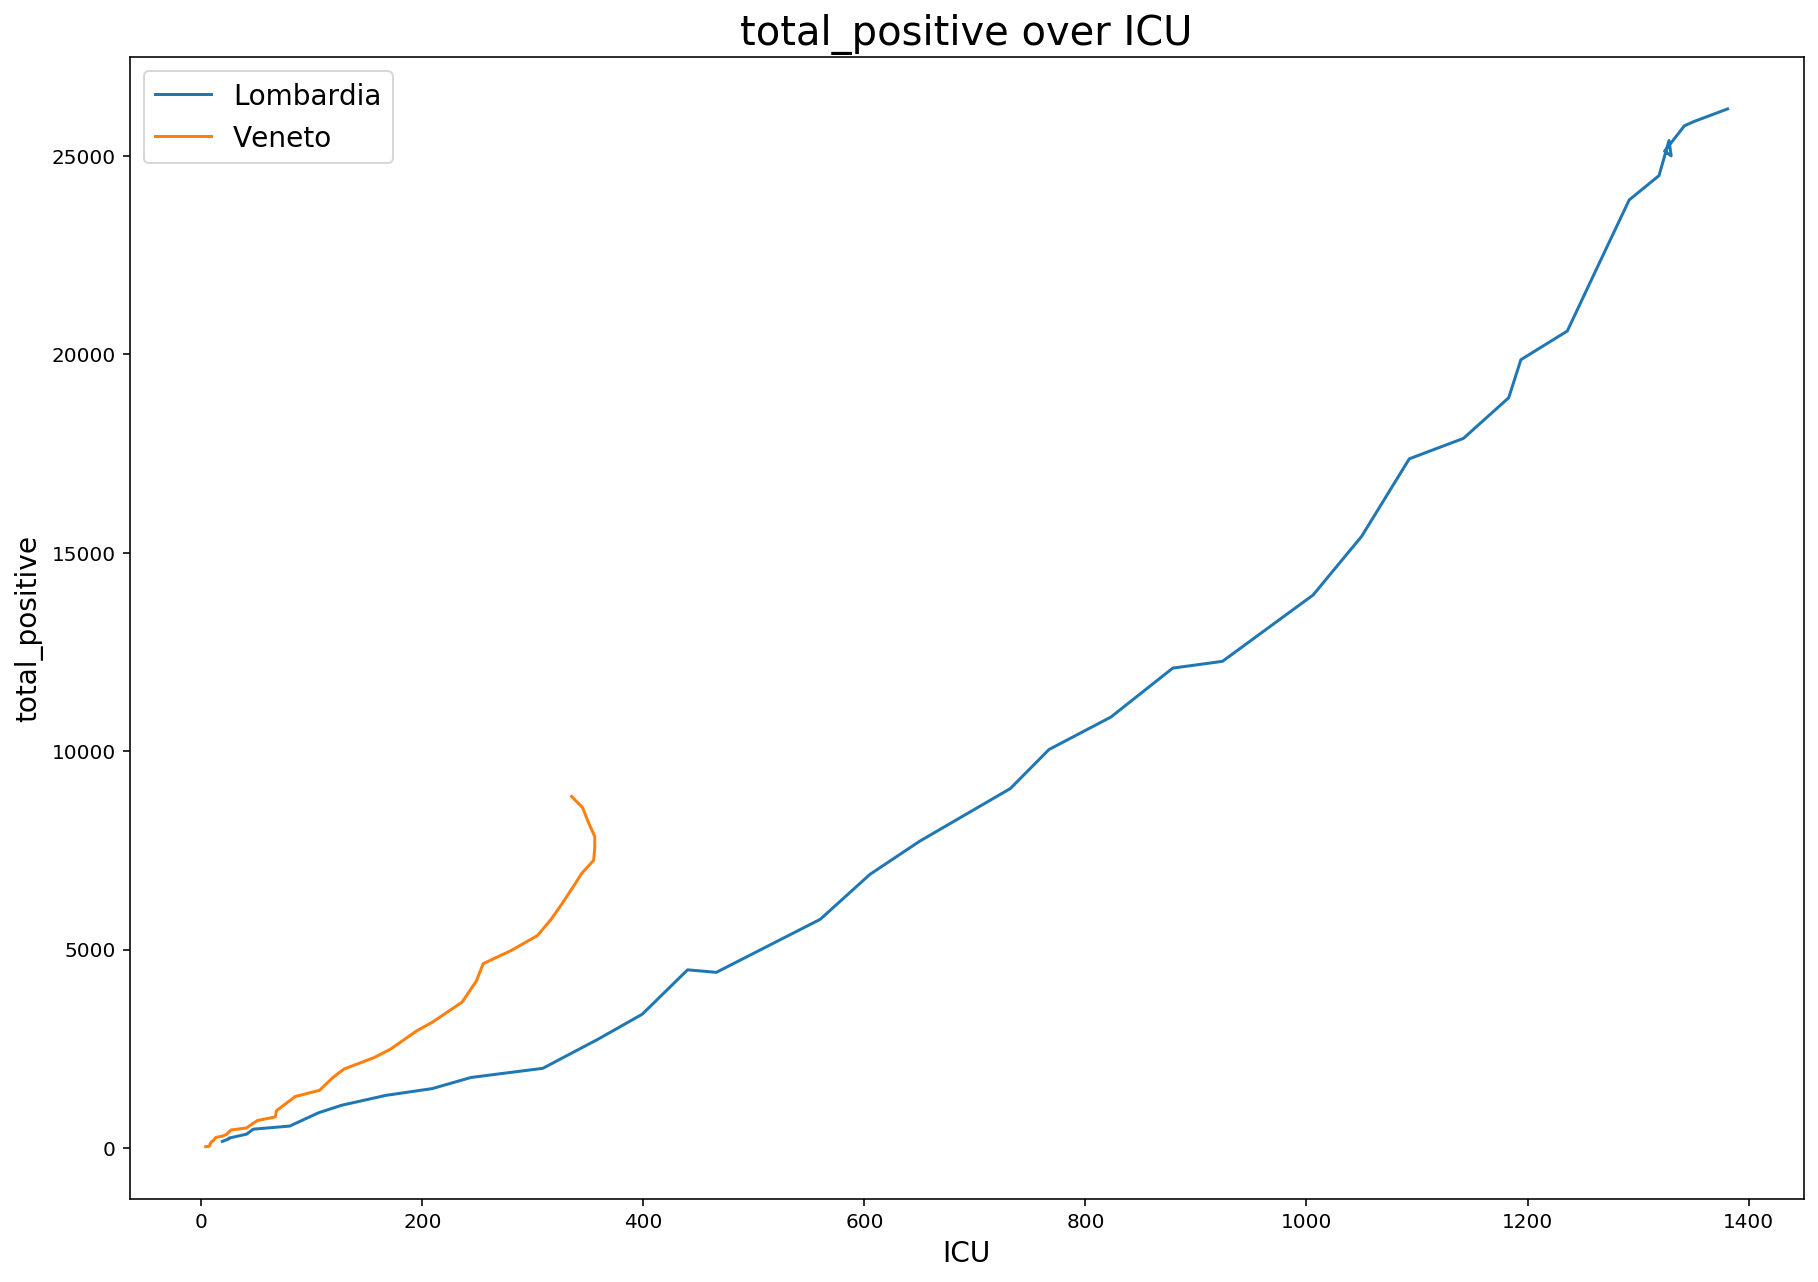

In [19]:
Lom=get_region('Lombardia',regions)
Ven=get_region('Veneto',regions)
multi_plot_df([Lom,Ven],'ICU','total_positive', names=['Lombardia','Veneto'])



/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

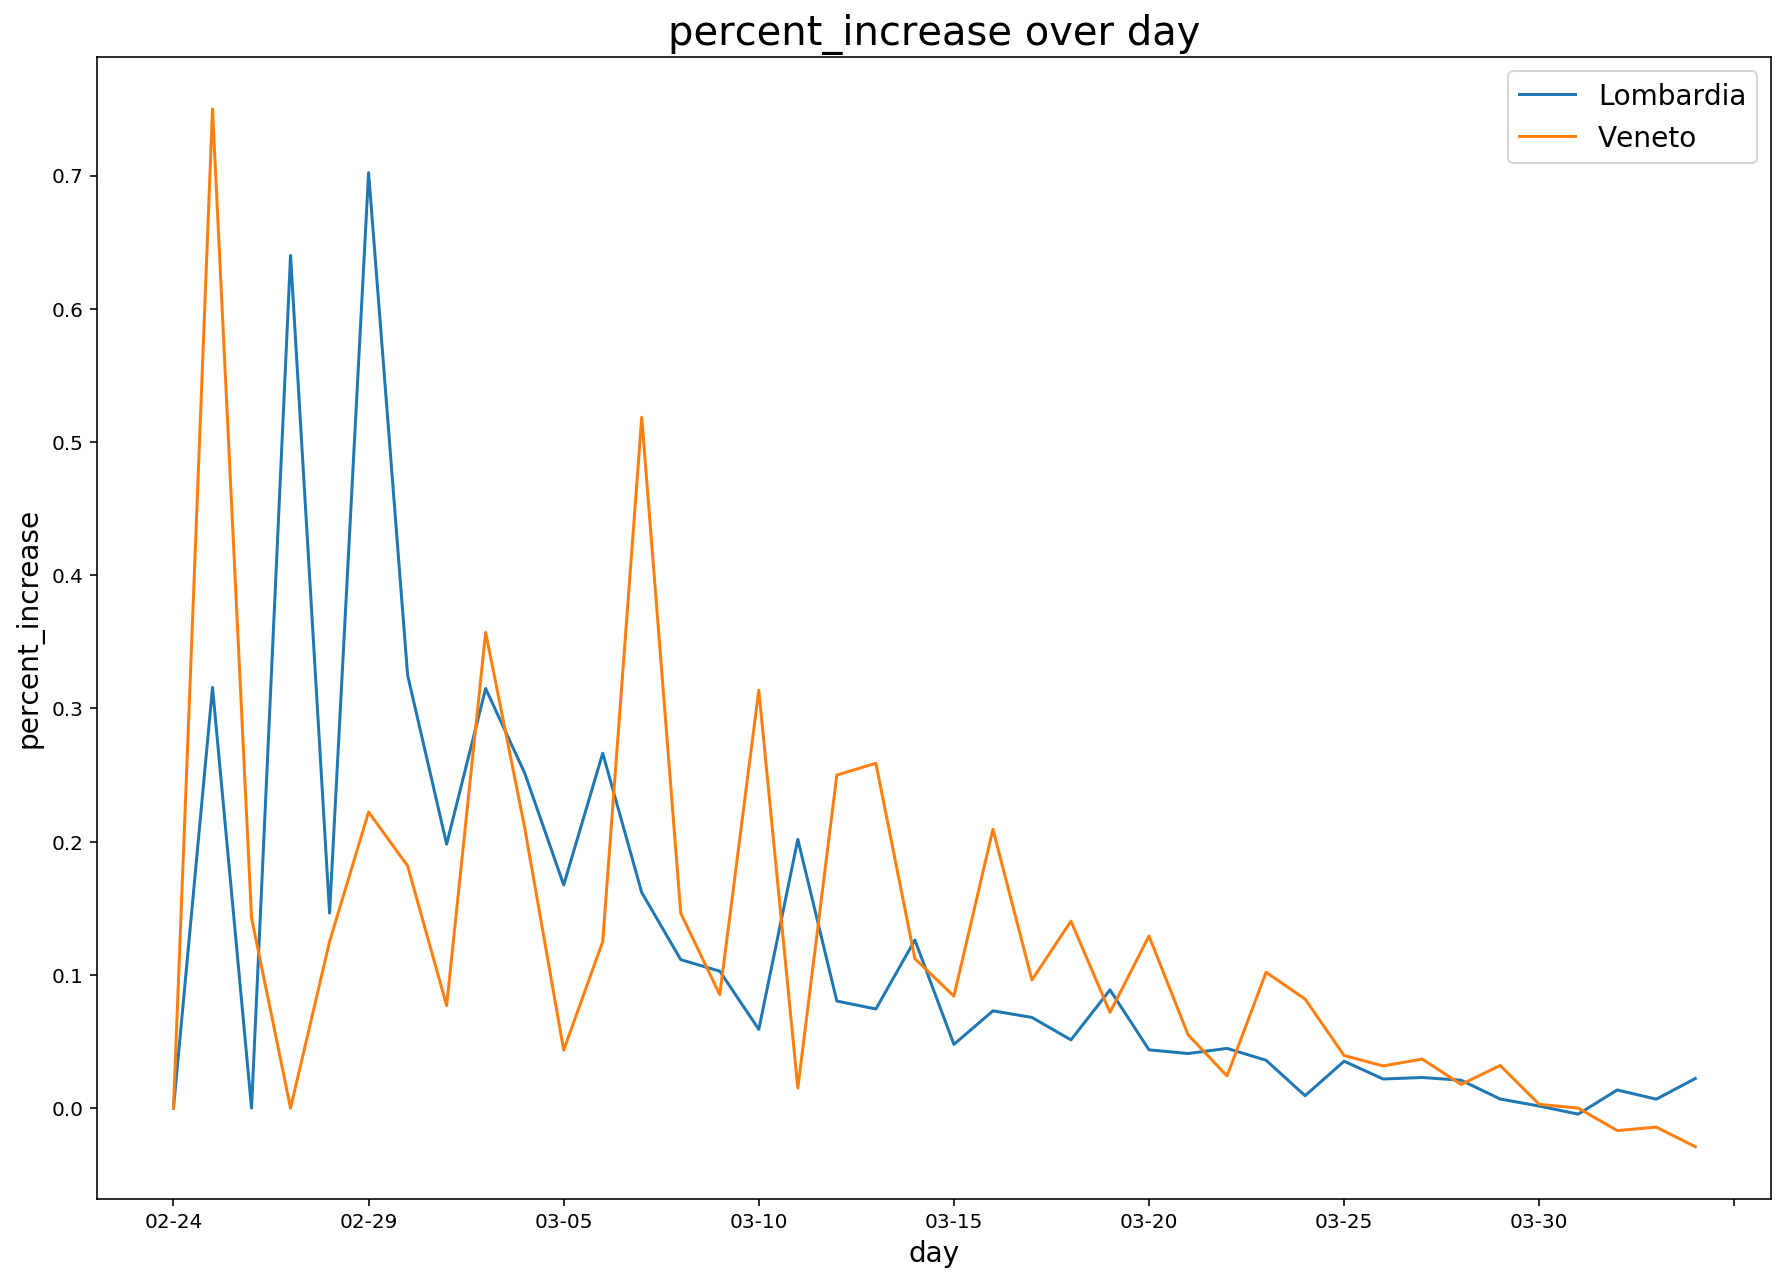

In [20]:
multi_plot_df([compute_perc_increase("regions",'ICU', "Lombardia"),compute_perc_increase("regions", "ICU", "Veneto")],
              'day','percent_increase',names=['Lombardia','Veneto'])

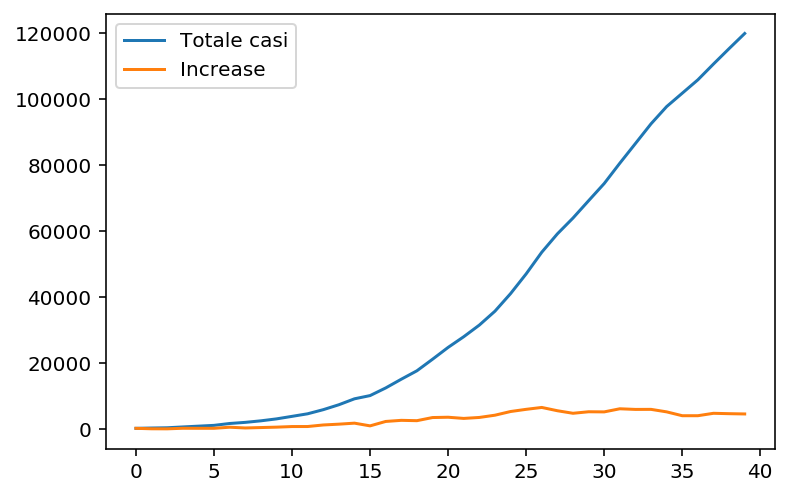

In [21]:
tot=plt.plot(country["total_cases"], label="Totale casi")
#incr=plt.plot(compute_perc_increase("country", "total_cases")["percent_increase"], label="Percent Increase")
incr=plt.plot(compute_increase(country, "total_cases")["increase"], label="Increase")
plt.legend()

We now try to guess if the current decrease in positive cases is good news in Lombardy & the whole Italy

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


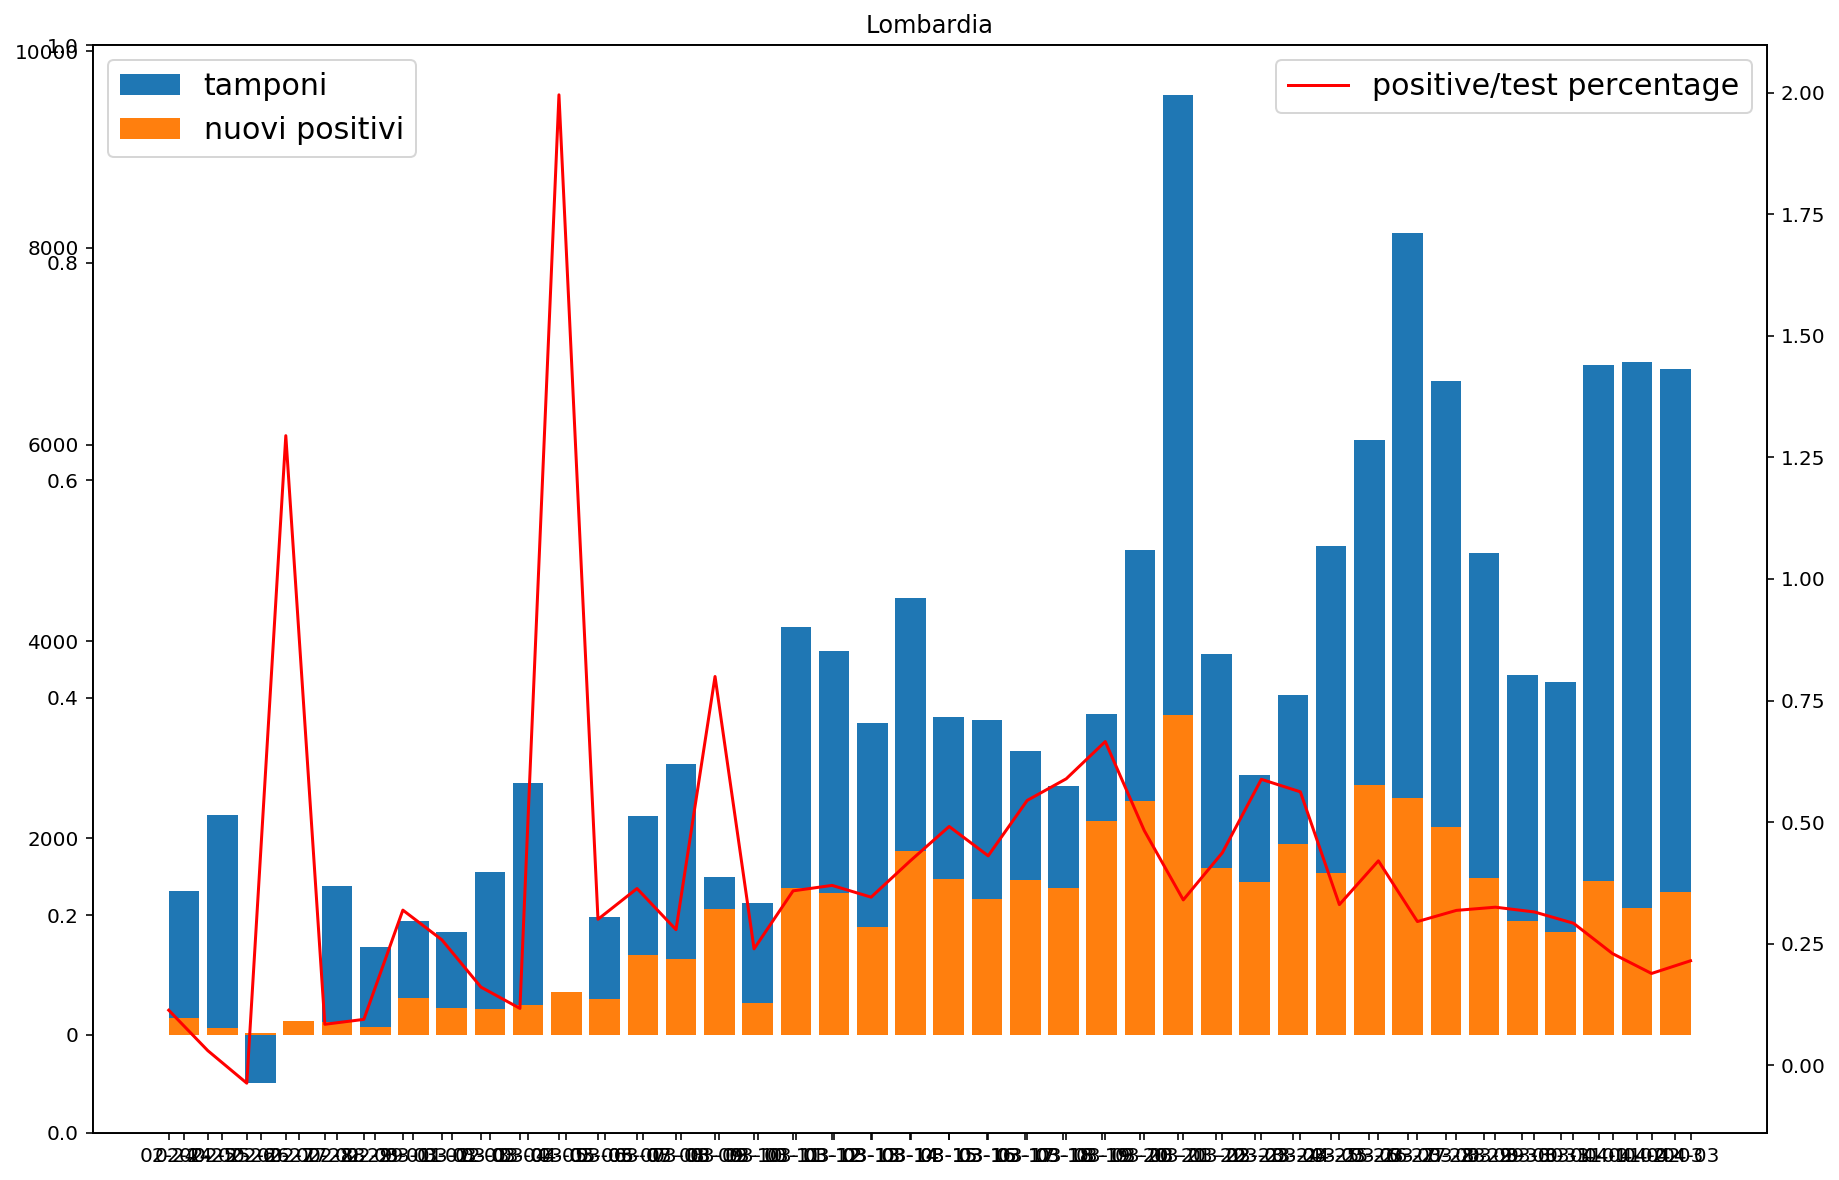

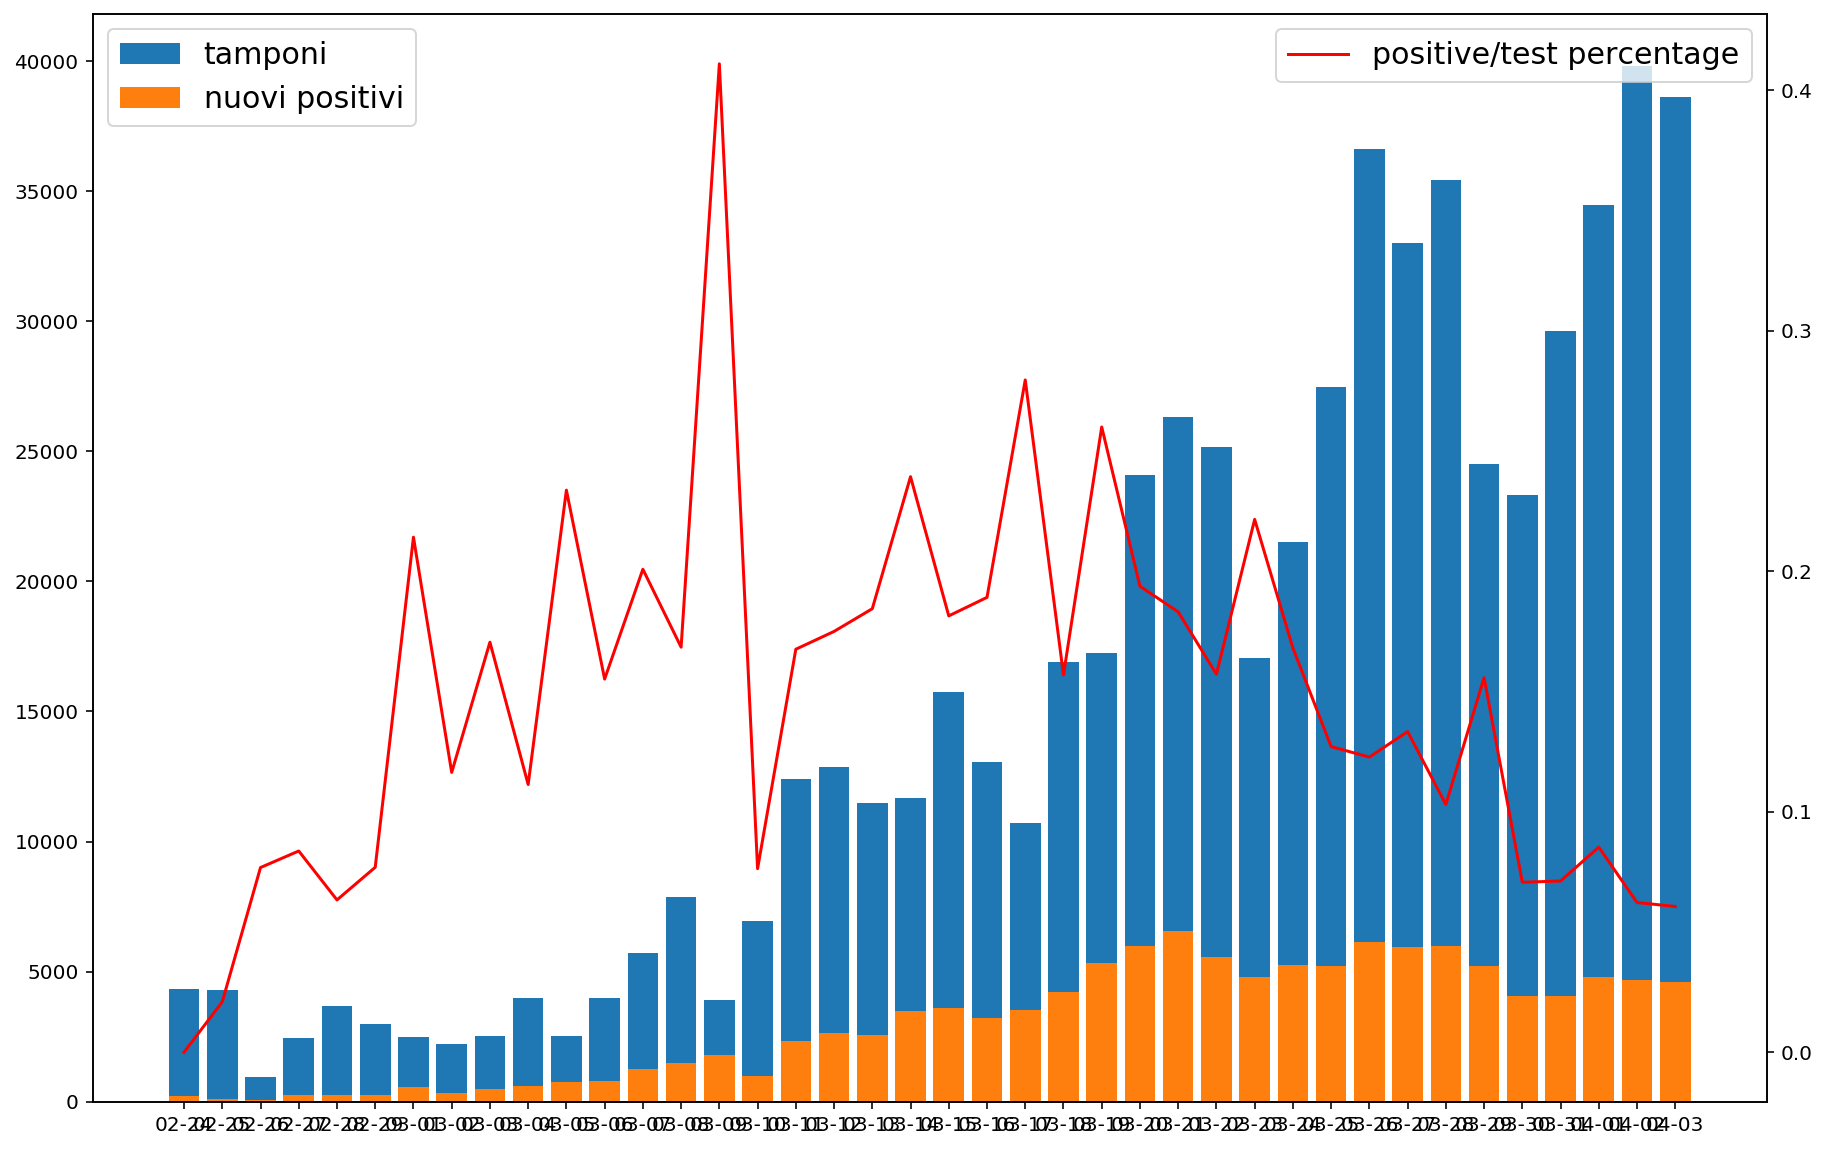

In [22]:
##da ordinare ma è un bel topic###
##################################

%matplotlib inline
Lom=get_region('Lombardia',regions)
tamp_lom=compute_increase(Lom,'tests')
tamp_nat=compute_increase(country,'tests')
succ_nat=country['variation_total_positive']/tamp_nat['increase']
succ_lom=Lom['new_positive']/tamp_lom['increase']

fig,ax1=plt.subplots(figsize=(15,10))
fig.add_subplot(111)
plt.title('Lombardia')
plt.bar(tamp_lom['day'],tamp_lom['increase'],label='tamponi')
plt.bar(Lom['day'],Lom['new_positive'],label='nuovi positivi')
plt.legend(loc='upper left',fontsize=15)
ax2=ax1.twinx()
ax2.plot(Lom['day'],succ_lom,label='positive/test percentage',c='r')
ax2.legend(loc='upper right',fontsize=15)
#ax.setxticks([])
fig2,ax1=plt.subplots(figsize=(15,10))
#fig2.addsubplot(111)
plt.bar(tamp_nat['day'],tamp_nat['increase'],label='tamponi')
plt.bar(country['day'],country['new_positive'],label='nuovi positivi')
plt.legend(loc='upper left',fontsize=15)
ax2=ax1.twinx()
ax2.plot(country['day'],succ_nat,label='positive/test percentage',c='r')
ax2.legend(loc='upper right',fontsize=15)




Now we will try to plot the increment of positive cases vs the total number or positive cases. 

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

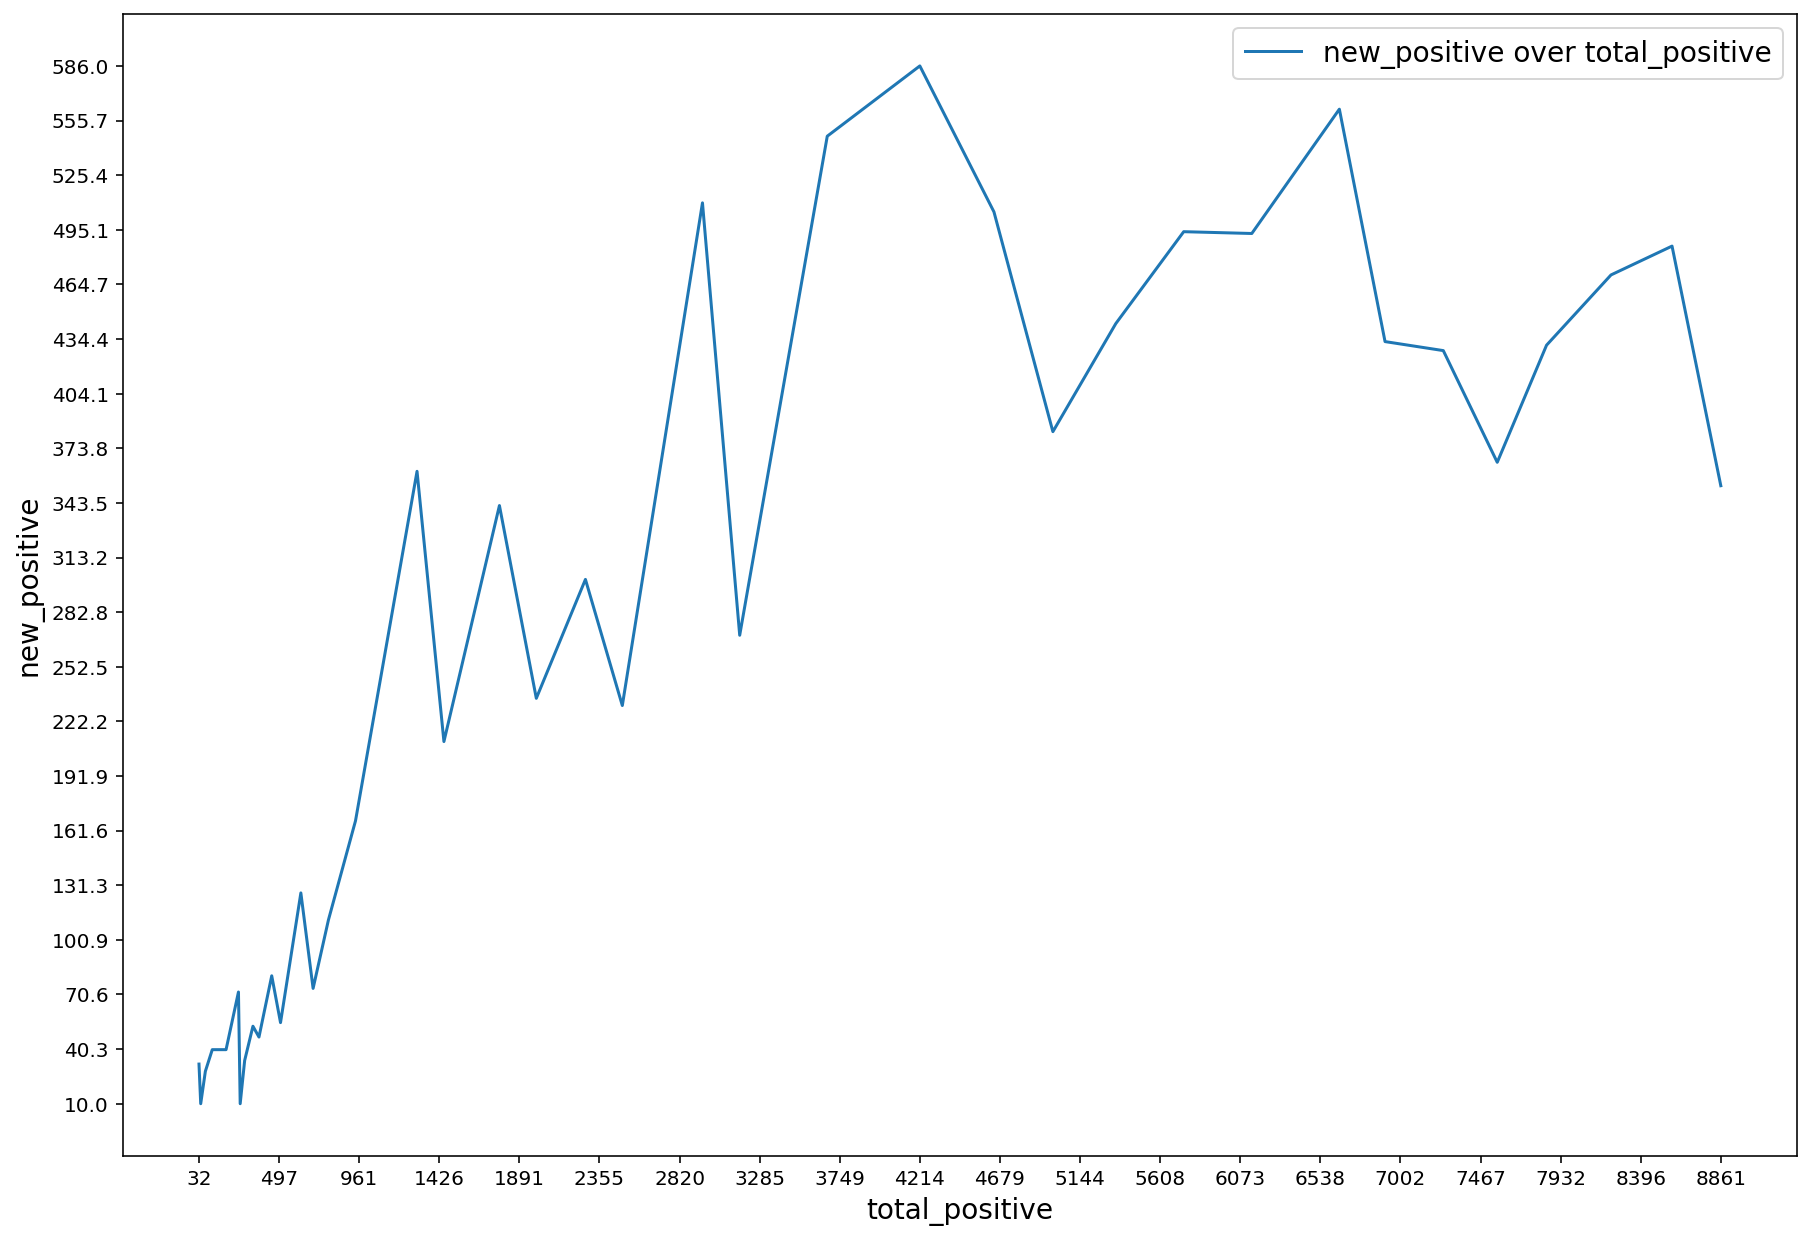

<Figure size 432x288 with 0 Axes>

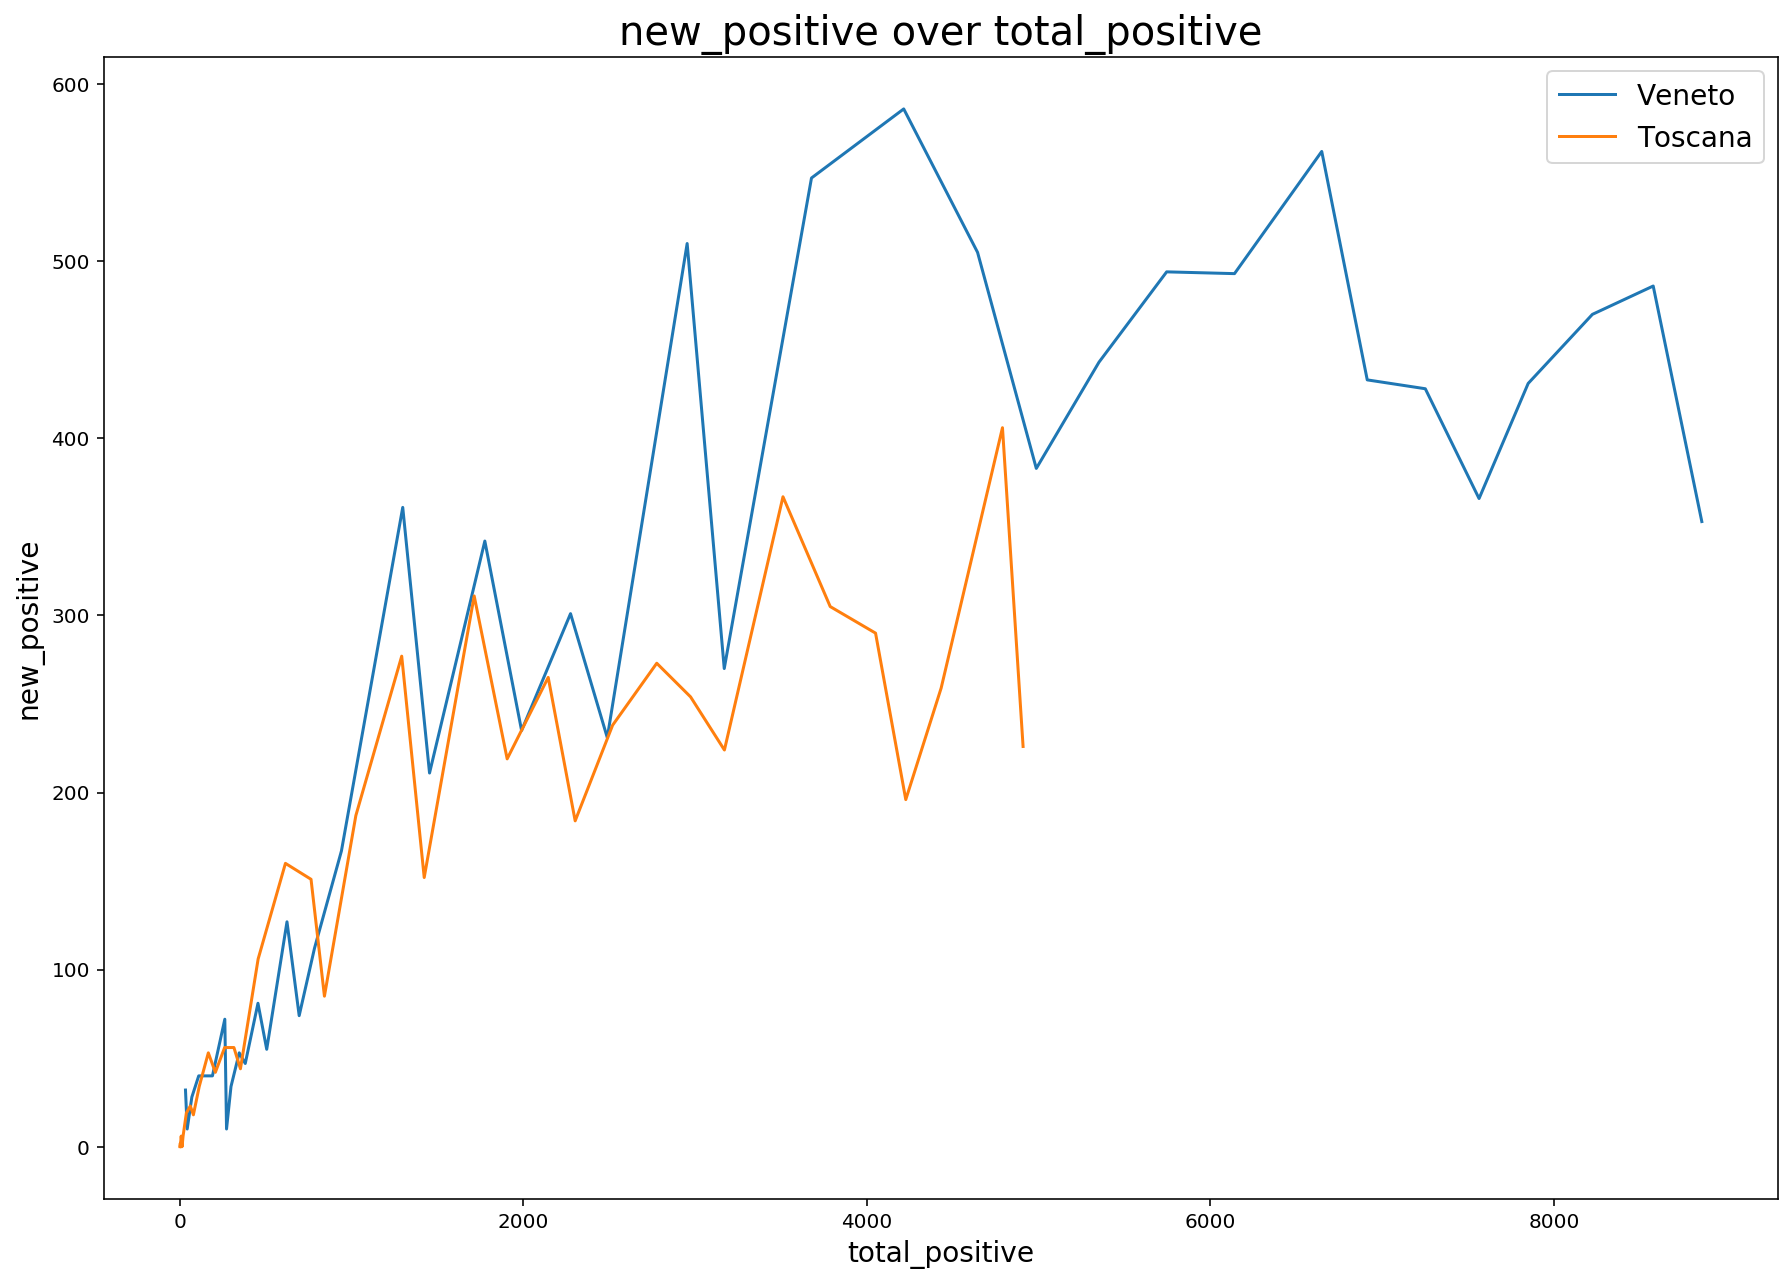

In [23]:
Ven=get_region('Veneto',regions)
Tosc=get_region('Toscana',regions)
inc=compute_increase(Ven,'total_cases')
plot_df(Ven,'total_positive','new_positive')
multi_plot_df([Ven,Tosc],'total_positive','new_positive',names=['Veneto','Toscana'])

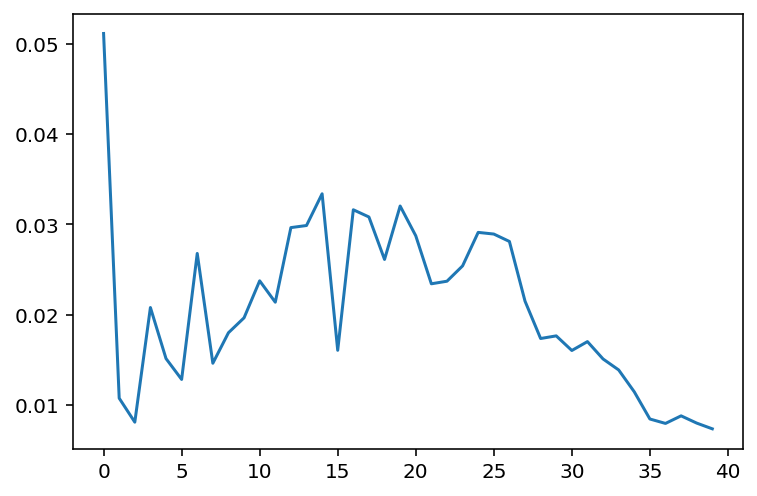

In [24]:
#Grafico da avere assolutamente imho
d=country["new_positive"]/country["tests"]
d.plot()

# Approximation attempt

we now try to approximate the function to a polynomial or to a logistic function in the first case we also have to assess the correct grade of the polynomial

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.pipeline import Pipeline

In [26]:
#Added plot feature: if True, prints the plots, if False, just computes the errors
#Added verbose feature: if True, prints the errors, if False, just computes the errors
#Ticks and lables fixed

def plot_learning_curves(model,X,y, size=(20,20), plot=True, verbose=True):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_err,val_err=[],[]
    for i in range(1,len(X_train)):
        model.fit(X_train[:i],y_train[:i])
        y_train_pred=model.predict(X_train[:i])
        y_val_pred=model.predict(X_val)
        train_err.append(mean_squared_error(y_train[:i],y_train_pred[:i]))
        val_err.append(mean_squared_error(y_val[:i],y_val_pred[:i]))
    if plot:
        plt.figure(figsize=size)    
        plt.ylabel("Error", fontsize=20)
        plt.xlabel("Size of training sample", fontsize=20)
        plt.xticks(fontsize=20)
        maxim=max(np.sqrt(train_err))
        step=maxim//10
        step=step-step%10
        #np.arange(maxim, step=step),
        plt.yticks( fontsize=20)
        plt.plot(np.sqrt(train_err),'r-+',linewidth=2,label='train')
        plt.plot(np.sqrt(val_err),'b-',linewidth=2,label='validation')
        plt.legend(fontsize="xx-large")
    if verbose:
        print('The training error is: ',np.sqrt(train_err[-1]))
        print('The validation error is: ',np.sqrt(val_err[-1]))
    return np.sqrt(train_err[-1]), np.sqrt(val_err[-1])

this is a second degree polynomial approximation, we will later implement it in a pipeline to try to get the best degree approximation

Below a way of plotting approximation vs real data for a second degree polynomial

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

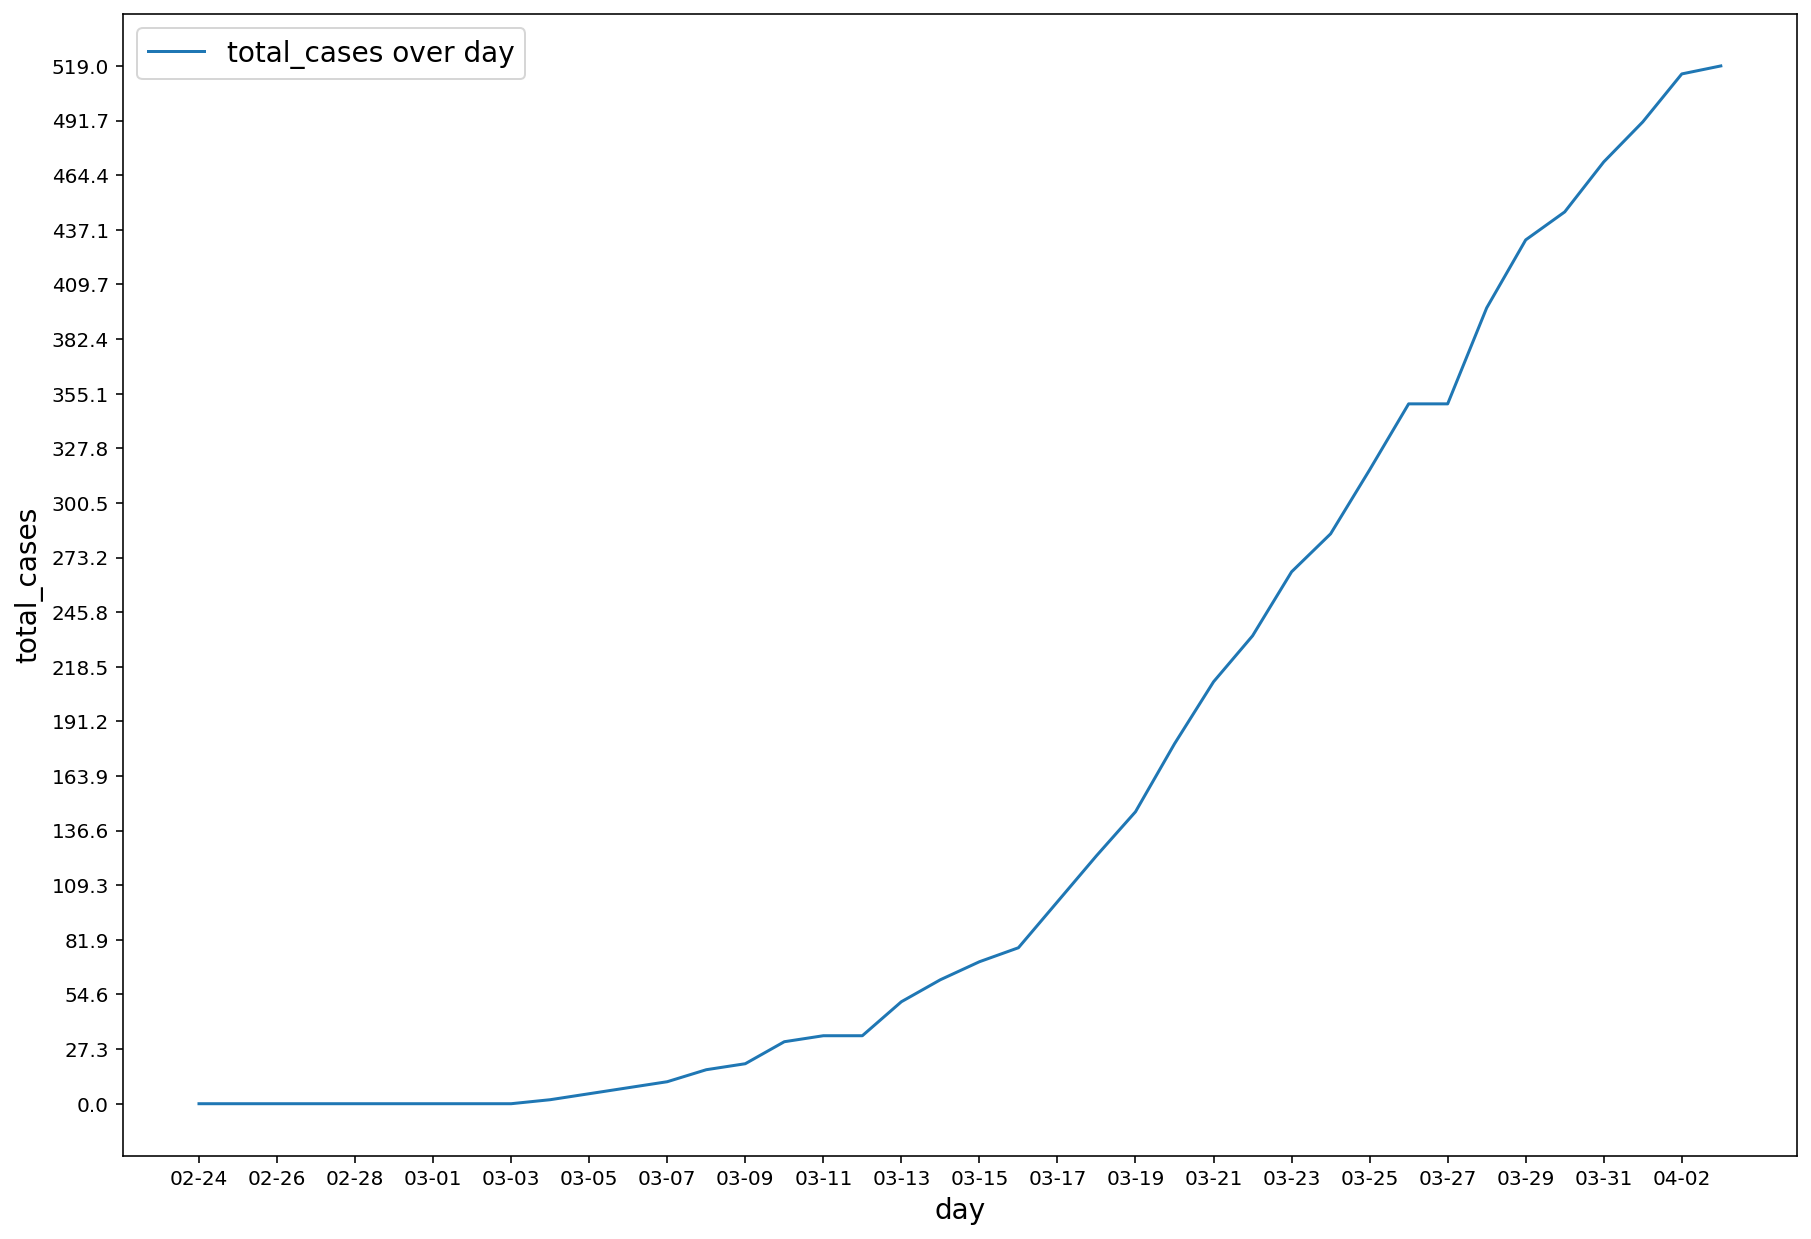

[]

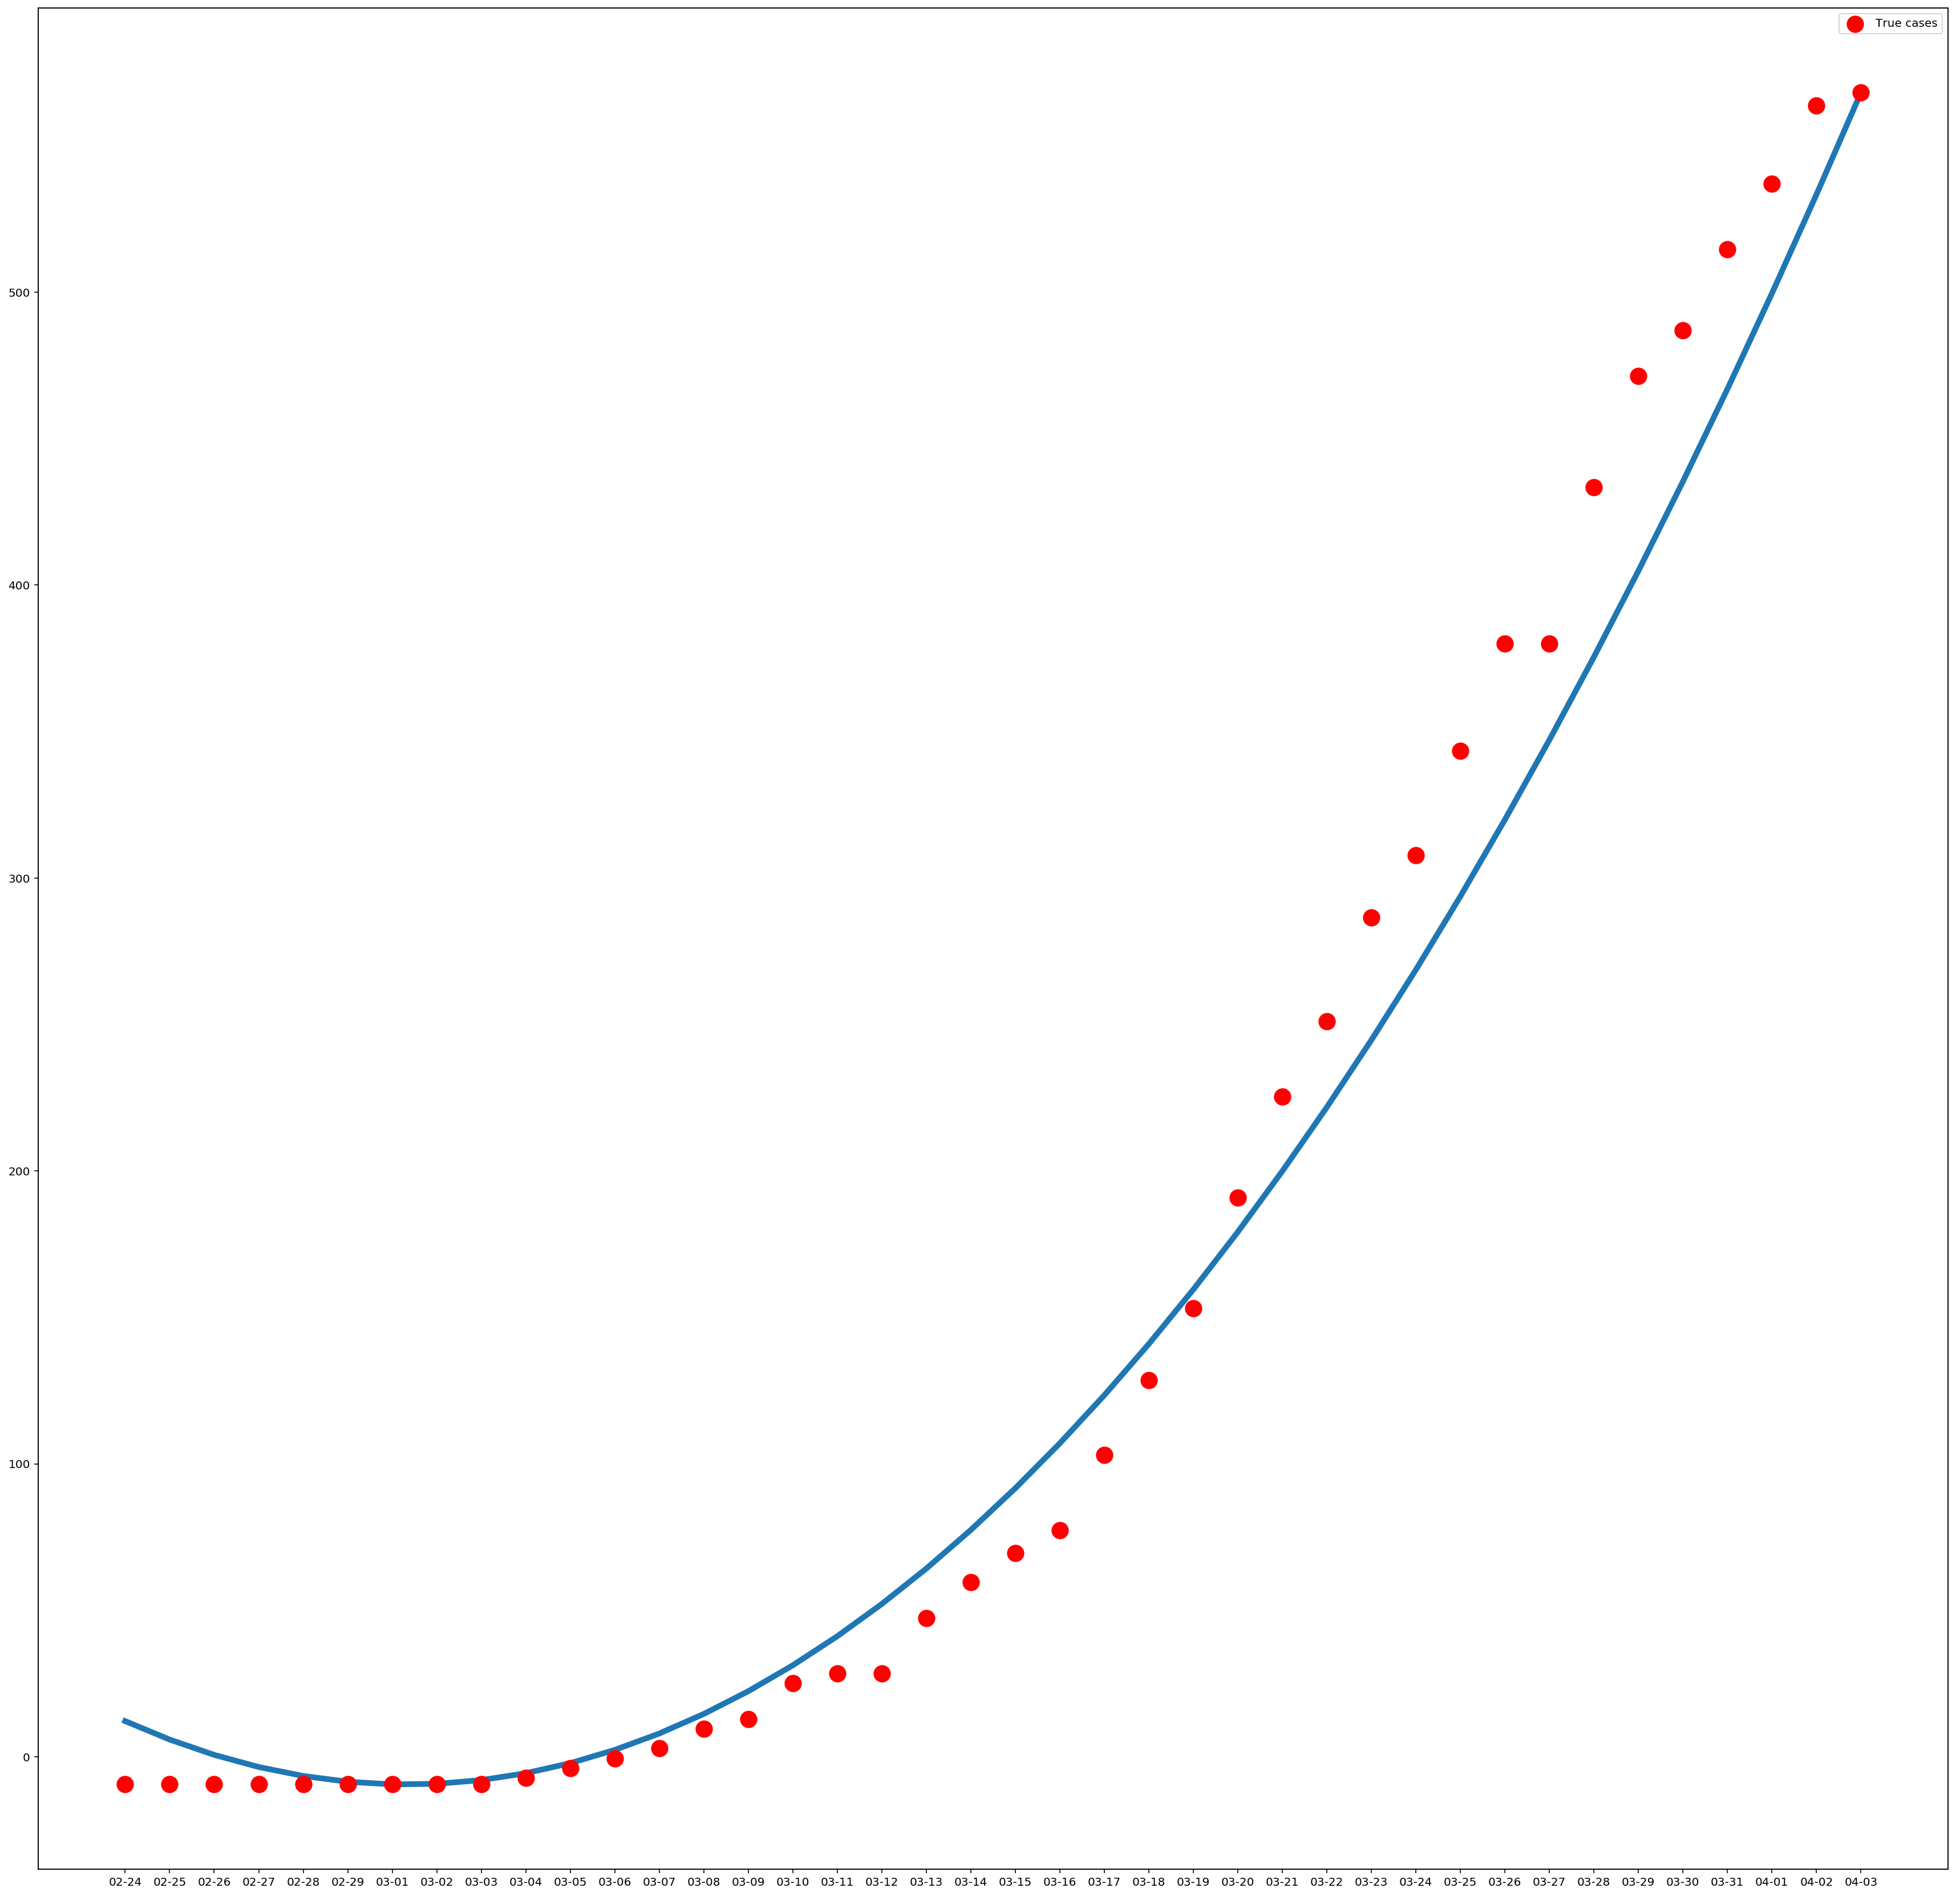

In [27]:
   #CELLA DA ELIMINARE
    
pisa=get_province('Pisa',provinces)
plot_df(pisa,'day','total_cases')
p=PolynomialFeatures(degree=2,include_bias=False)
y=pisa['total_cases']
X=np.arange(0,len(y)).reshape(-1,1)
X_pol=p.fit_transform(X)
lr=LinearRegression()
lr.fit(X_pol,y)
fig=plt.figure(figsize=(30,30))
ax1=fig.add_subplot(111)
ax2=ax1.twinx()
ax2.scatter(pisa['day'],pisa['total_cases'],c='r',label='True cases',s=200)
#x=np.arange(0,n_obs)
#fun=lr.coef_[0]*x+lr.coef_[1]*x**2+lr.intercept_
ax1.plot(lr.predict(X_pol),label='approximation',linewidth=5)
plt.legend(loc='best')
ax2.set_yticks([])
#ax2.set_xticks([])


##problems###
#mettere a posto legenda fa cagare SOLVED
    
    
##problemi##
#perchè non esce il label di approximation ma il plot si? diocane SOLVED
#dobbiamo generalizzare sennò è un casino rifare il plot per un grado 10 hahahhaha SOLVED
#confido nelle tue capacità di indexing


In [28]:
#OLD

#def plot_approx(area,asc,ords,degree=2):
#    p=PolynomialFeatures(degree=degree,include_bias=False)
#    y=area[ords]
#    if asc=='day':
#        X=np.arange(0,len(y)).reshape(-1,1)
#    else:
#        X=area[asc].to_numpy().reshape(-1,1)
#    X_pol=p.fit_transform(X)
#    lr=LinearRegression()
#    lr.fit(X_pol,y)
#    plt.clf()
#    fig=plt.figure(figsize=(30,30))
#    ax1=fig.add_subplot(111)
#    ax2=ax1.twinx()
#    ax2.scatter(area[asc],area[ords],c='r',label='True values',s=200)
#    ax1.plot(X,lr.predict(X_pol),label='approximation',linewidth=5)
#    plt.legend(loc='upper left', fontsize="large")
#    ax2.set_yticks([])
#plot_approx(get_province('Pisa',provinces), "day", "total_cases")

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

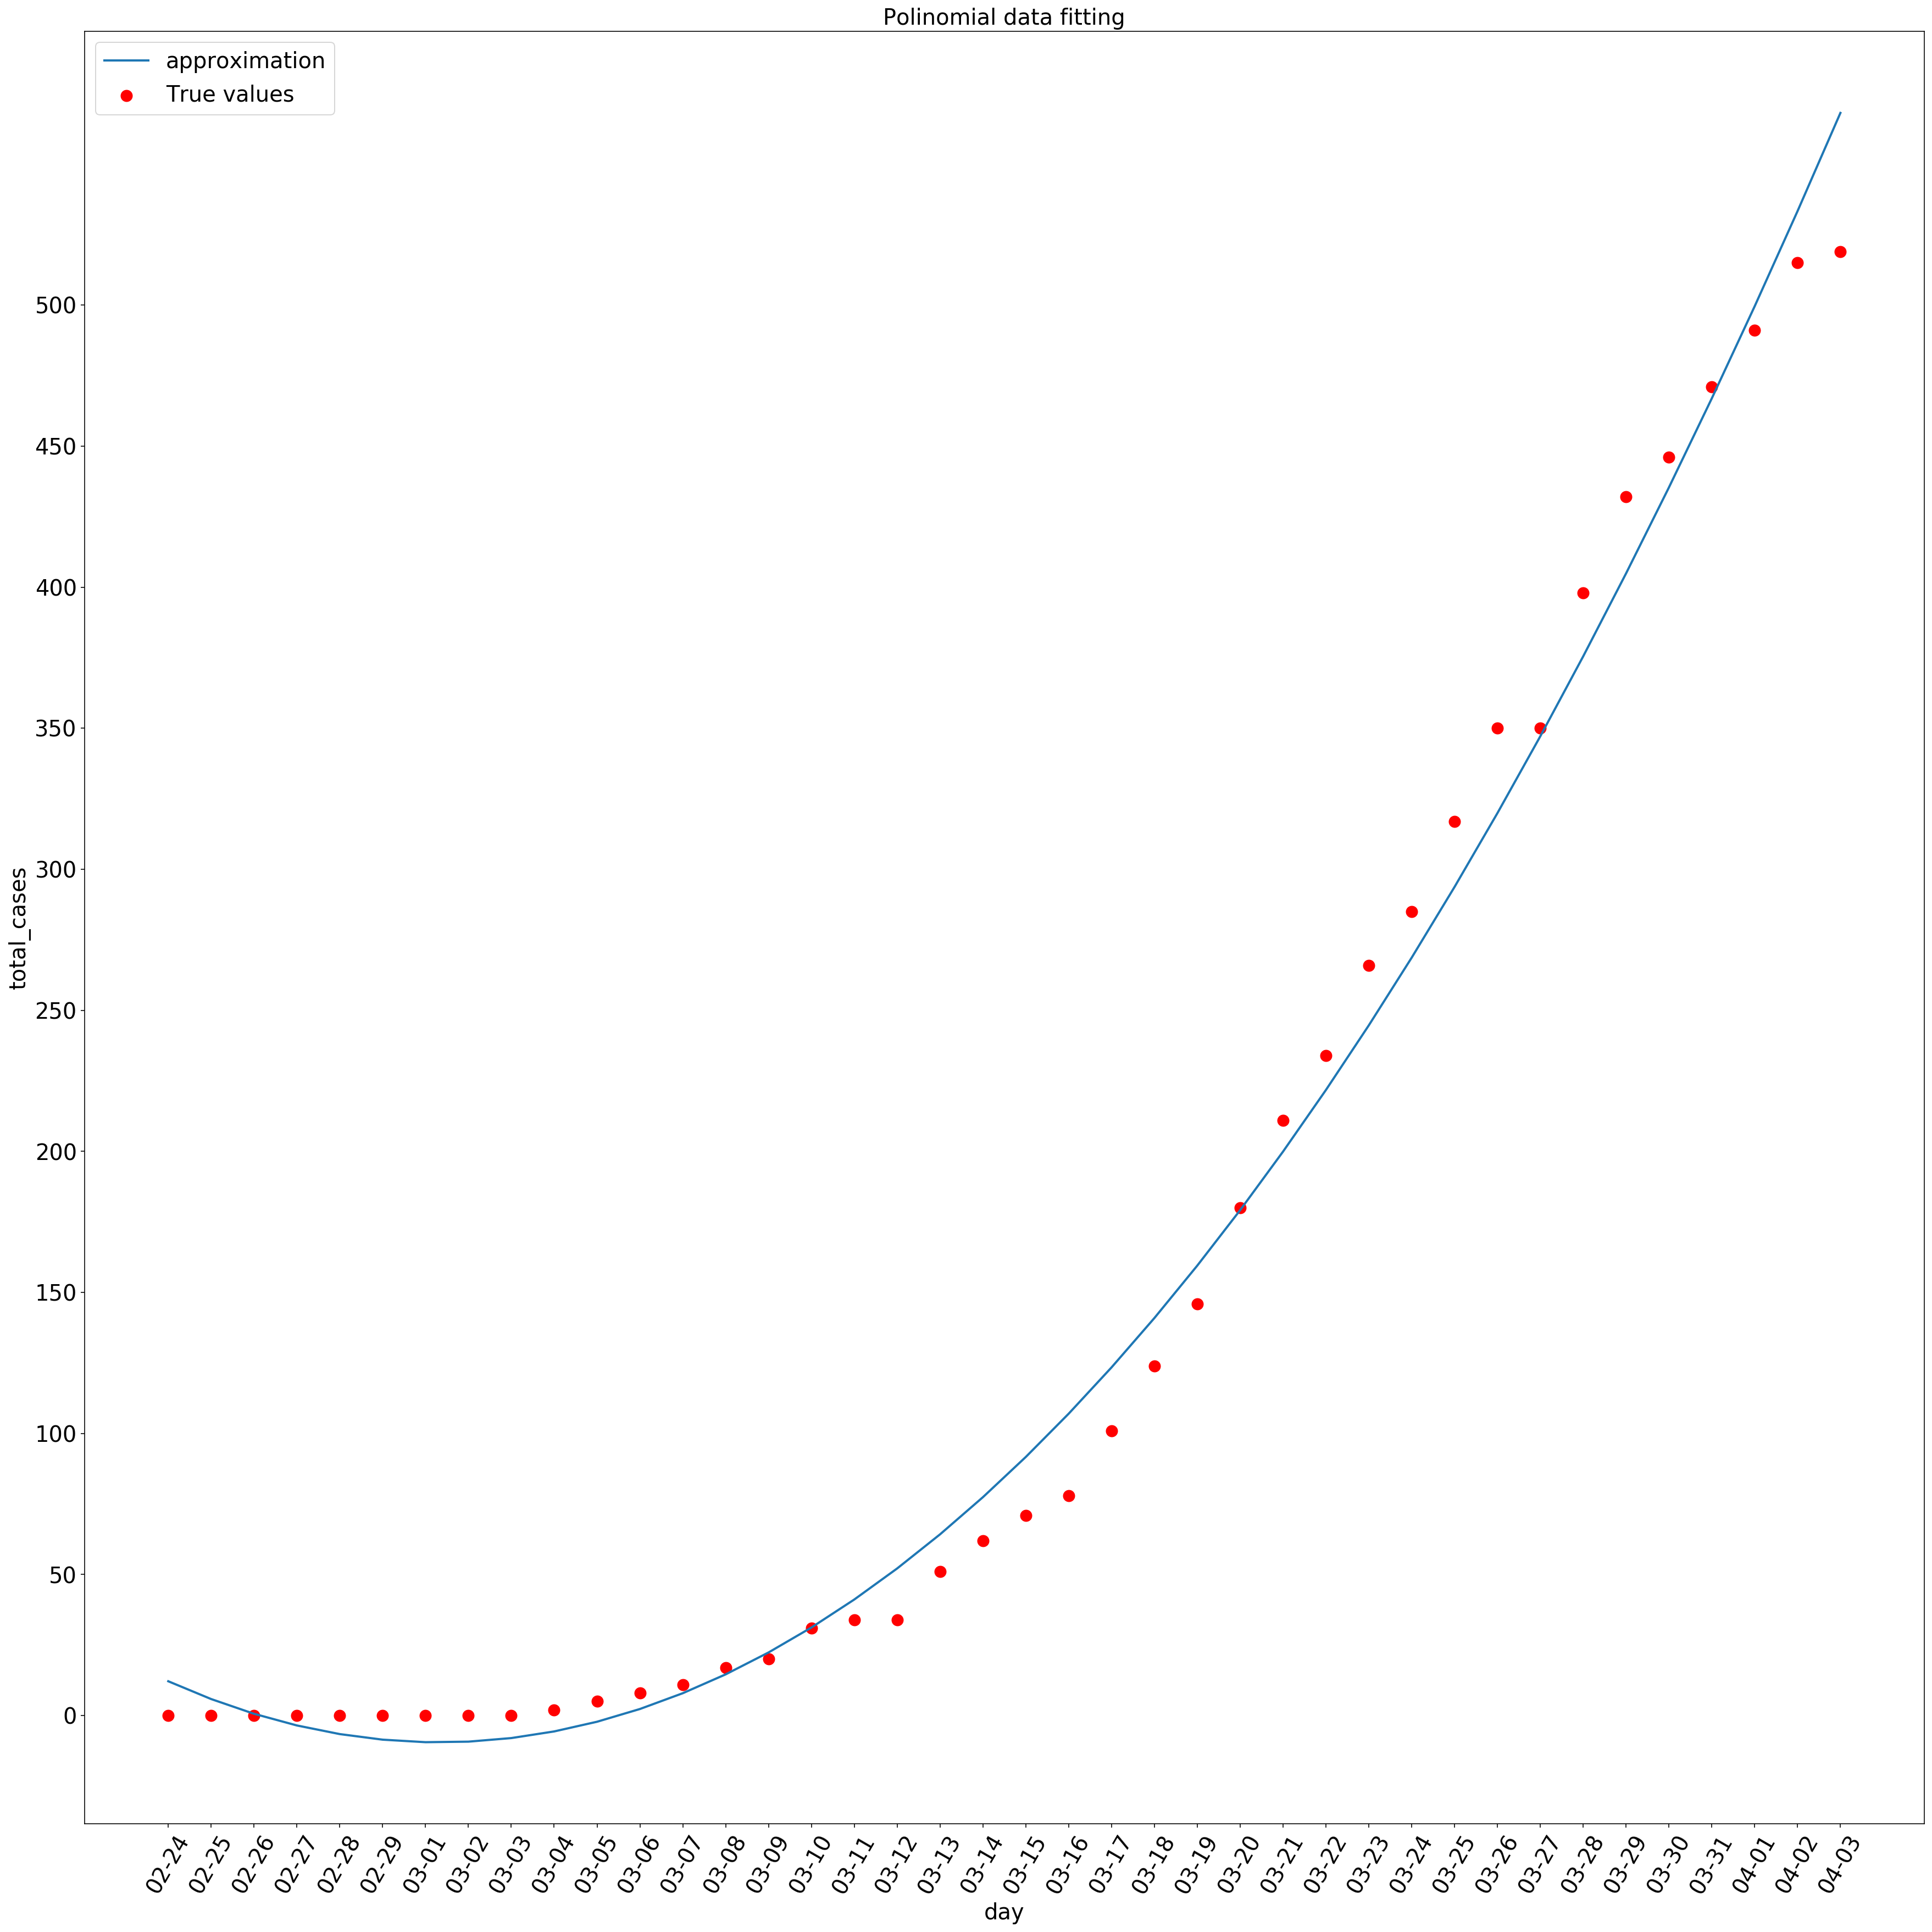

In [29]:
#Remind: quando chiamiamo questa funzione al posto del parametro "area" dobbiamo mettere un database
#generato da una funzione get, non uno di quelli originali. Esempio:
#plot_approx(get_province('Pisa',provinces), "day", "total_cases")

#Labels fixed
#Ticks fixed
#Title included
#Included a couple of tricks for ticks
#Added plot bool

def plot_approx(area,asc,ords,degree=2,size=(30,30), plot=True):
    p=PolynomialFeatures(degree=degree,include_bias=False)
    y=area[ords]
    if asc=='day':
        X=np.arange(0,len(y)).reshape(-1,1)
    else:
        X=area[asc].to_numpy().reshape(-1,1)
    if plot:
        X_pol=p.fit_transform(X)
        lr=LinearRegression()
        lr.fit(X_pol,y)
        plt.clf()
        fig=plt.figure(figsize=size)
        plt.scatter(area[asc],area[ords],c='r',label='True values',s=100)
        ax1=plt.plot(X,lr.predict(X_pol),label='approximation',linewidth=2)
        plt.ylabel(ords, fontsize=20)
        plt.xlabel(asc, fontsize=20)
        plt.title('Polinomial data fitting', fontsize=20)
        plt.legend(loc='upper left', fontsize=20)
        plt.xticks(fontsize=20, rotation=60)
        maxim=max(area[ords])
        step=maxim//10
        step=step-step%10
        plt.yticks(np.arange(maxim, step=step), fontsize=20)
    return X,y
x,y=plot_approx(get_province('Pisa',provinces), "day", "total_cases")

The training error is:  68.37315930902923
The validation error is:  55.295027139127185


(68.37315930902923, 55.295027139127185)

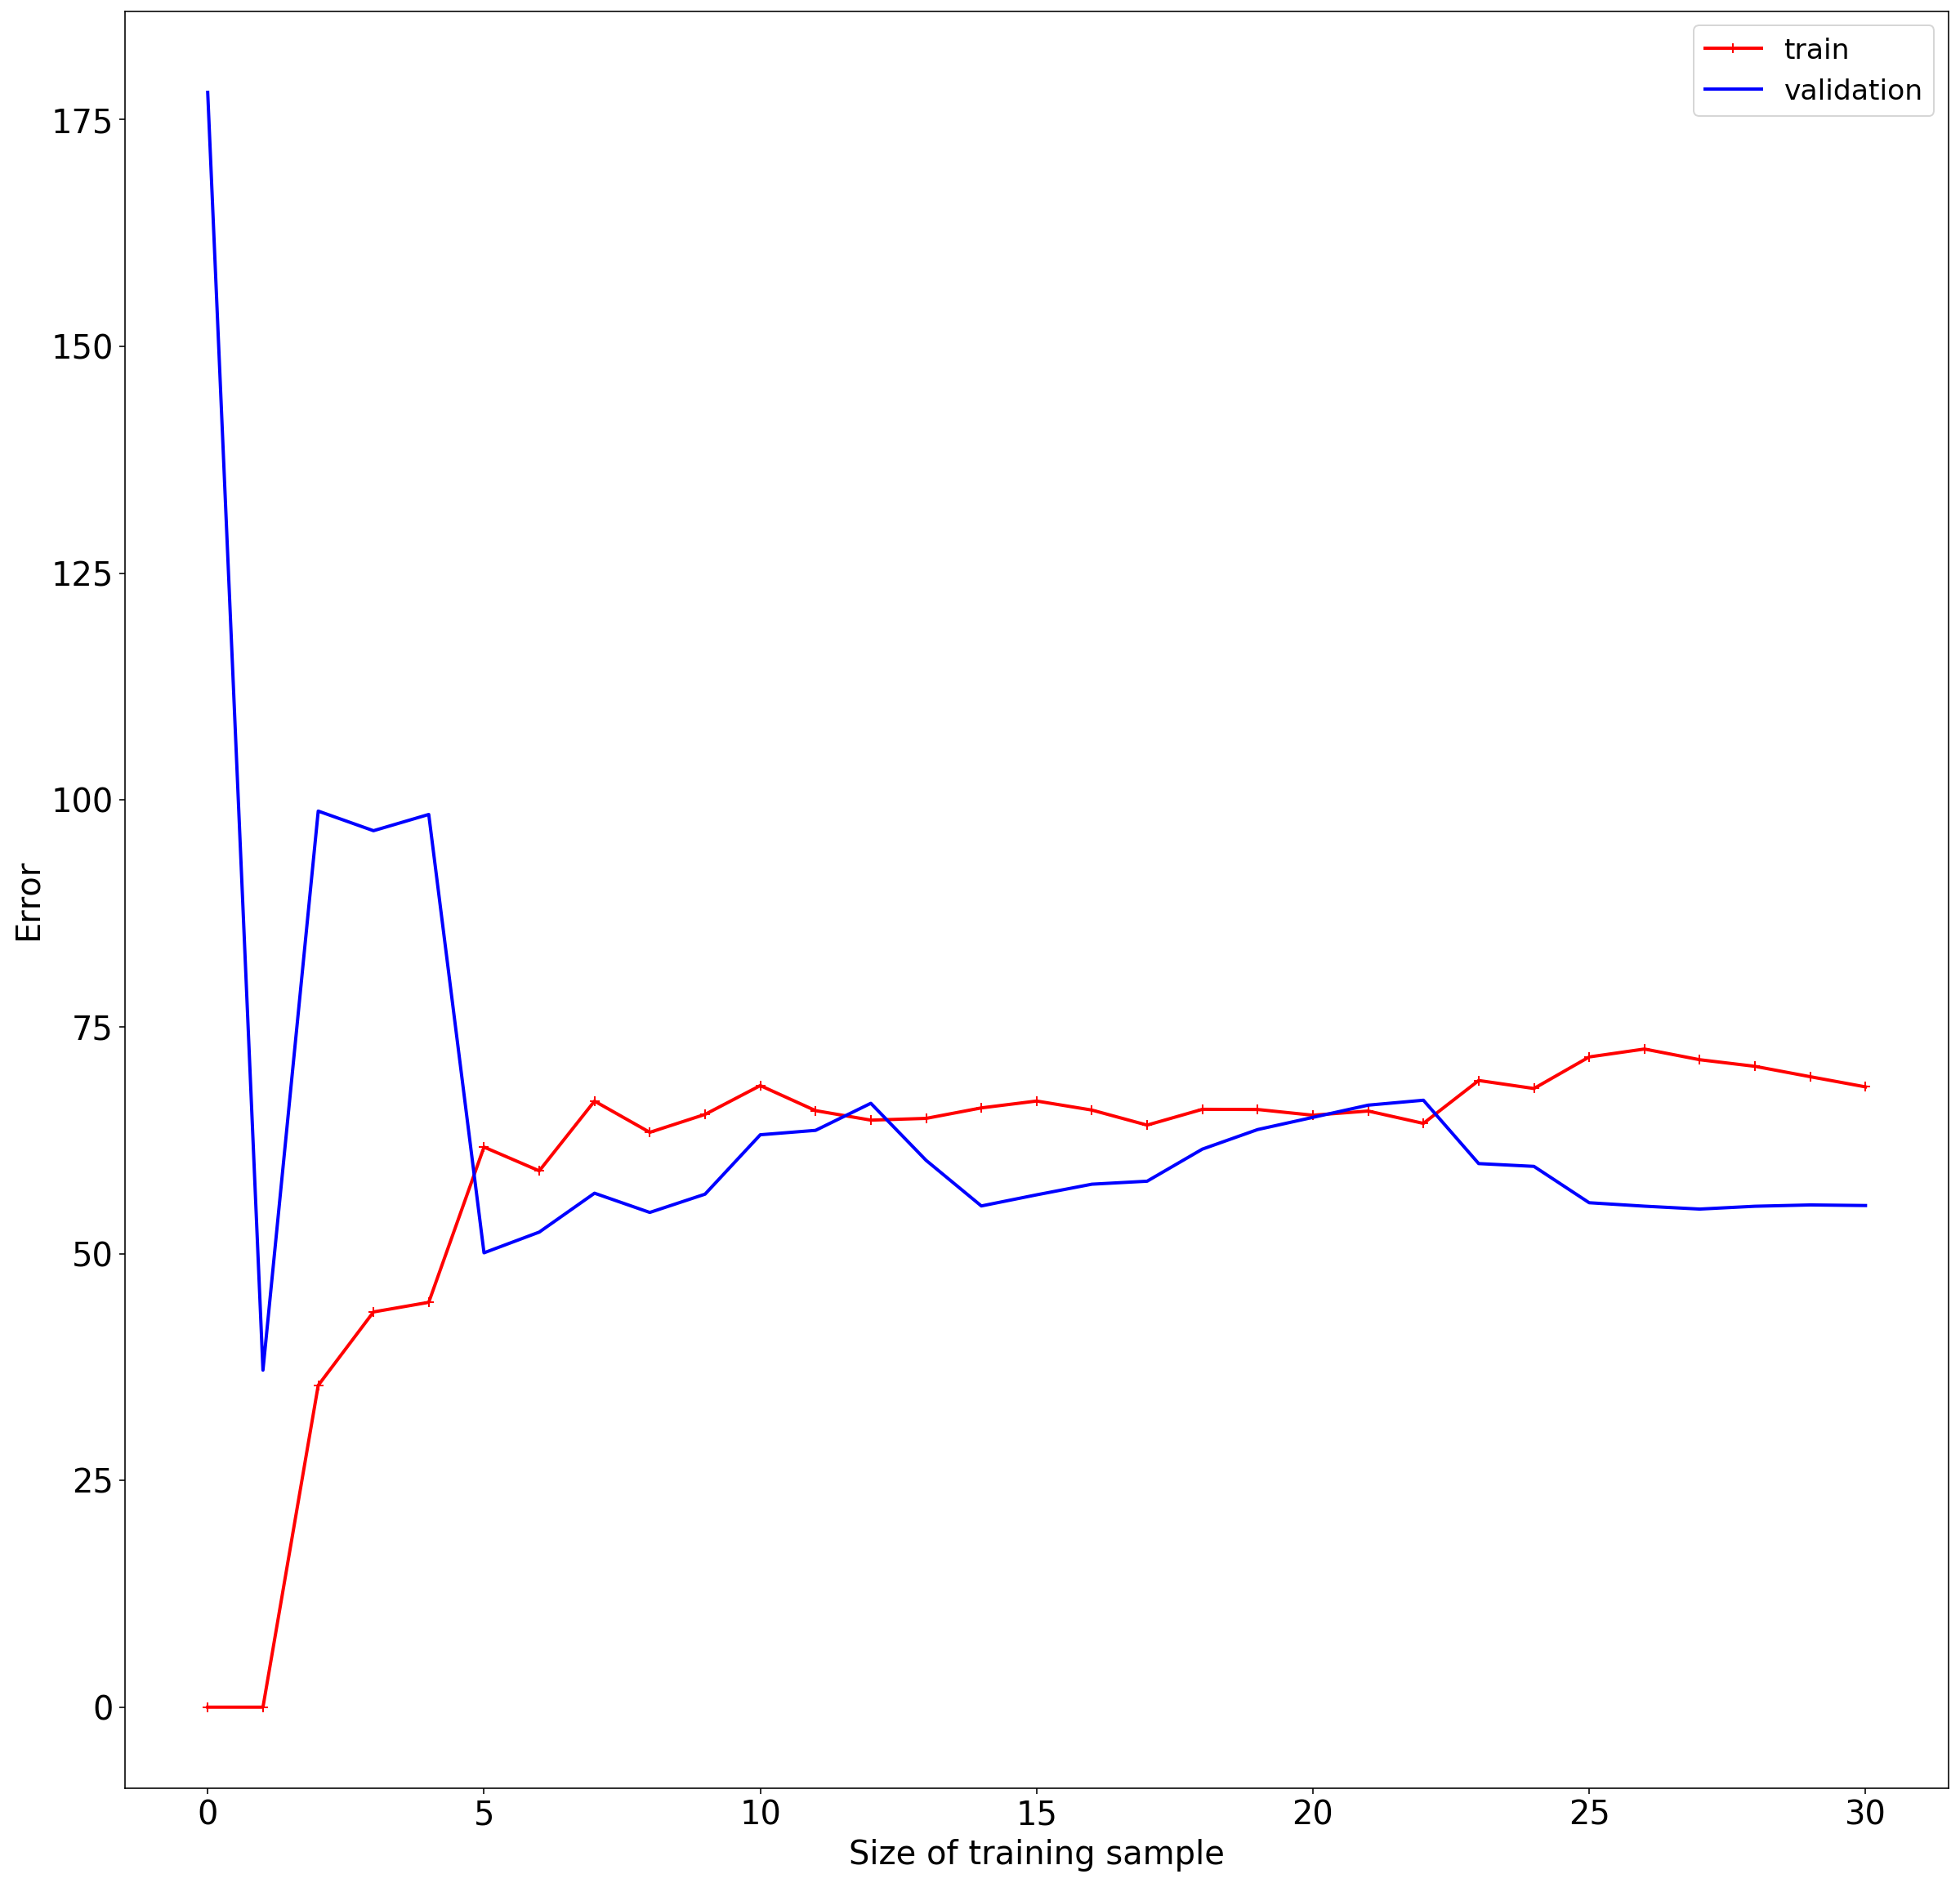

In [30]:
lr=LinearRegression()
plot_learning_curves(lr,X,y)

##problems##
#sarebbe carino zoommare il plot per capire a che errore si stabilizza SOLVED
#se impossibile almeno stampare l'errore finale SOLVED
#runnandolo più volte l'errore è molto random, probabilmente perchè c'è overfitting o 
#semplicemente perchè ci sono pochi dati a disposizione, una soluzione si incontrerebbe
#facendo regression su più dati, questa è una prova su pisa a caso

#Difficile avere più dati

Now we will try to check which is the best degree for approximating these data

In [31]:
#OLD 
#    for i in range(10):
#        pol_reg=Pipeline([('p',PolynomialFeatures(degree=i,include_bias=False)),('lr',LinearRegression())])
#        if i==1 or i==5 or i==9:
#            plt.figure()
#            plot_approx(Lom,'ICU','total_cases',degree=i,  size=(20,20))
#            plt.title(f'Polynomial of degree {i}', size=20)
#            plot_learning_curves(pol_reg,X,y, size=(20,20))
#            plt.title(f'Learning curves, polynomial of degree {i}', size=20)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


The least training error is:  522.6281038841221  and was obtained with a polymonial of degree 4
The least validation error is:  320.52485816137647  and was obtained with a polymonial of degree 7


<Figure size 432x288 with 0 Axes>

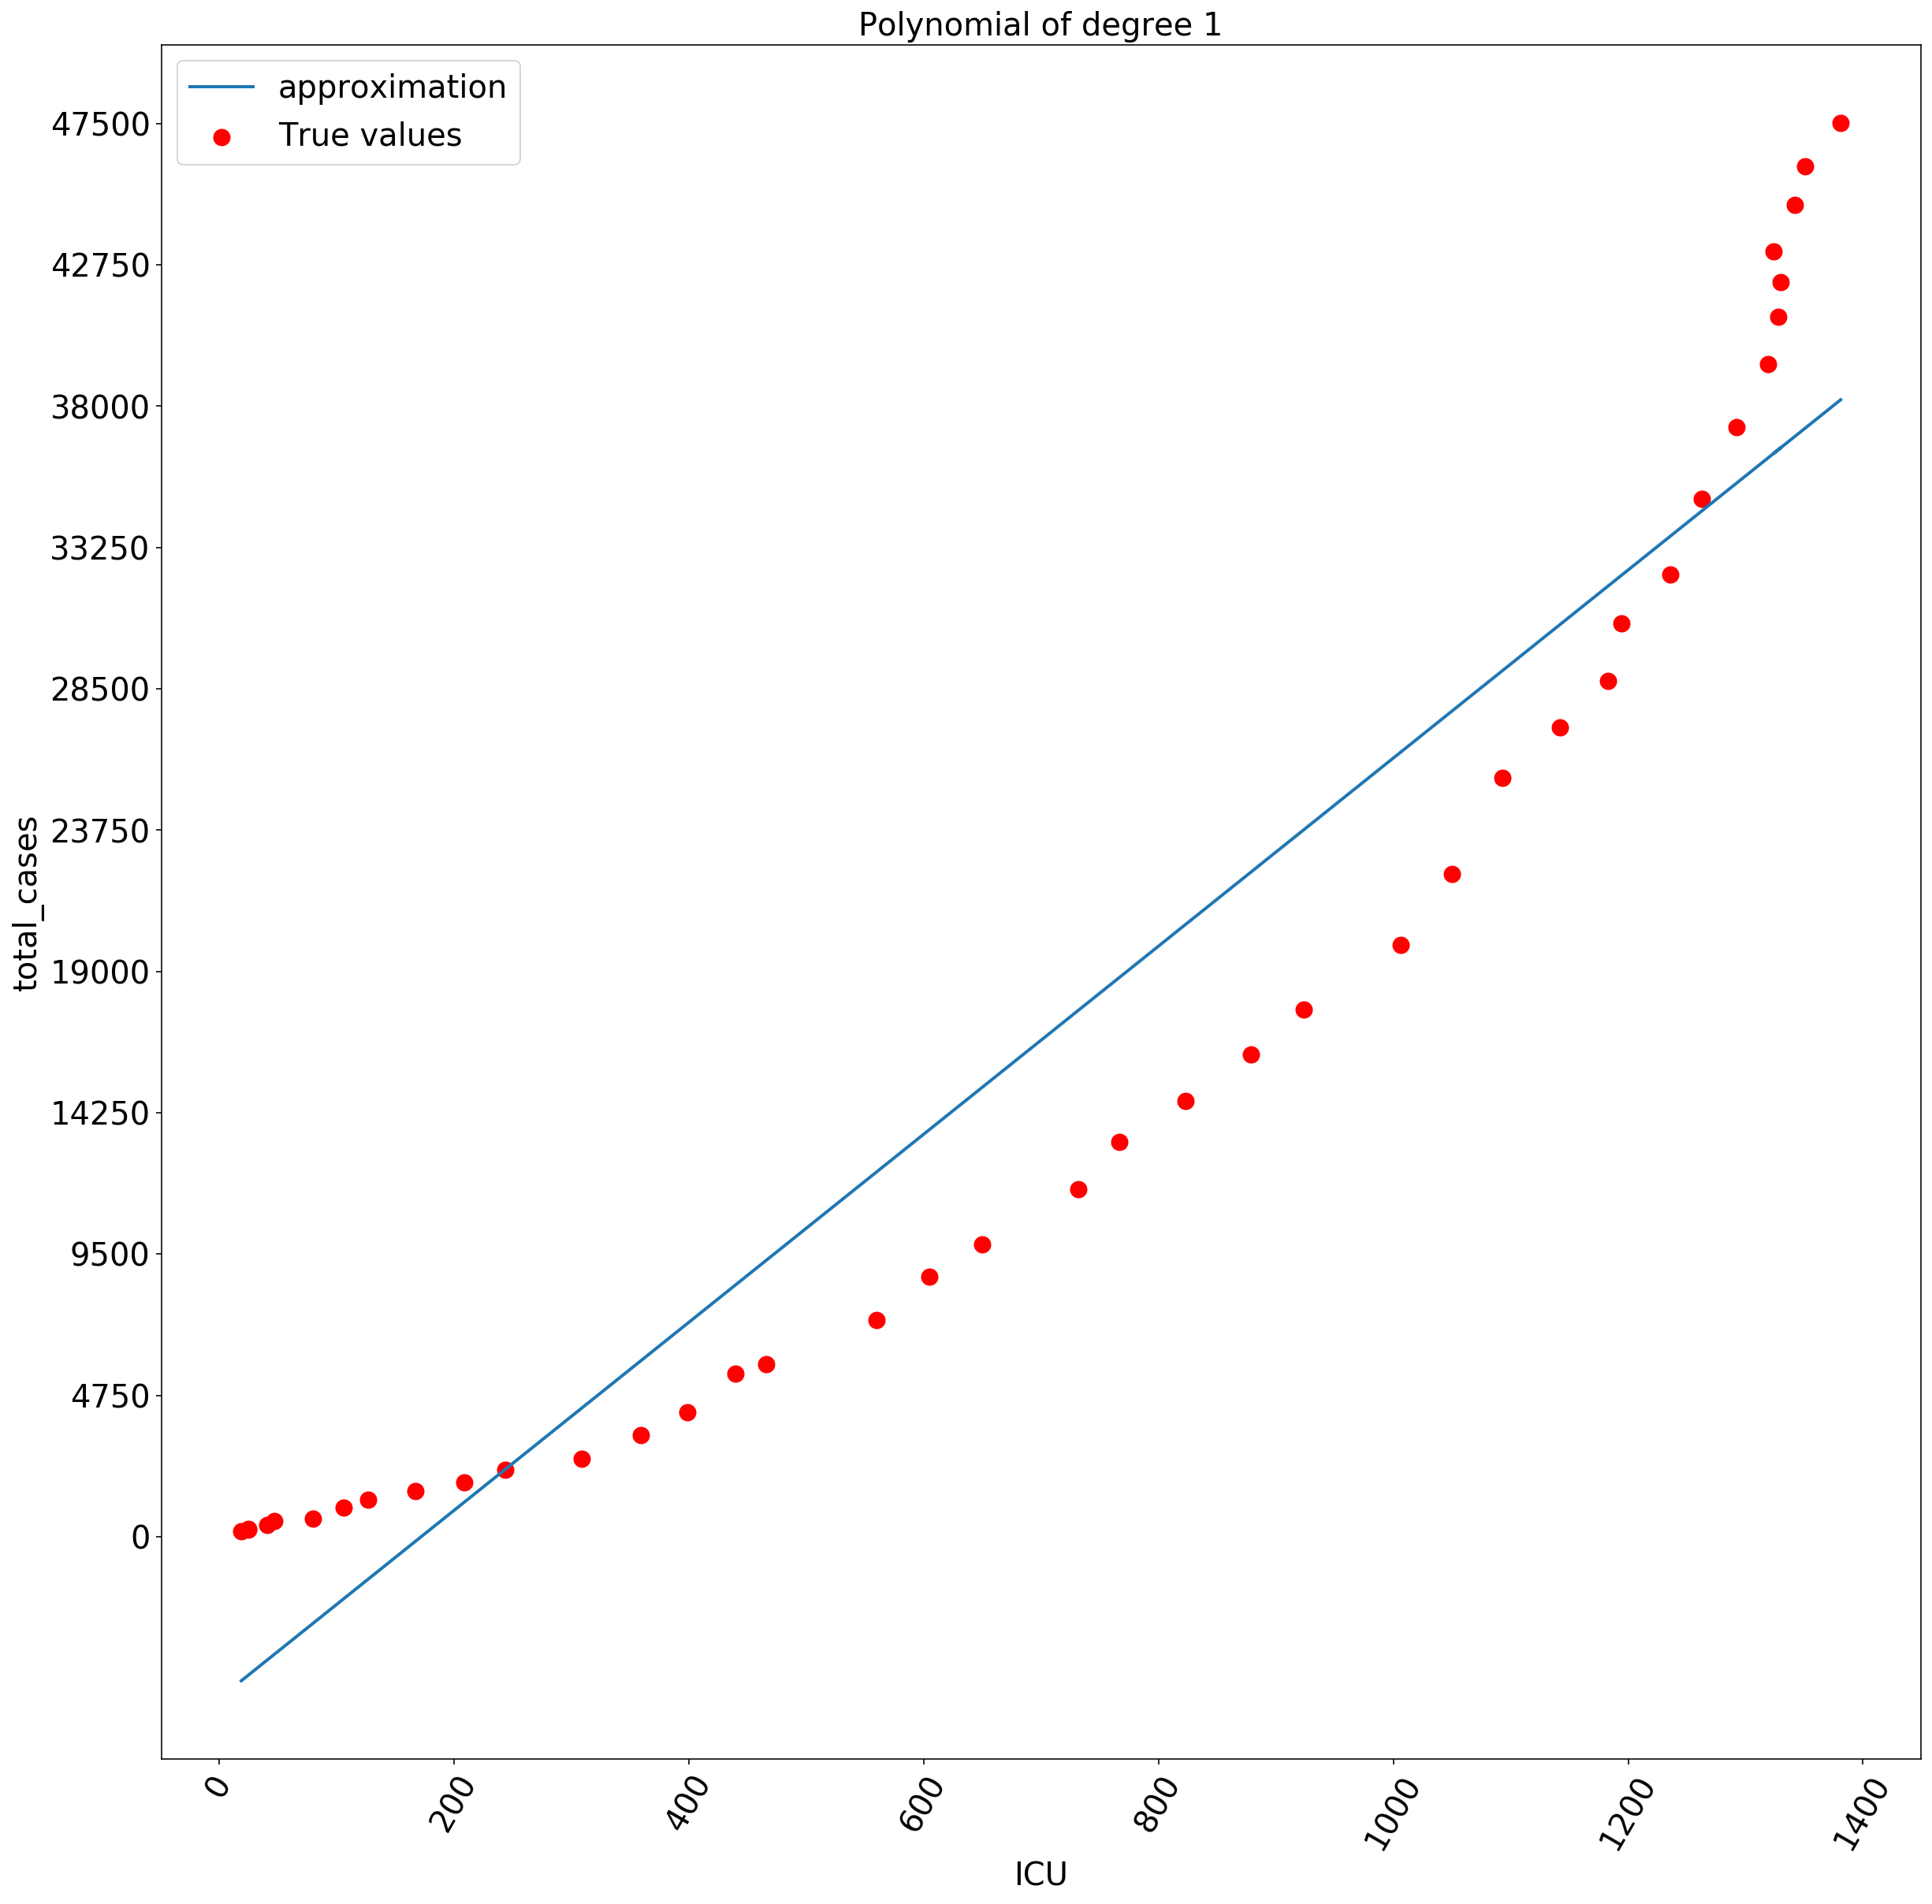

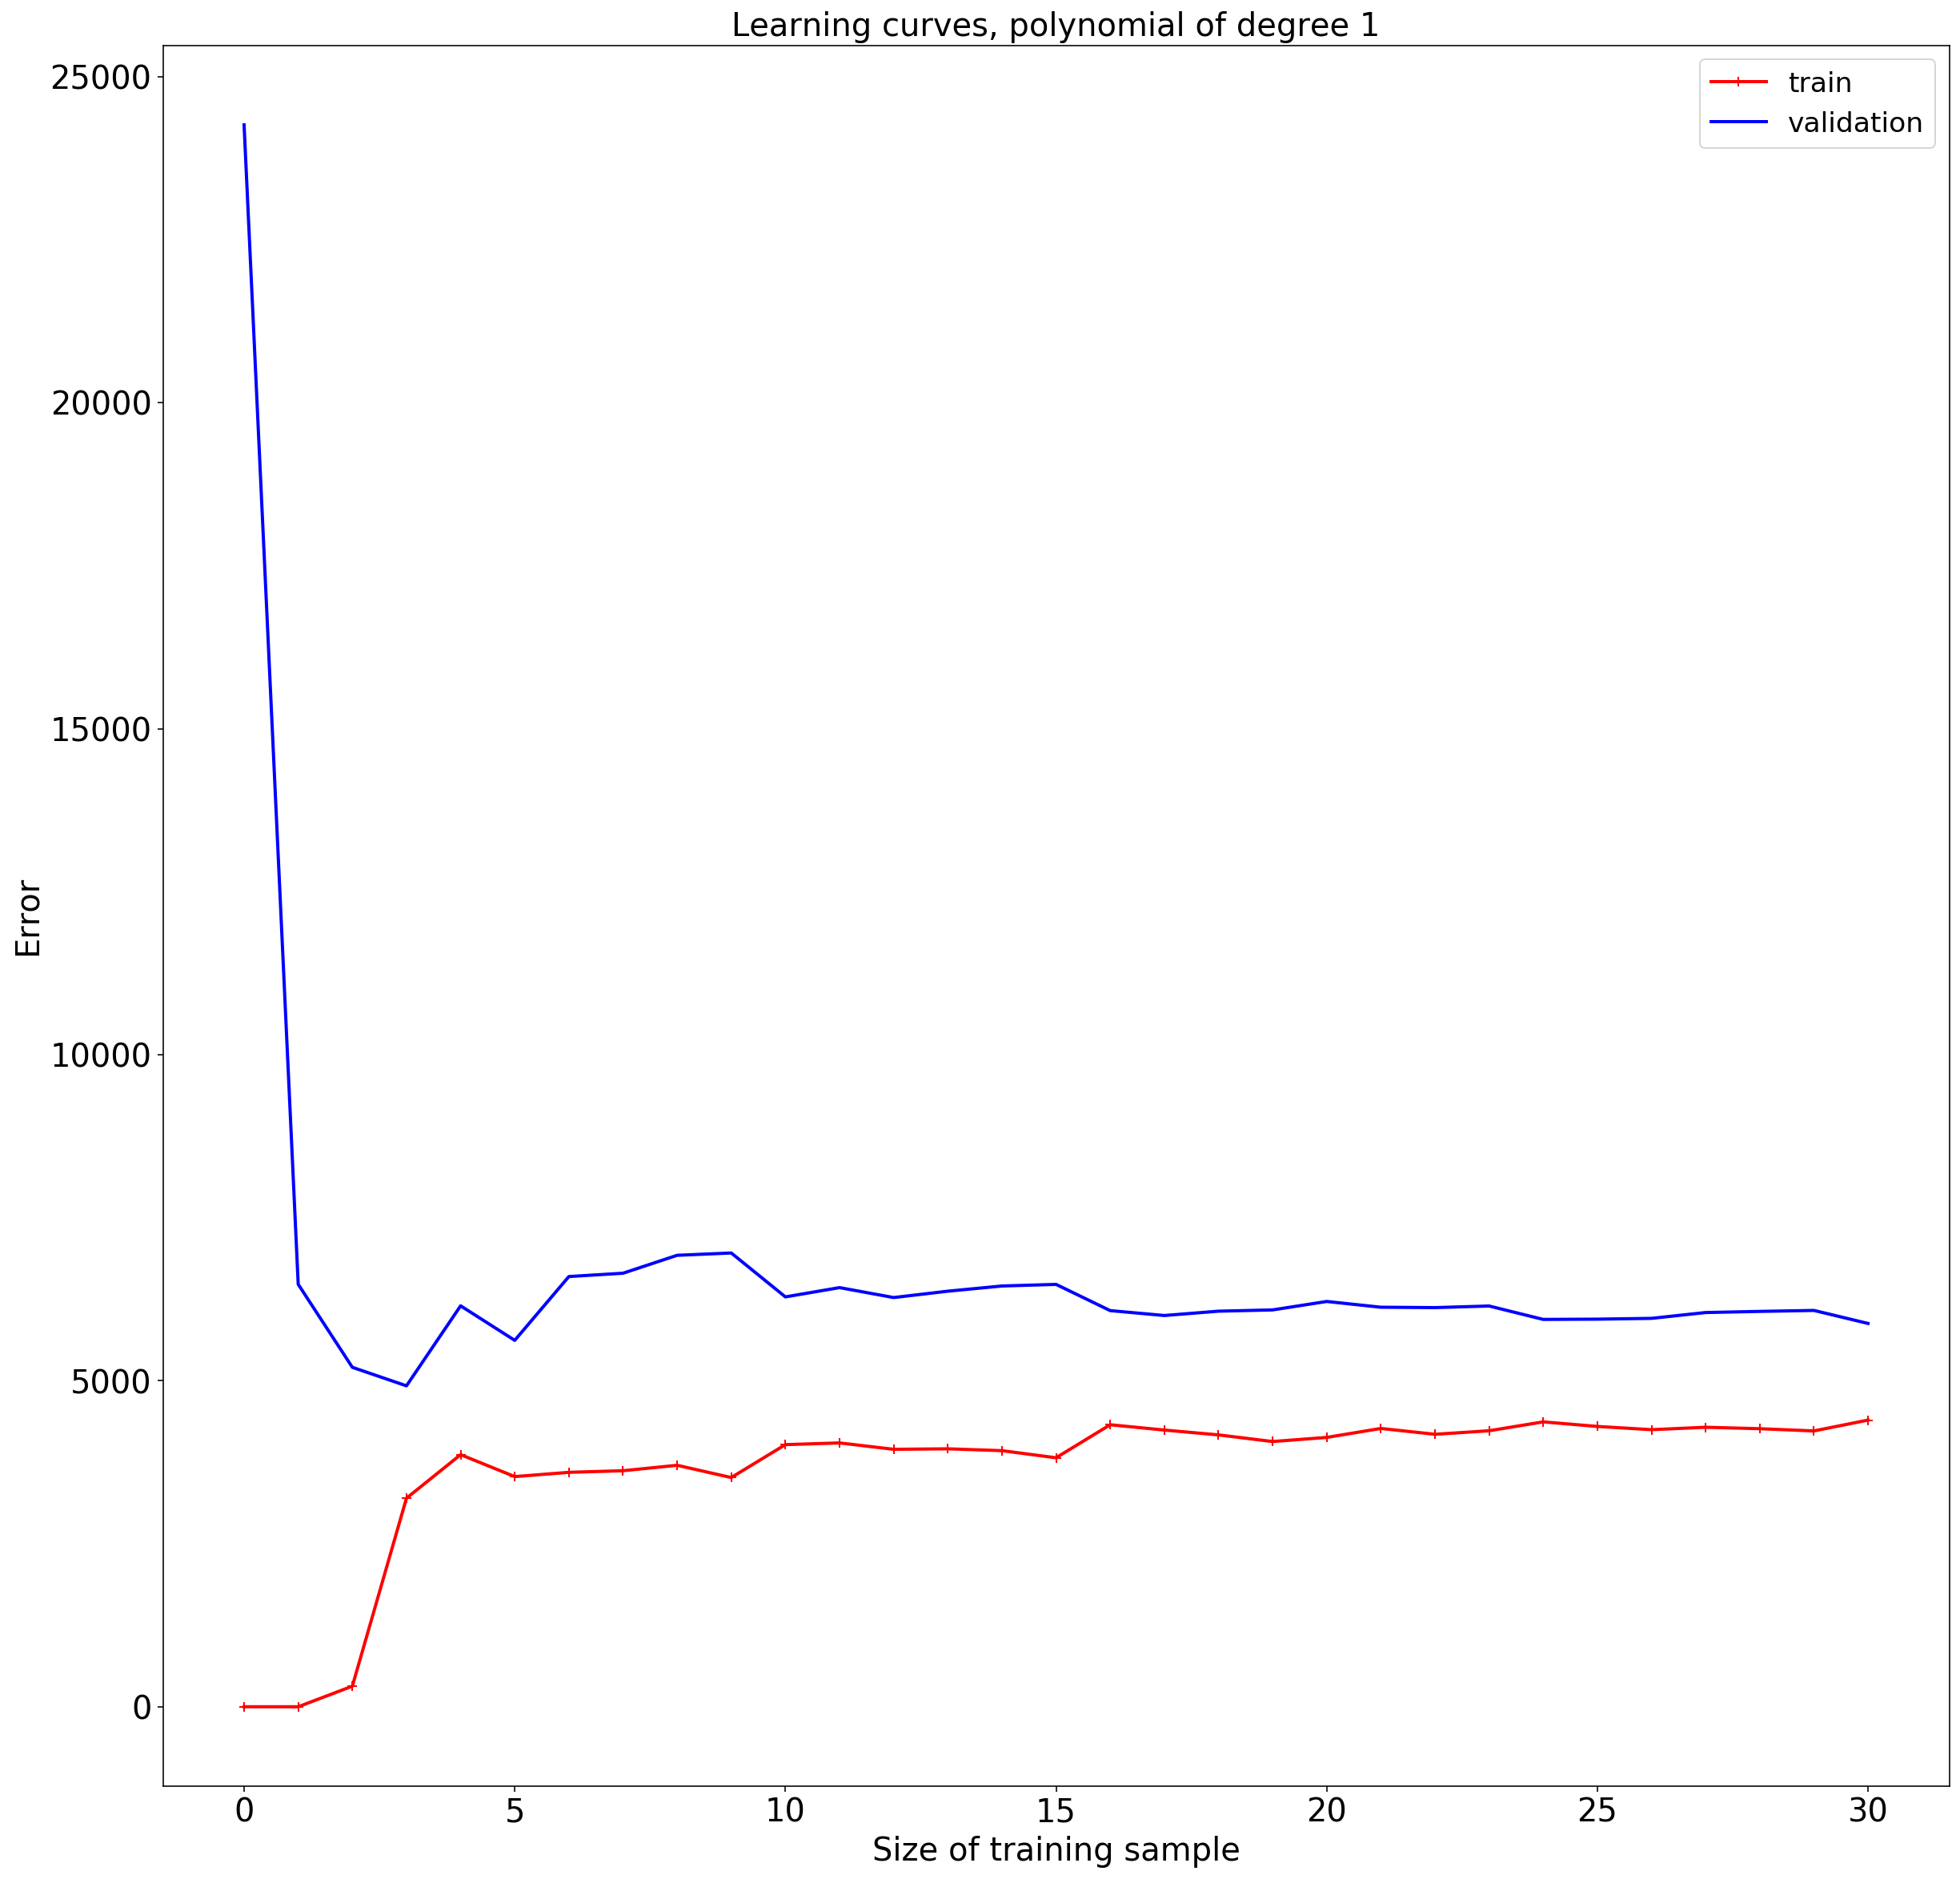

<Figure size 432x288 with 0 Axes>

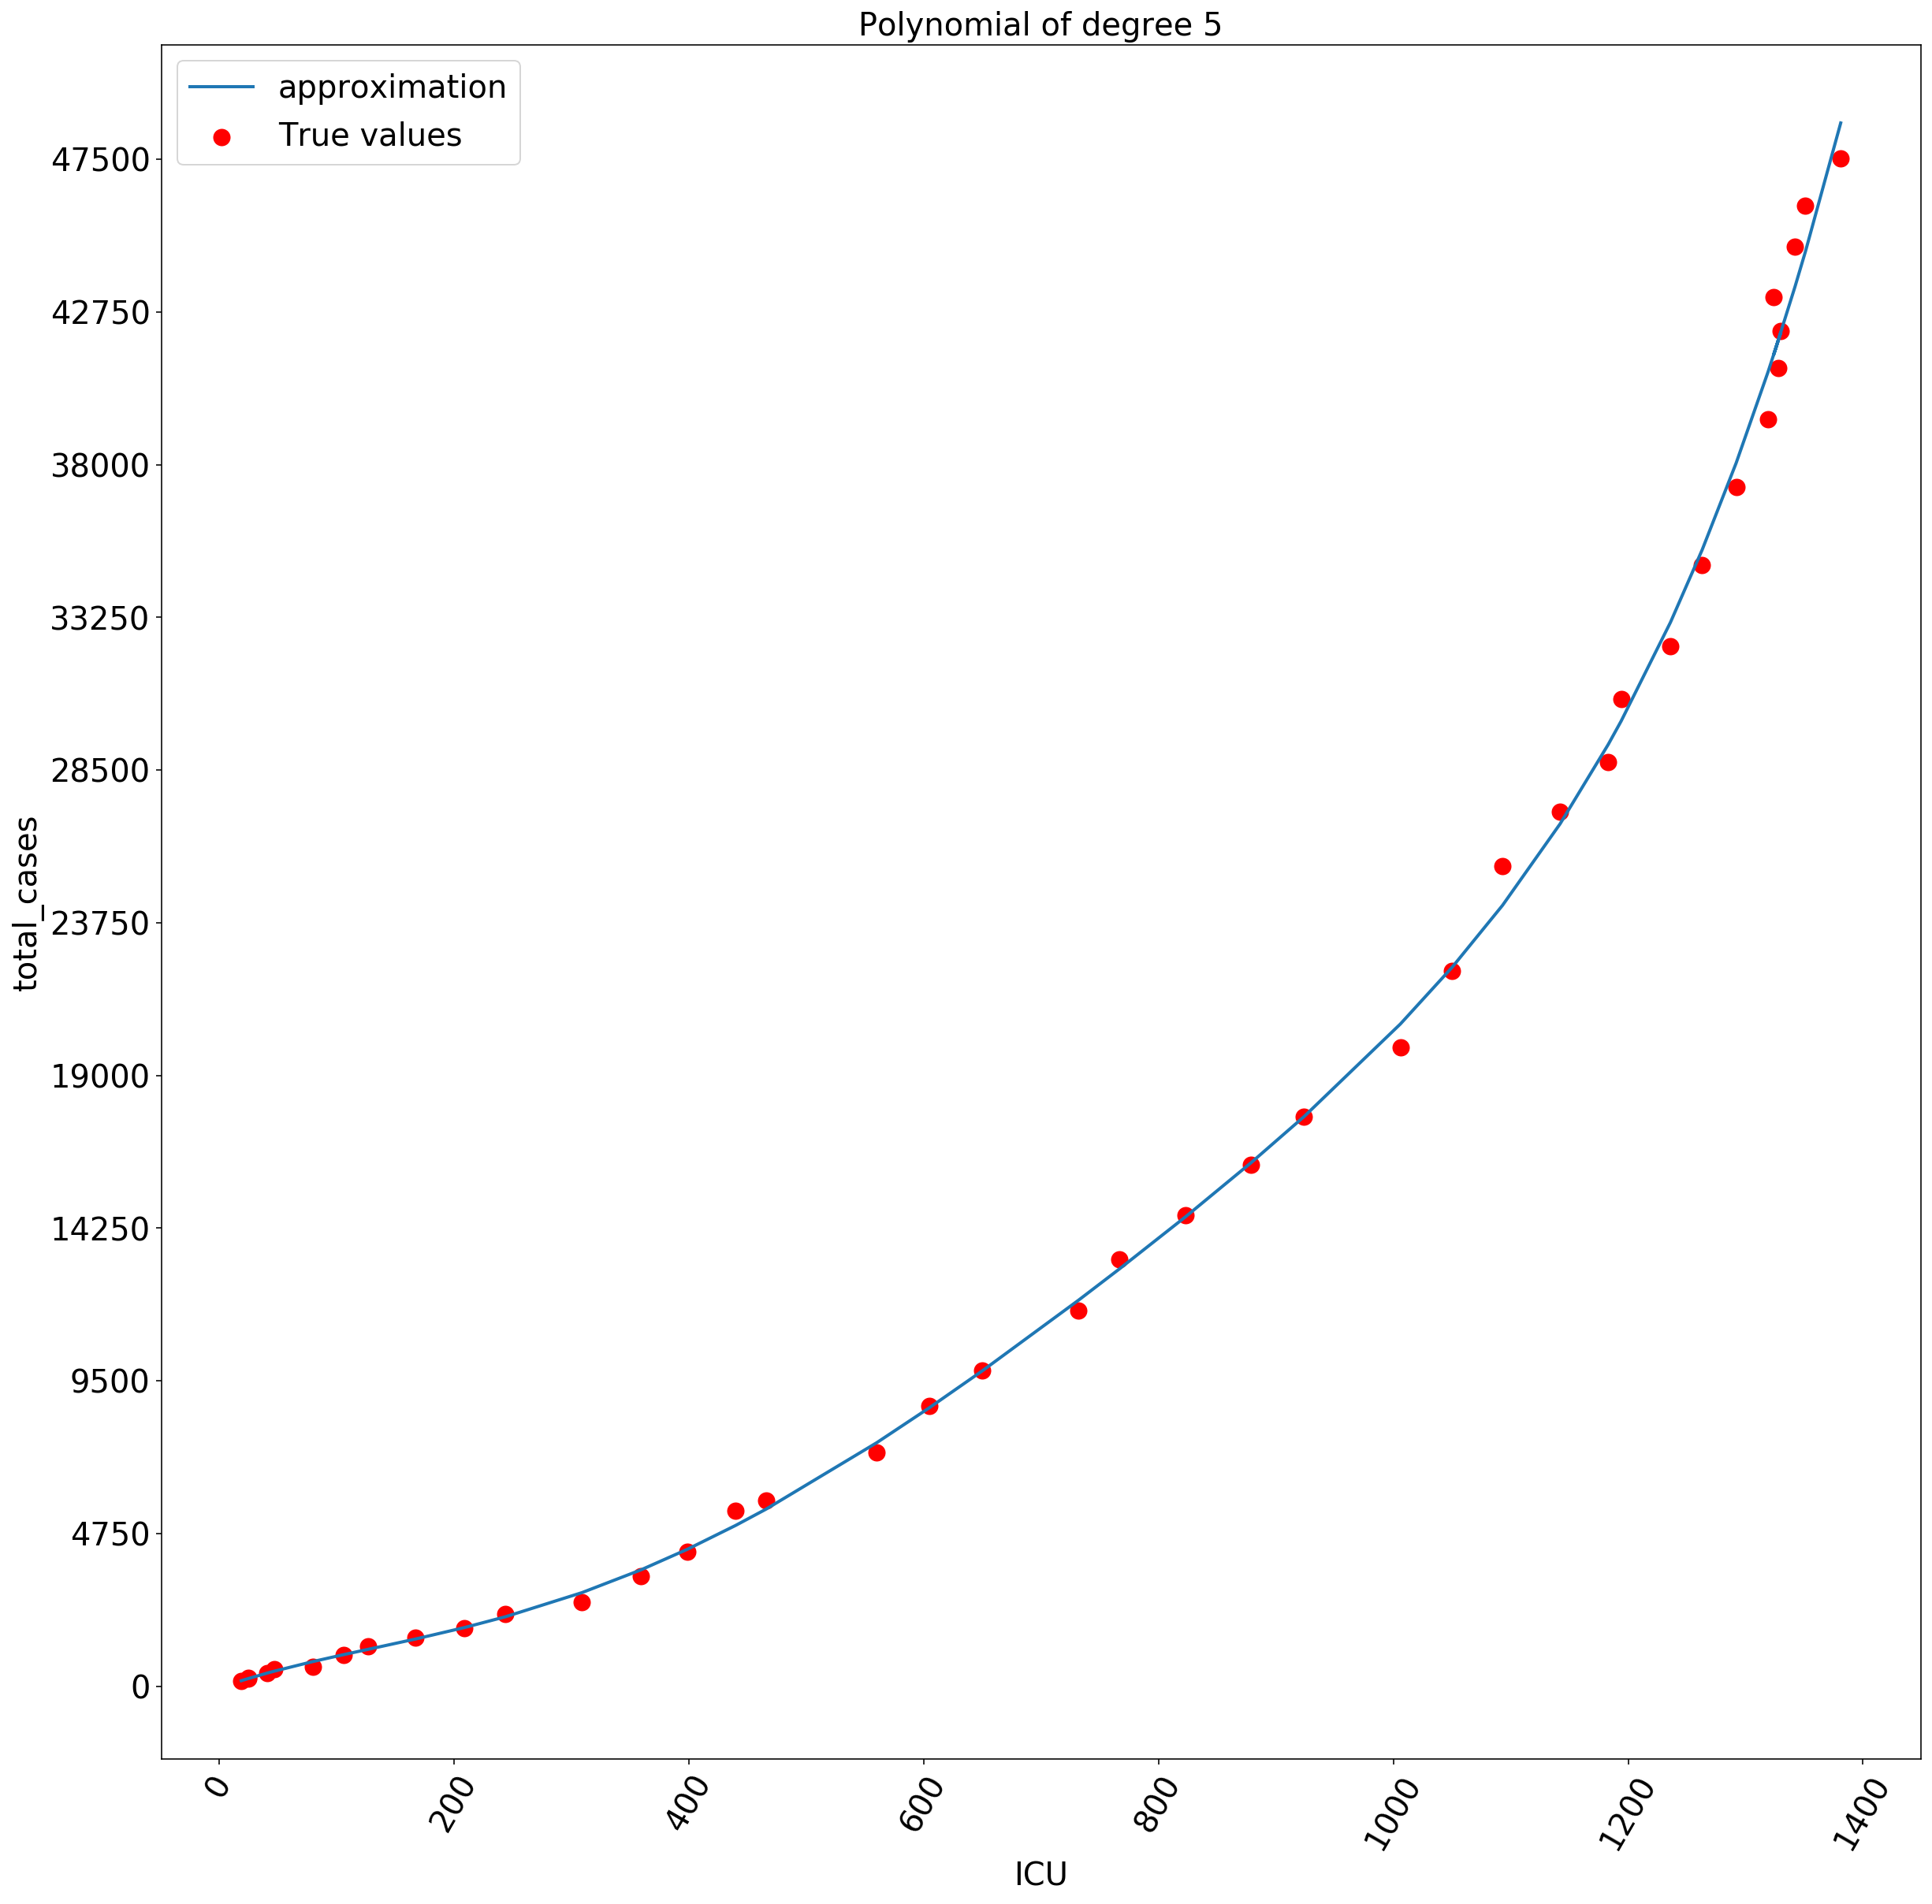

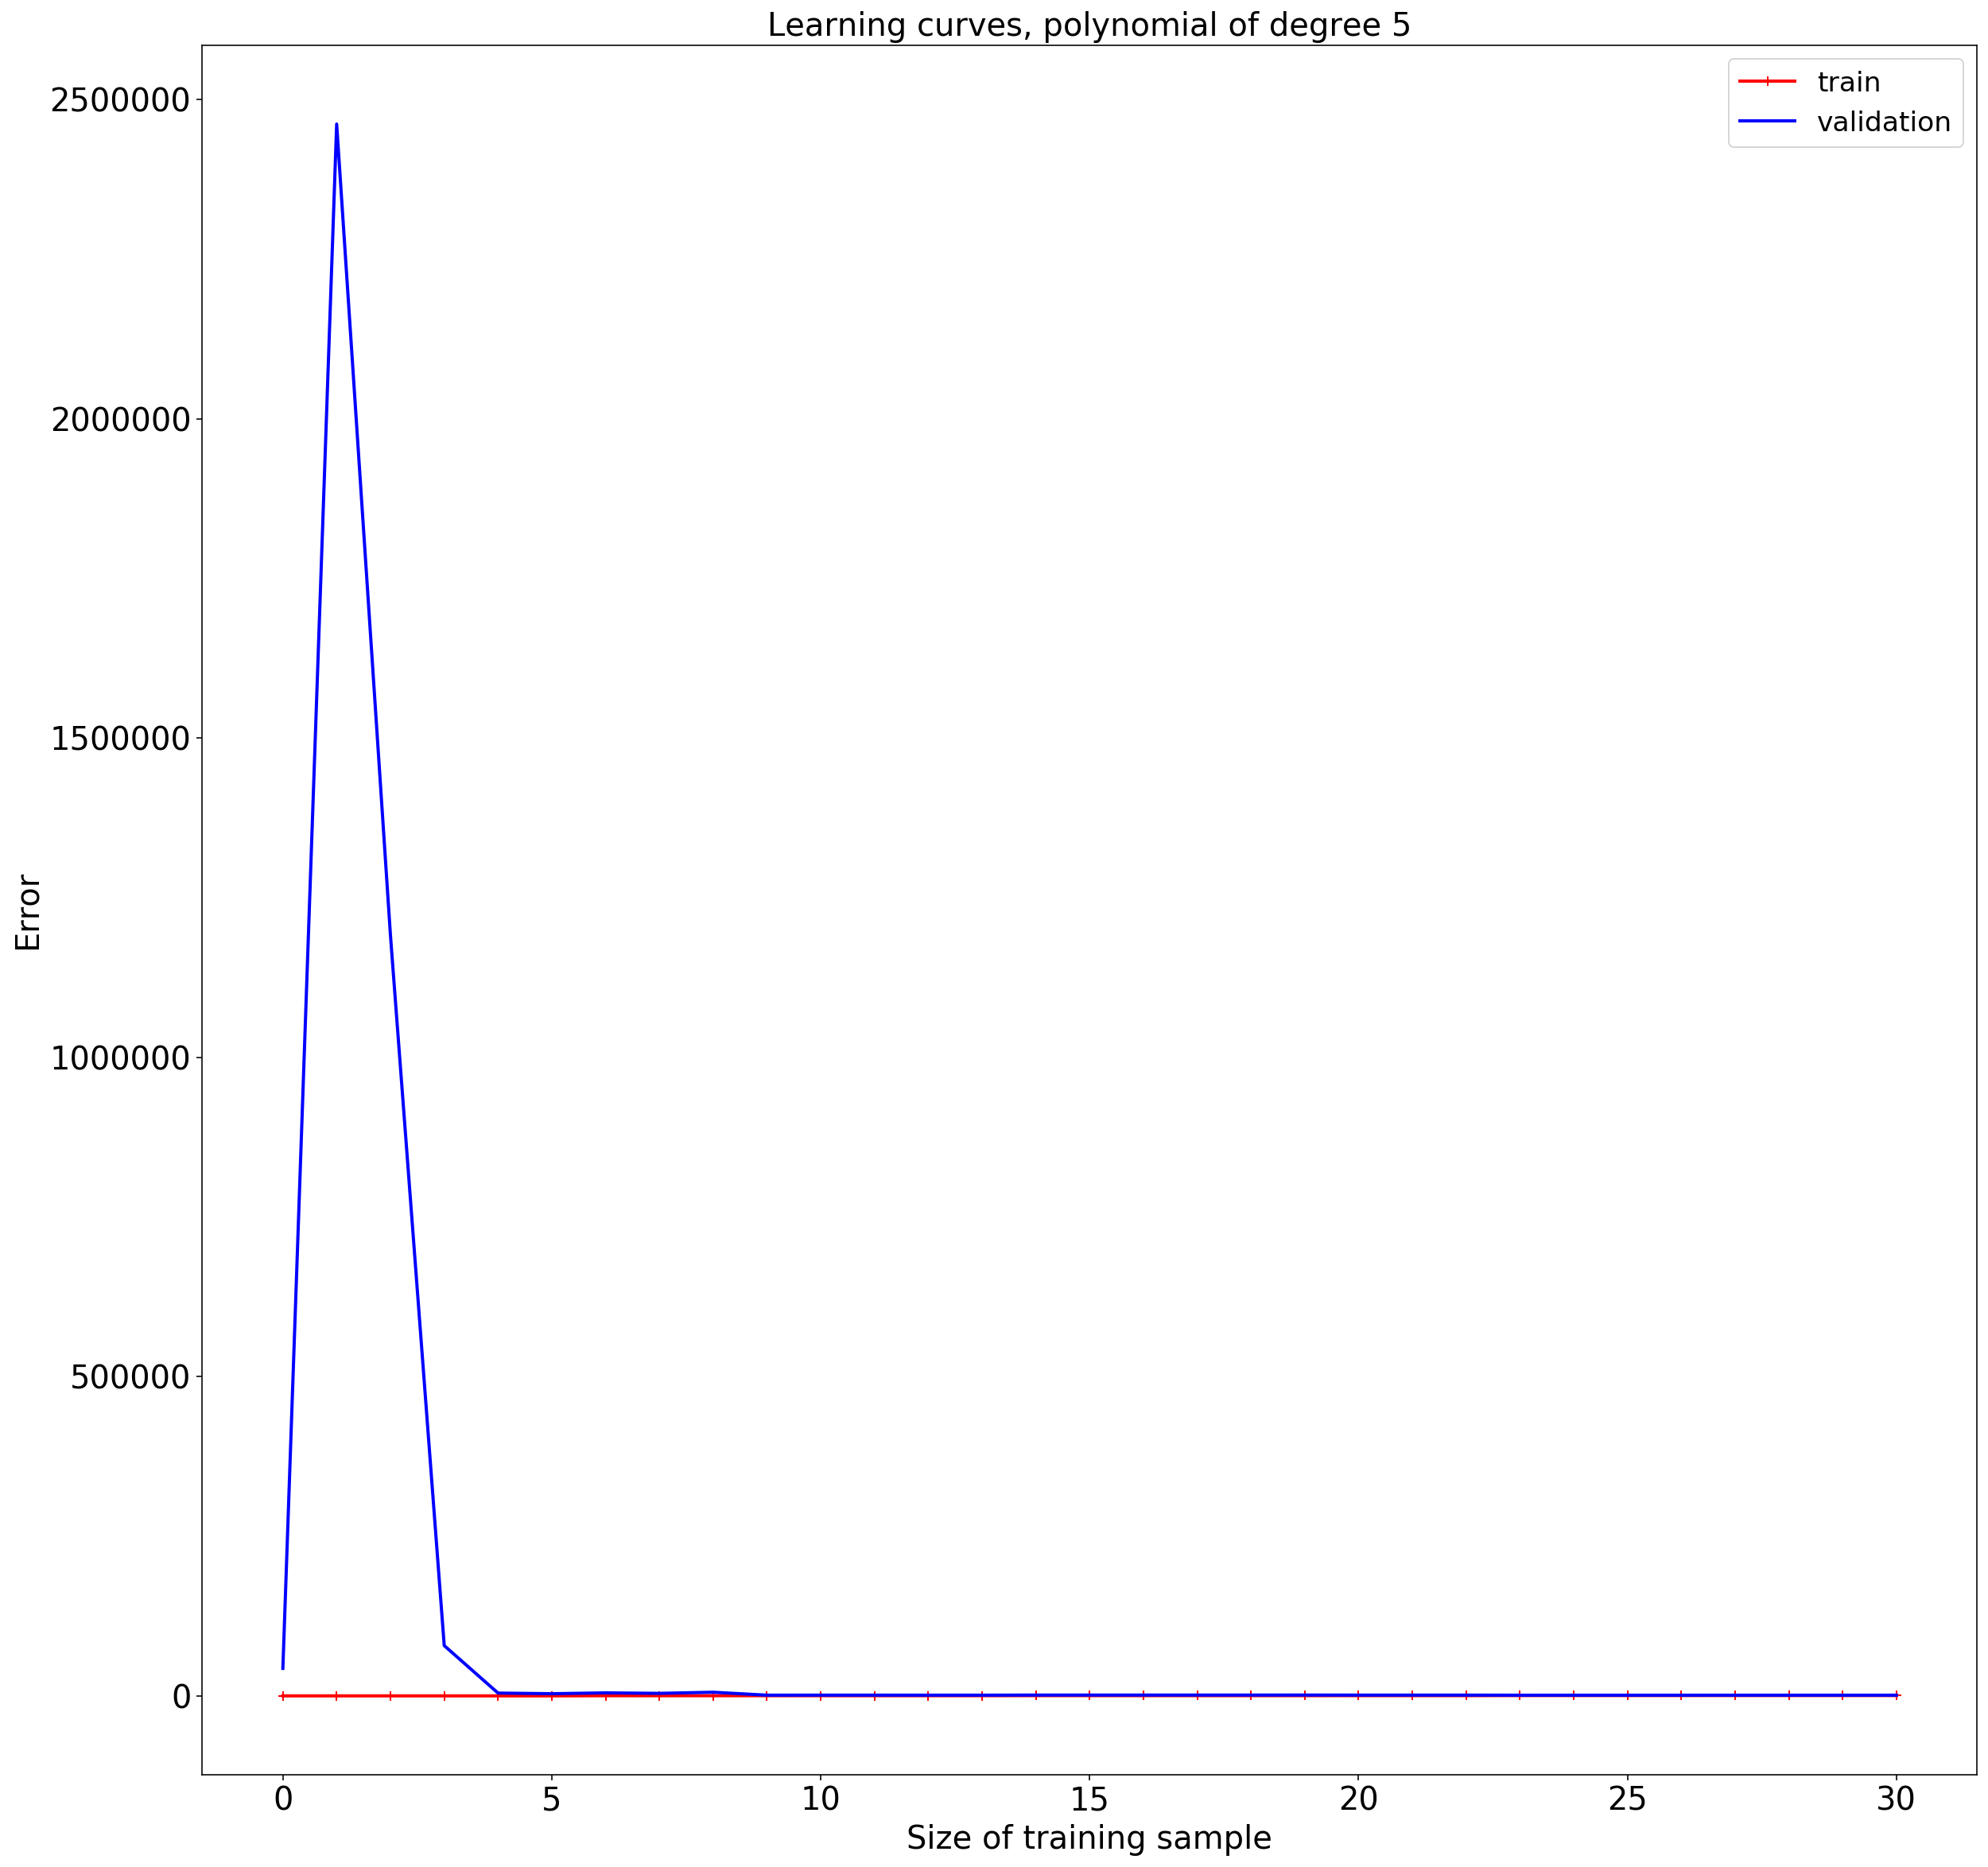

<Figure size 432x288 with 0 Axes>

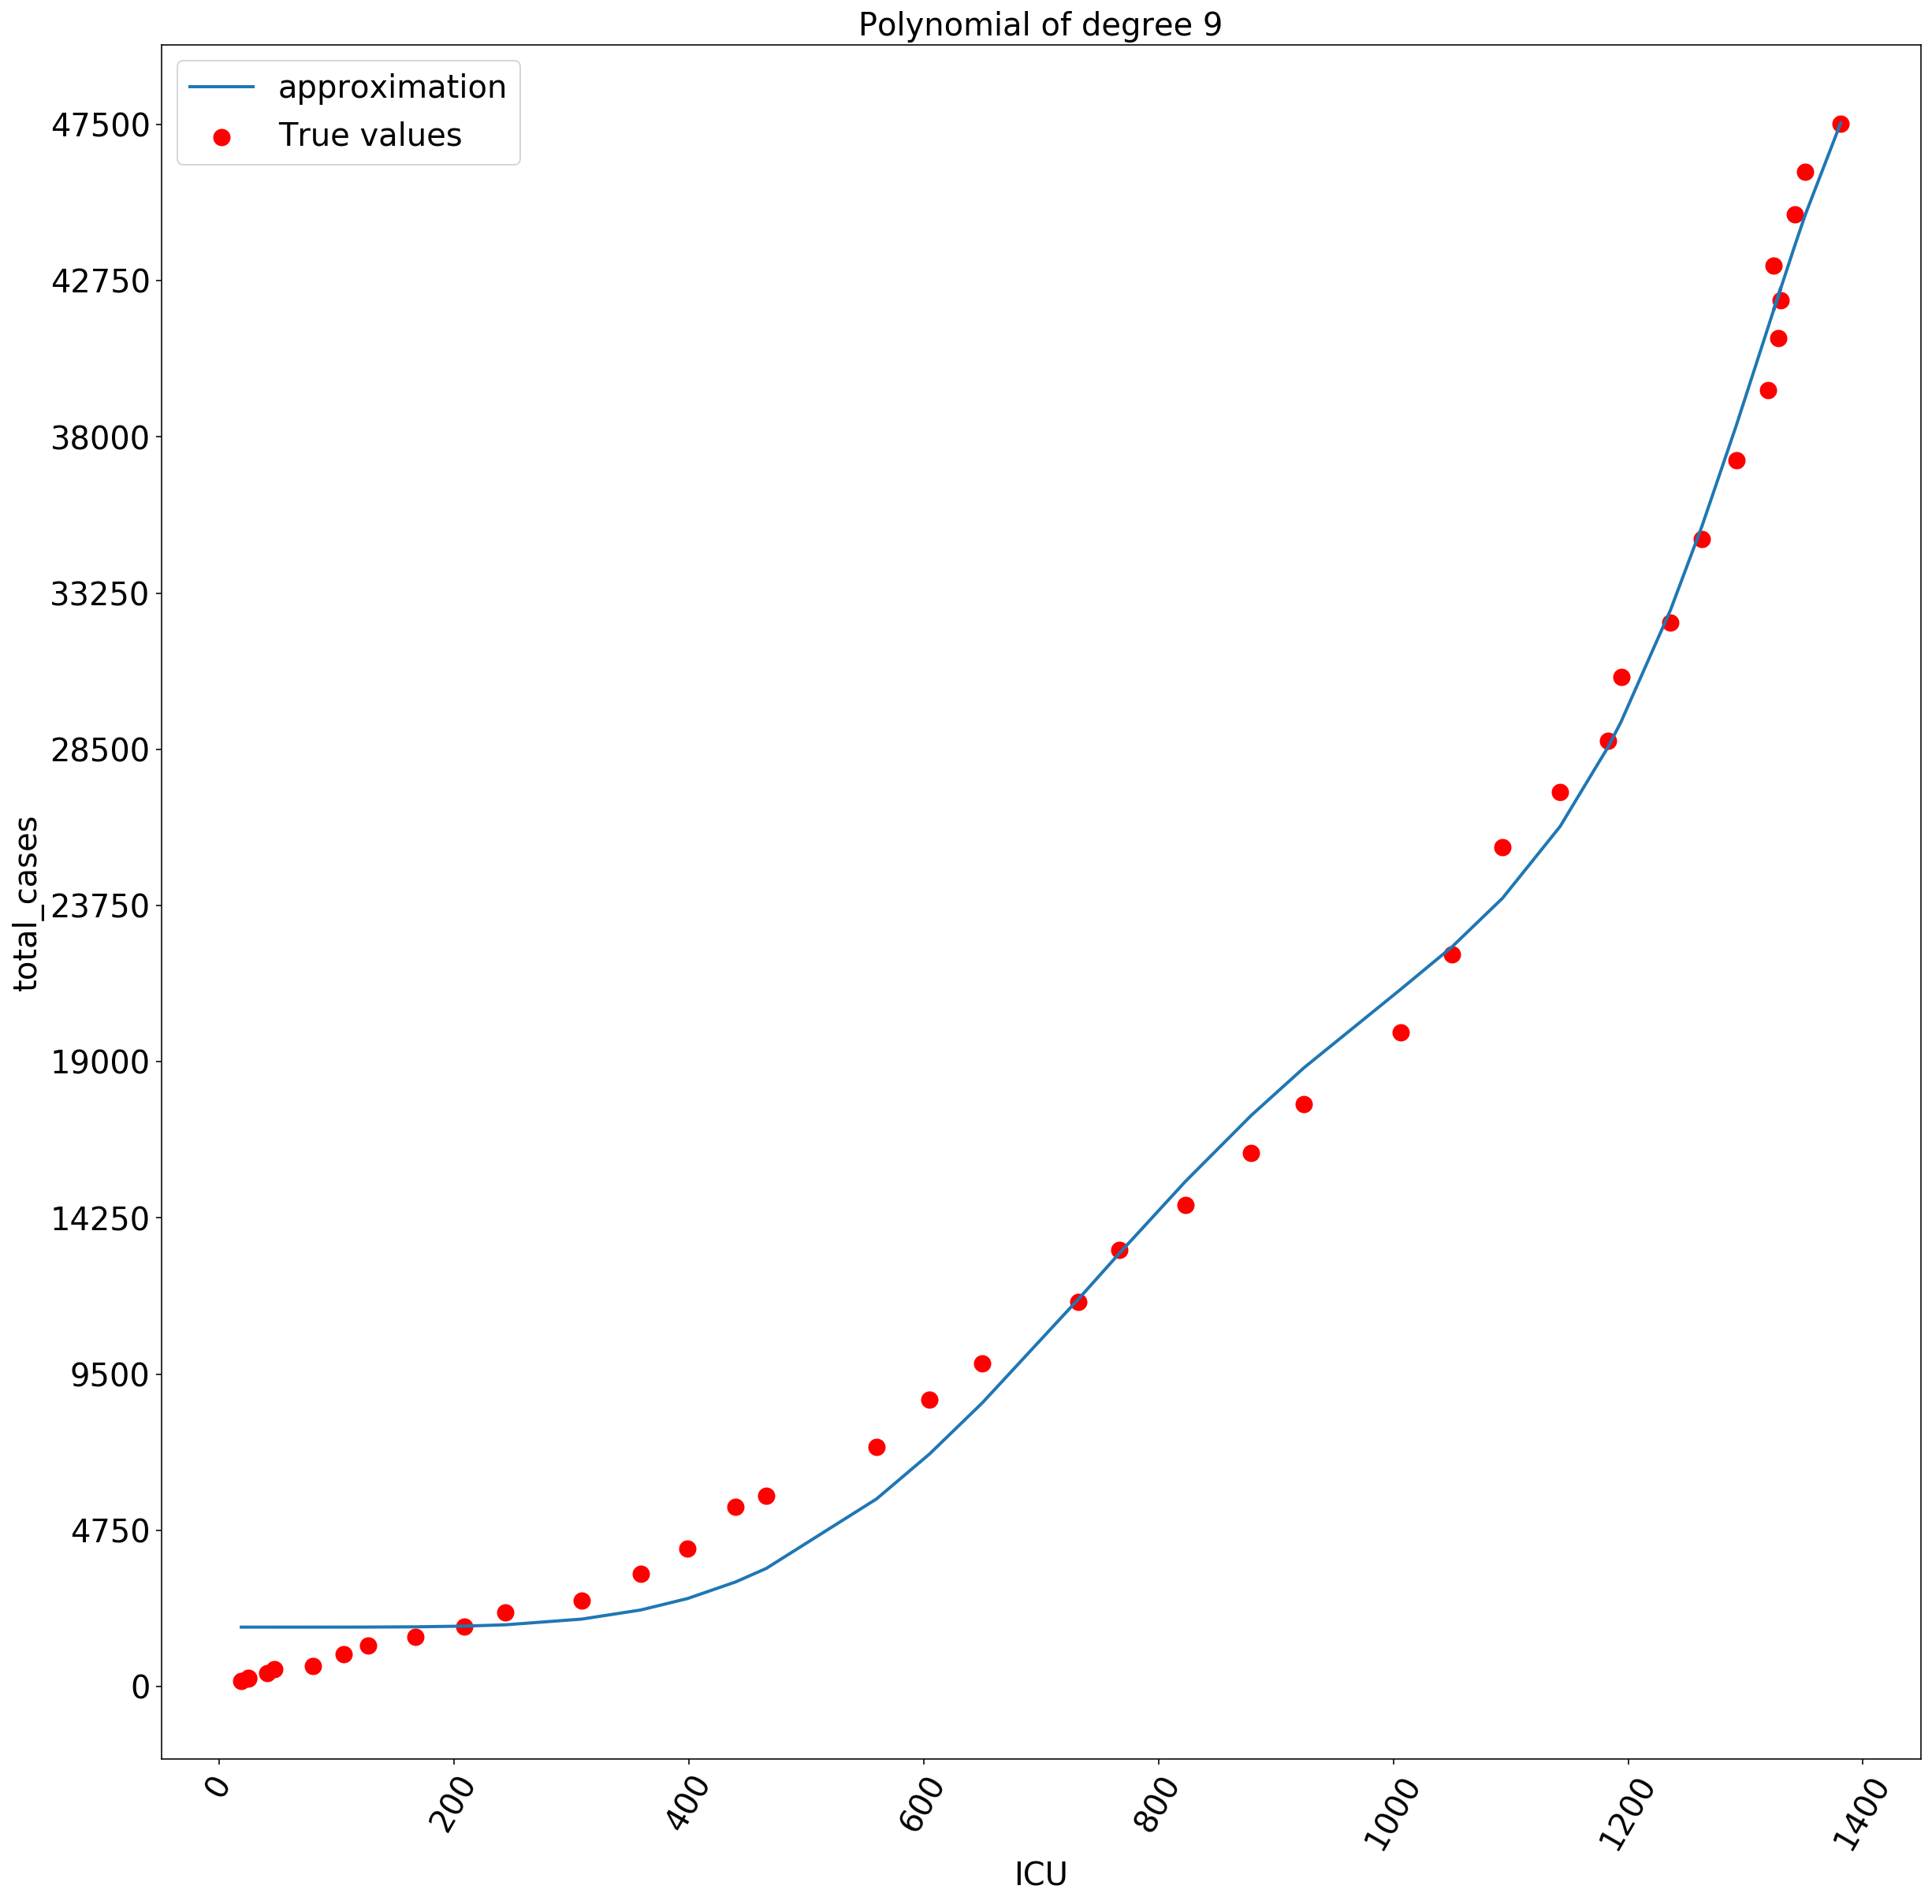

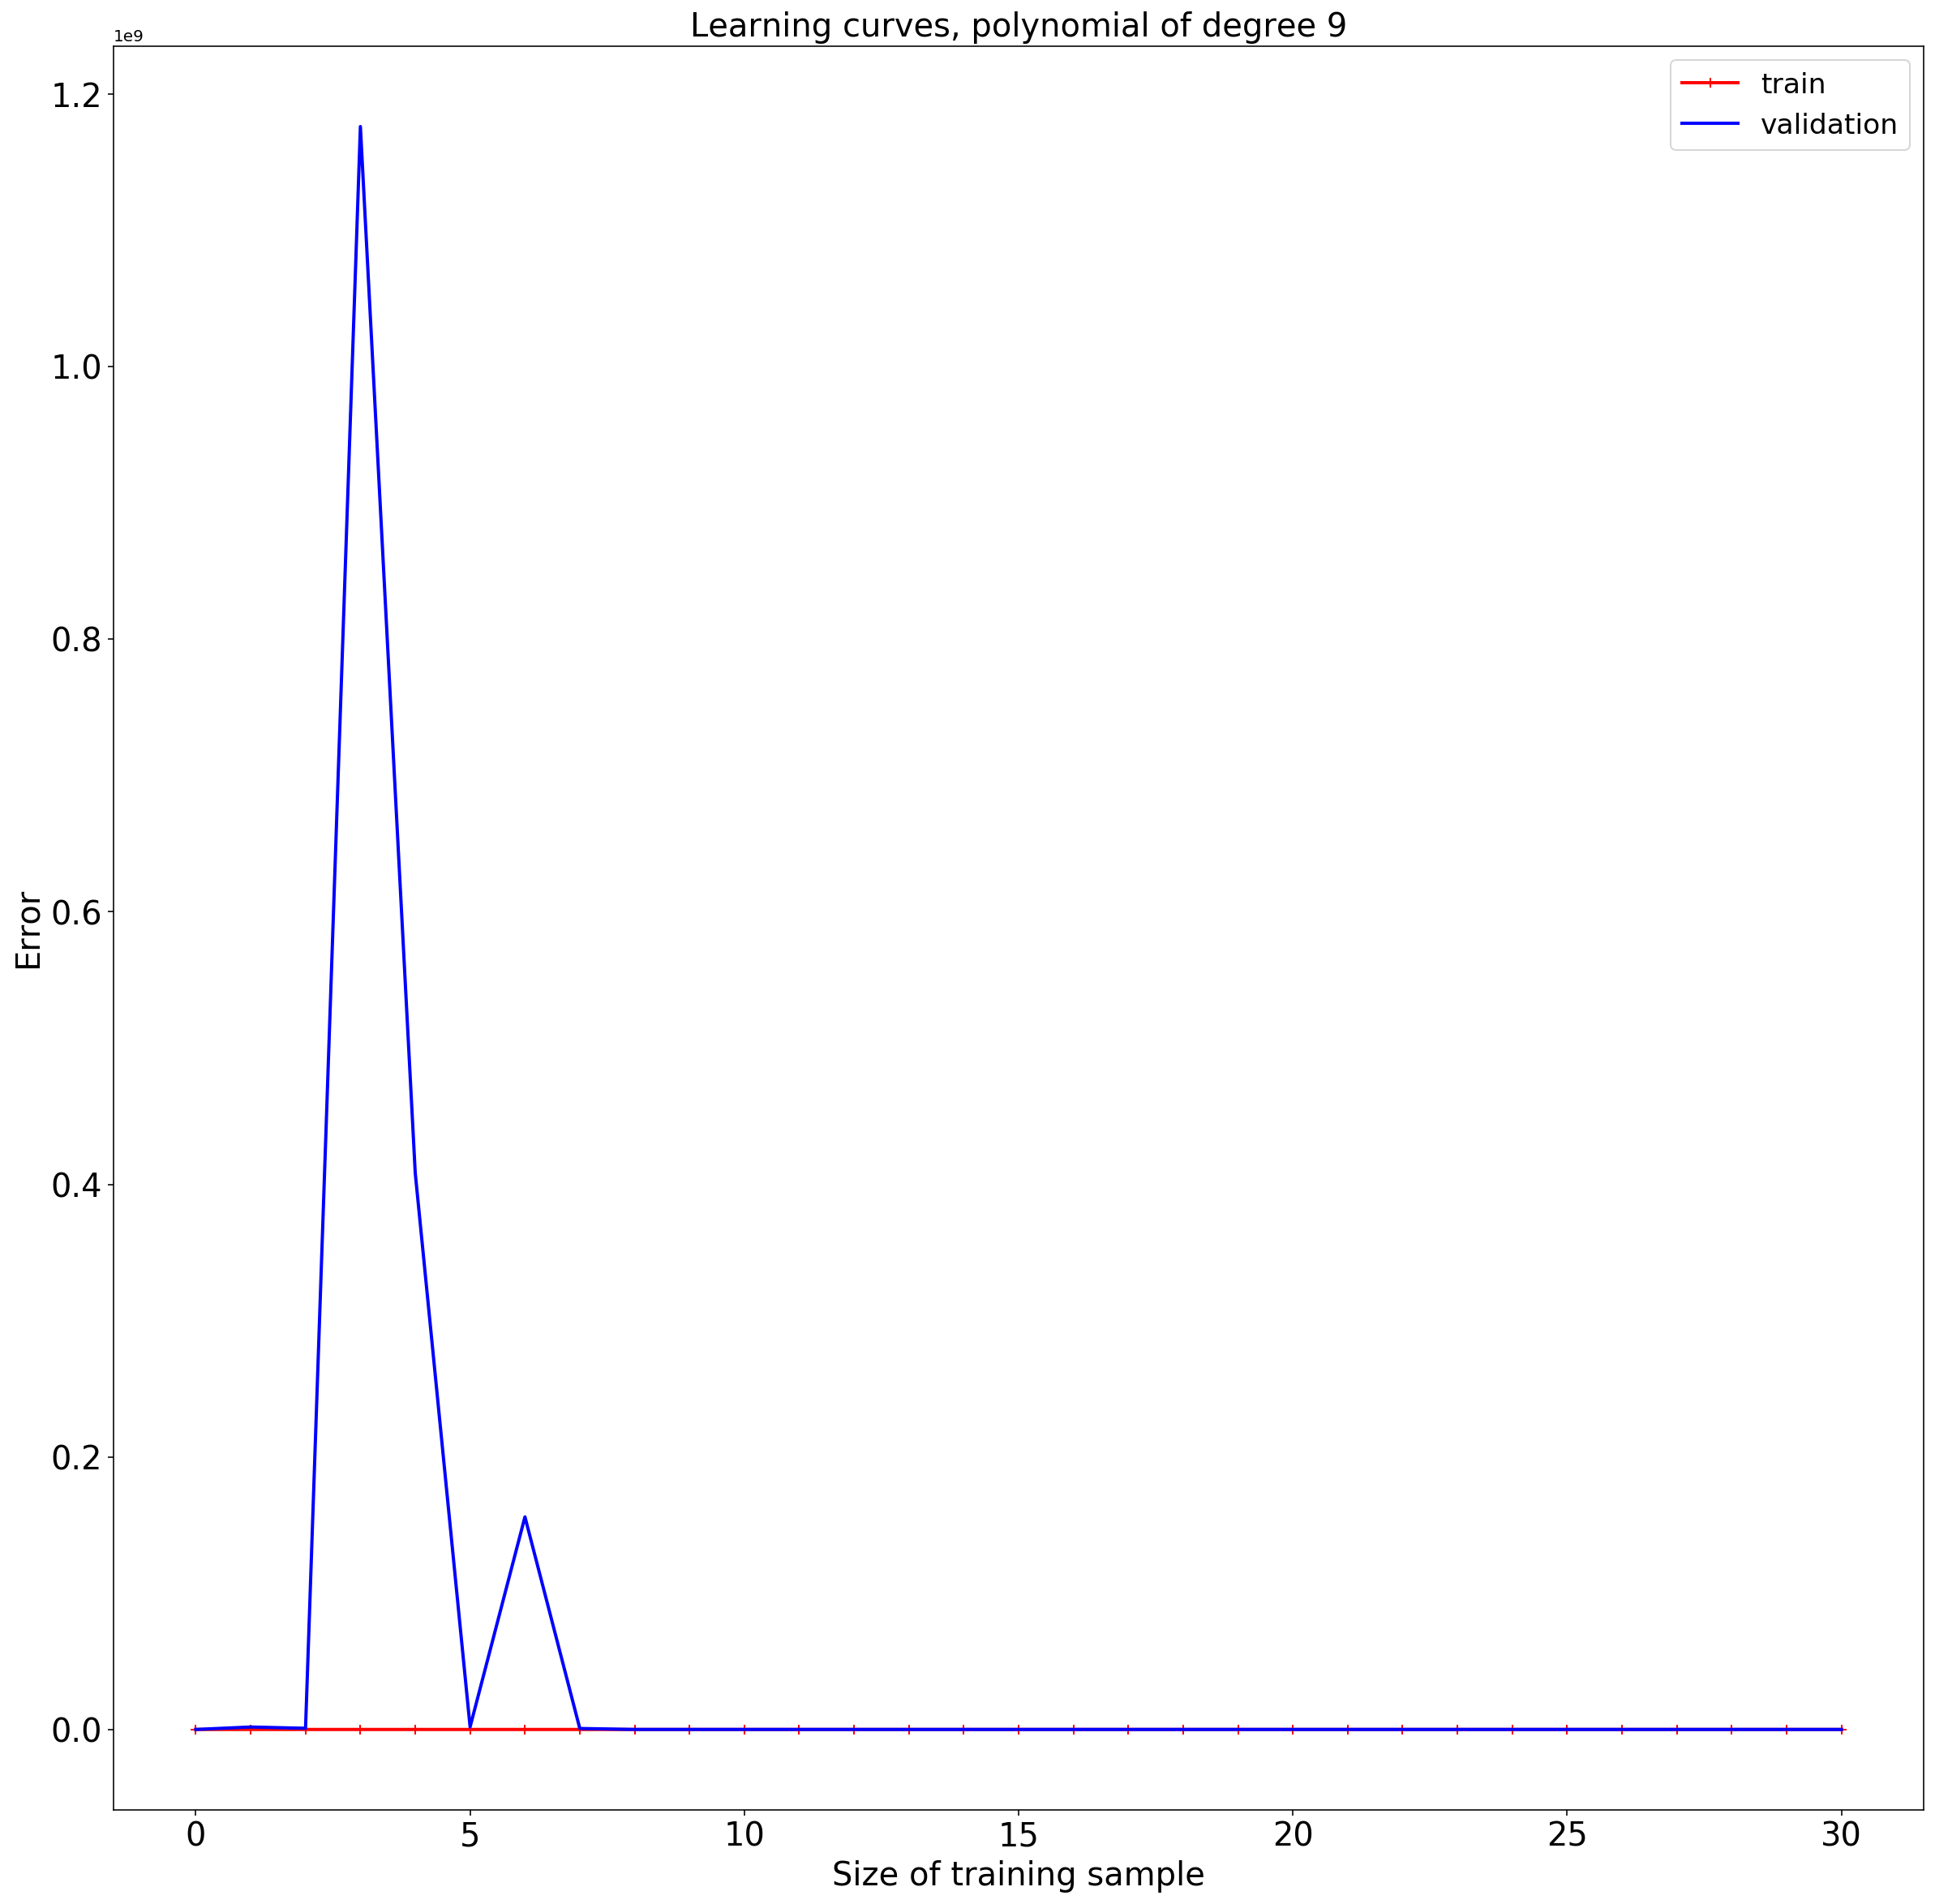

In [32]:
#Non-prone to errors version: X and y are returned by plot_approx
#New feature: explicitly says which is the best degree

#Ho anche disattivato il fatto che dicesse gli errori, ma son gusti
#Quasi quasi plotterei solo quello col degree migliore

#Dobbiamo scegliere l'esempio da tenere


def find_best_poly(regione_name, feat_X, feat_y): 
    regione=get_region(regione_name,regions)
    train_err_list=[]
    val_err_list=[]
    for i in range(1,10):
        pol_reg=Pipeline([('p',PolynomialFeatures(degree=i,include_bias=False)),('lr',LinearRegression())])
        if i==1 or i==5 or i==9:
            plt.figure()
            X,y=plot_approx(regione,feat_X,feat_y,degree=i,  size=(20,20))
            plt.title(f'Polynomial of degree {i}', size=20)
            tr,val = plot_learning_curves(pol_reg,X,y, size=(20,20),verbose=False)
            plt.title(f'Learning curves, polynomial of degree {i}', size=20)
        else:
            X,y=plot_approx(regione,feat_X,feat_y,degree=i,  size=(20,20),plot=False)
            tr, val = plot_learning_curves(pol_reg,X,y, size=(20,20), plot=False,verbose=False)
        train_err_list.append(tr)
        val_err_list.append(val)
    
    min_train=min(train_err_list)
    min_val=min(val_err_list)
    print('The least training error is: ',min_train, " and was obtained with a polymonial of degree", train_err_list.index(min_train))
    print('The least validation error is: ',min_val, " and was obtained with a polymonial of degree", val_err_list.index(min_val))
        
find_best_poly("Lombardia", 'ICU','total_cases')



the following is an attempt to plot the approximation versus reality graph of a some data

<Figure size 432x288 with 0 Axes>

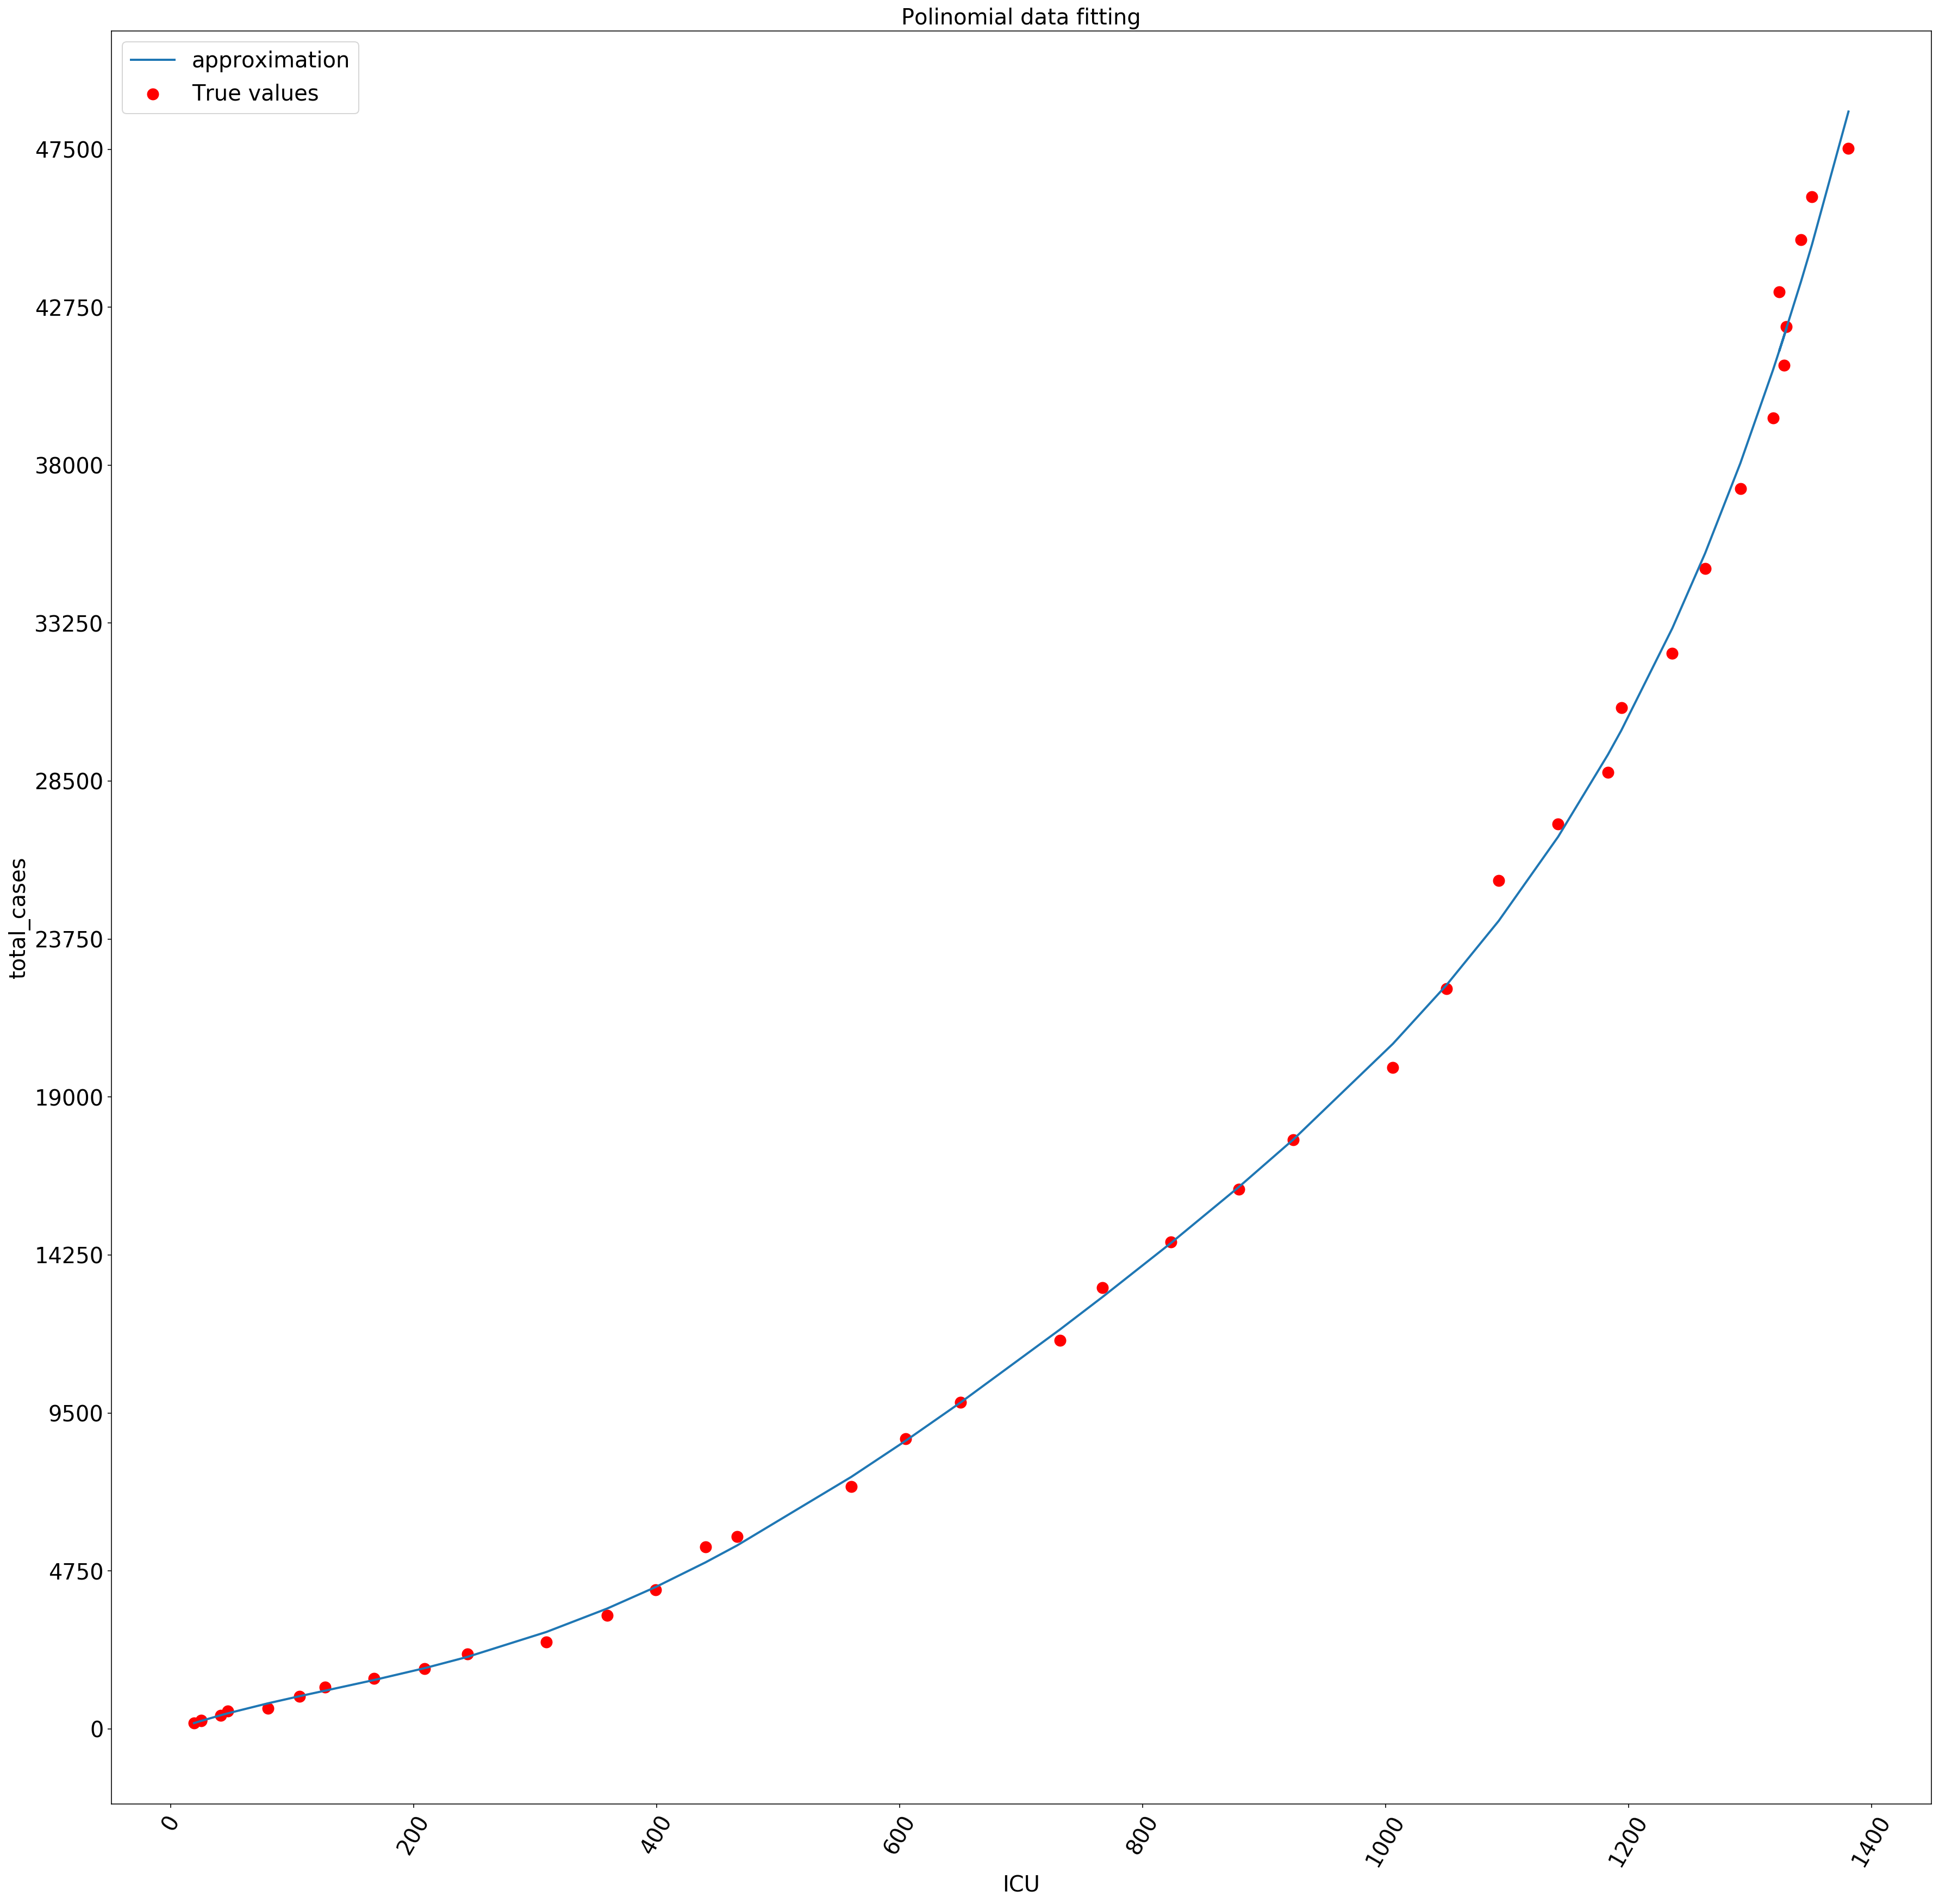

In [33]:
X,y=plot_approx(Lom,'ICU','total_cases',degree=5)

# Approximating total_positives al over the country

Function to smooth data as mean of the neighbors

In [172]:
def smooth(arr):
    a=np.array([0 for i in range(len(pos))])
    for i in range(len(a)):
        if i==0:
            a[i]=(arr[i]+arr[i+1])/2
        if i==len(arr)-1:
            a[i]=(arr[i]+arr[i-1])/2
        elif (i!=0 and i!=len(arr)-1):
            a[i]=(arr[i]+arr[i+1]+arr[i-1])/3
    return a

attempt to minimize with a logistic function (to clean and write formula)

In [229]:
#Ancora una volta, ho sdoppiato e provato con la Lombardia e i nuovi casi ma scarsi risultati
from scipy.optimize import curve_fit
import warnings
lom=get_region('Lombardia')
def logistic(x,L,k,x0,d):
    return d+L/(1+np.exp(-k*(x-x0)))
def logistic2(x,L,k,d):
    return np.log(d+L/(1+np.exp(-k*(x-np.median(x)))))

X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['new_positive'].to_numpy()[i] for i in range(len(country['new_positive']))],dtype=float)
y=smooth(yr)
init_vals=[max(y),np.median(x),1,np.min(x)]
init_vals_2=[max(y),100,np.min(x)]
y_err=np.ones(len(y))
m=np.argmax(yr)
y_err[m]=0.01

#y2=logisti
#init_vals2=[np.max(y),np.median(x),4]                                                      #try changng the power/y_err
best_vals,covar=curve_fit(logistic,xdata=x.flatten(),ydata=y.flatten(),p0=init_vals,sigma=1/y.flatten()**0.2)
#best_vals,covar=curve_fit(gaussian,xdata=x.flatten(),ydata=y.flatten(),p0=init_vals2)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


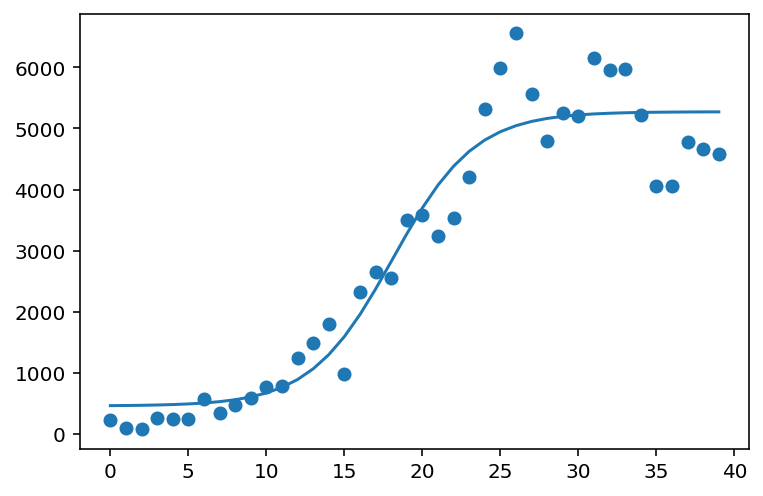

In [230]:
plt.scatter(X,yr)
plt.plot(X,logistic(X,best_vals[0],best_vals[1],best_vals[2],best_vals[3]))

attempt to optimize trough a gompertz function which follows the distribution: 

$$f(x)=ae^{-be^{-cx}}$$

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


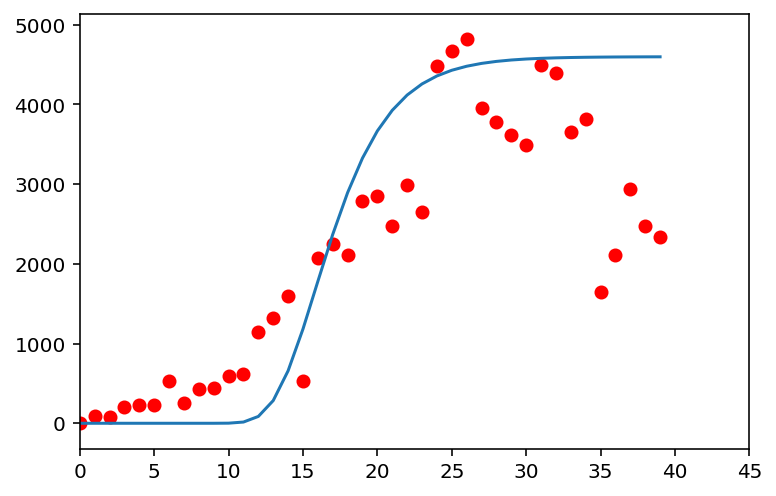

In [228]:
from scipy.optimize import curve_fit
import warnings
#####done with lombardy and its daily increment
#Lom=get_region('Lombardia',regions)
#####DONE WITH COUNTRY DATA
def gompertz(x,a,b,c):
    return a*np.exp(-b*np.exp(-c*x))
X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['variation_total_positive'].to_numpy()[i] for i in range(len(country['variation_total_positive']))],dtype=float)
y=smooth(yr)
init_vals=[max(y),4,5]
y_err=np.ones(len(y))
m=np.argmax(yr)
y_err[m]=0.01
best_vals,covar=curve_fit(gompertz,xdata=X.flatten(),ydata=y.flatten(),p0=init_vals,sigma=y_err)  #try with 1/y 
                                                                                                #instead of y_err

plt.clf()
plt.plot(gompertz(X,best_vals[0],best_vals[1],best_vals[2]))
plt.xlim([0,45])
plt.scatter(X,yr, color="red")
#plt.yscale('log')   #viene una merda
plt.show()
#Il warning significa che si arriva ad un numero troppo grande
#Onestamente non so come migliorarlo
#ax.set_xlim([0,70])


This is the fit with a normal function

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


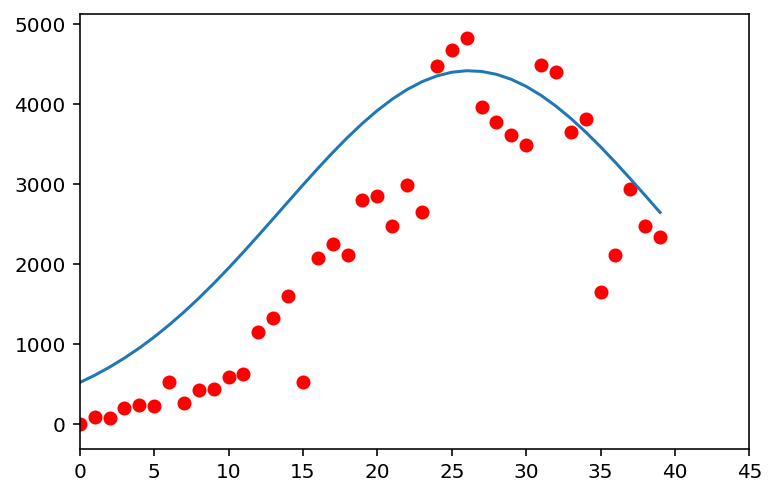

array([1.26562151e+01, 2.61840791e+01, 1.40071072e+05])

In [279]:
from scipy.optimize import curve_fit
import warnings
#####done with lombardy and its daily increment
Lom=get_region('Lombardia',regions)
def normal(x,sig,mi,h):
    a=(sig*np.sqrt(2*np.pi))**-1
    b=np.exp(-0.5*((x-mi)/sig)**2)
    return h*a*b
X=np.arange(len(country['day']),dtype=float)
yr=np.array([country['variation_total_positive'].to_numpy()[i] for i in range(len(country['variation_total_positive']))],dtype=float)
y=smooth(yr)   #try smooth and not smooth
init_vals=[np.var(y),40,7000]   #as the last changes there is not much effect
y_err=np.ones(len(y))*100   #setting the error of the maximum value of y smaller than all the others
m=np.argmax(yr)             #may try setting the error of more vaues as the maximum so that the higher
                            #the value the better the fit exploiting argsort and setting the same for more indices
y_err[m]=0.0001
best_vals,covar=curve_fit(normal,xdata=X.flatten(),ydata=y.flatten(),p0=init_vals,sigma=1/y.flatten()**5)
                            #sigma stores the errors, as an array, each point is related to its possible error
plt.clf()
plt.plot(normal(X,best_vals[0],best_vals[1],best_vals[2]))
plt.xlim([0,45])
plt.scatter(X,yr, color="red")
#plt.yscale('log')   #viene una merda
plt.show()
best_vals

In [282]:
np.argsort(y)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7,  9, 10, 11, 12, 14, 13, 15, 16,
       17, 36, 18, 39, 37, 35, 38, 19, 22, 20, 21, 34, 23, 29, 28, 30, 24,
       33, 31, 32, 27, 26, 25])

In [217]:
#Dobbiamo decidere se renderla interattiva. Se si, questa è la base di partenza
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
@interact
def show_cities_with_more_than(column=['total_cases', 'ICU'], x=(10, 1000)):
    return regions.loc[regions[column] > x]

interactive(children=(Dropdown(description='column', options=('total_cases', 'ICU'), value='total_cases'), Int…

In [223]:
#Questo in teoria permetterebbe di fare grafici interattivi ma nel mio pc non riesce a runnare
import cufflinks as cf
import chart_studio.plotly 
chart_studio.tools.set_credentials_file(username='simonegiancola09', api_key='IByMdM8xp6HDdYUdfCKo')
#from plotly.offline import iplot
df=regions
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    
    fig=df.iplot(asFigure=True, kind='scatter', x=x, y=y, mode='markers', xTitle=x.title(), yTitle=y.title())
    fig.show()

interactive(children=(Dropdown(description='x', options=('lat', 'long', 'hospitalized_symptoms', 'ICU', 'total…

up next:


    1. problemi vari da risolvere
    2. a link I found for data fitting: https://lmfit.github.io/lmfit-py/model.html BLEAH
    3.generalizzazione/interattivizzazione
    4. interactive widgets https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
    5. check magic commands
    7. USE BINDER FOR SHARING
    8. check here https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
    10. Verificare consistency e decenza di tutti i plots
    11. Gli indici/i paragoni che riteniamo interessanti li abbiamo messi?
    12. Fare descrizioni testuali-spiegare che si tratta di un esercizio senza valenza statistica/epidemiologica
    13. Pubblicare. Poi, PDA sul nuovo database
    14. previsione lower bound della fine di tutti i malati (aka 0 casi assoluti)
    
    